In [38]:
import json 
from collections import Counter
from tqdm import tqdm 
from colorama import Style,Fore
import os
from dotenv import load_dotenv
import time
load_dotenv()

True

In [5]:
from utils1 import openJson,saveJson

## Filtering 1

- videosF1.json contain the videos with fr-FR on the language parameter

In [5]:
videosR3 = openJson("../jsons/videosR3.json")
len(videosR3)

6859

In [7]:
videosF1 = []
for video in videosR3:
    if video['langue']== 'fr-FR':
        videosF1.append(video)
saveJson("../jsons/videosF1.json",videosF1)
len(videosF1)


 json saved


4722

## Filtering 2

### Detecter les videos des Chaines TV 

In [116]:
chainesTv = [
    "France 2", "France 3", "France 4","France 5","Franceinfo",
    "BFMTV", "C8", "CStar", "Gulli", "Cnews",
    "Canal+", "Planète+", "LCI", "Paris première",
    "6ter", "Arte", "M6", "W9",
    "TFX", "TMC", "NRJ12", "TF1","La Chaîne parlementaire",
    "Chérie 25", "RMC"
]
chainesTv = [nomTV.lower().replace(" ", "") for nomTV in chainesTv]

print(len(chainesTv))
print(chainesTv)

25
['france2', 'france3', 'france4', 'france5', 'franceinfo', 'bfmtv', 'c8', 'cstar', 'gulli', 'cnews', 'canal+', 'planète+', 'lci', 'parispremière', '6ter', 'arte', 'm6', 'w9', 'tfx', 'tmc', 'nrj12', 'tf1', 'lachaîneparlementaire', 'chérie25', 'rmc']


In [117]:
videosF1 = openJson("../jsons/videosF1.json")
len(videosF1)

4722

In [118]:
channels = openJson("../../collecting/jsons/channels.json")
def getChannelName(channelId):
    for channel in channels:
        if channel['id_chaine']==channelId:
            return channel['nom_chaine'].lower().replace(" ", "")

In [126]:
chainesTVCounter = Counter()
videosChainesTV = []
for video in videosF1:
    channelName = getChannelName(video['id_chaine'])
    for name in chainesTv:
        if name in channelName:  
            print(name,' ',channelName,' ',video['id_video'])
            chainesTVCounter[name]+=1
            videosChainesTV.append(video['id_video'])

france3   france3grandest   dLUQ0xpq8g4
france3   france3normandie   y16Qgap0wW8
france3   france3nouvelle-aquitaine   TFeG6-UKO9U
tf1   tf1info   ojIs2lHKYdA
france3   france3normandie   HXbStCizF74
france3   france3bourgogne-franche-comté   A1jj7uXSxs4
france3   france3occitanie   IRFs_Ixy9ZM
france3   france3hauts-de-france   hoFV4QDkWa8
france3   france3toutesrégions   iC-3Wo43Bro
france3   france3nouvelle-aquitaine   tGj_1evPWN0
arte   arte   r9wRwvEHFsA
france3   france3occitanie   yjjRv-nEdHE
france3   france3grandest   HflJXjrYBCE
france3   france3corseviastella   b7nV4URjwDk
arte   arte   q_nt-DDvq4o
france3   france3occitanie   oxjQ2xSDRU8
france2   france24   jsFCmSWQmUs
france2   france24   fRyK_Fky8q4
tf1   tf1info   g11uU0ezC7s
france3   france3provence-alpes-côted'azur   ul0lmV0rQvM
arte   météoàlacarte-francetélévisions   96N7p51oO4c
france2   france24   rX8xnkiAAOA
france3   france3nouvelle-aquitaine   MnZwX830SMQ
france3   france3bourgogne-franche-comté   yMD5K1sibMo


In [121]:
chainesTVCounter

Counter({'france3': 146,
         'arte': 37,
         'france2': 10,
         'bfmtv': 8,
         'tf1': 7,
         'cnews': 5,
         'lci': 3,
         'rmc': 1,
         'canal+': 1})

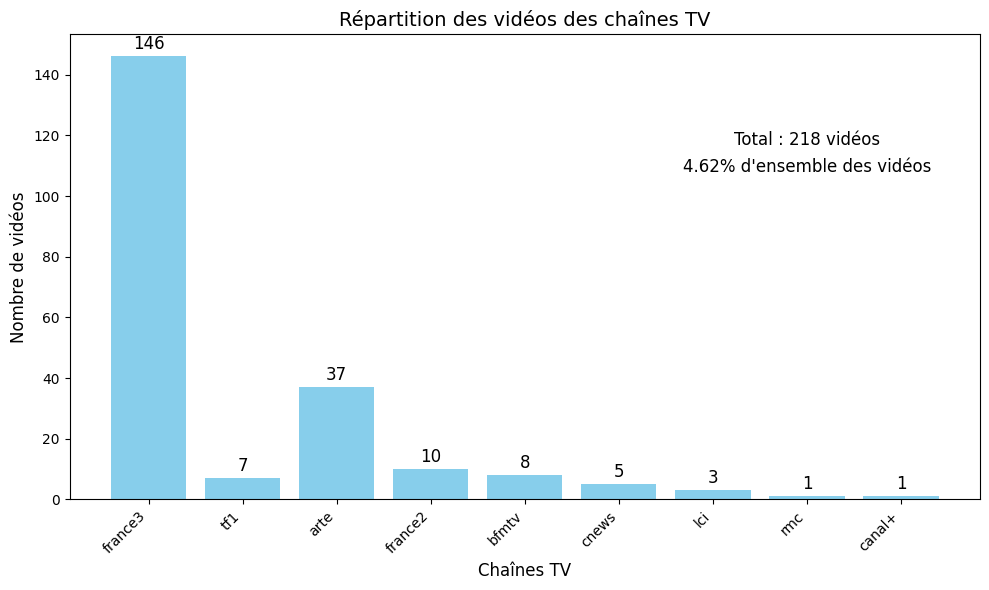

In [124]:
import matplotlib.pyplot as plt

labels = list(chainesTVCounter.keys())
sizes = list(chainesTVCounter.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='skyblue')

plt.title("Répartition des vidéos des chaînes TV", fontsize=14)
plt.xlabel("Chaînes TV", fontsize=12)
plt.ylabel("Nombre de vidéos", fontsize=12)
plt.xticks(rotation=45, ha='right')

total_videos_tv = sum(sizes)
plt.text(len(labels) - 2, max(sizes) * 0.8, f"Total : {total_videos_tv} vidéos", fontsize=12, ha='center')
plt.text(len(labels) - 2, max(sizes) * 0.74, "4.62% d'ensemble des vidéos", fontsize=12, ha='center')

# Ajouter les nombres au-dessus des barres et les rendre en gras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [123]:
(218/len(videosF1))*100

4.616687844133842

### Creer videosF2.json

In [135]:
videosChainesTV

['dLUQ0xpq8g4',
 'y16Qgap0wW8',
 'TFeG6-UKO9U',
 'ojIs2lHKYdA',
 'HXbStCizF74',
 'A1jj7uXSxs4',
 'IRFs_Ixy9ZM',
 'hoFV4QDkWa8',
 'iC-3Wo43Bro',
 'tGj_1evPWN0',
 'r9wRwvEHFsA',
 'yjjRv-nEdHE',
 'HflJXjrYBCE',
 'b7nV4URjwDk',
 'q_nt-DDvq4o',
 'oxjQ2xSDRU8',
 'jsFCmSWQmUs',
 'fRyK_Fky8q4',
 'g11uU0ezC7s',
 'ul0lmV0rQvM',
 '96N7p51oO4c',
 'rX8xnkiAAOA',
 'MnZwX830SMQ',
 'yMD5K1sibMo',
 '6w3hqPHPogA',
 'zZ0btQ-aZv8',
 'NYCCwOdqPDA',
 'WevIdMyvFUk',
 'epHgTx5XZTU',
 'lokfk0lj9Rk',
 'U5CQvKiLoCo',
 'uVmlqnrKKoA',
 'NRZa1ciorPg',
 'LsCnUBSPg6M',
 'jtfRpgVpuKU',
 'iiZFEGe0BmI',
 'Jjg9Pz_mZ1w',
 'boNqBNbVT7I',
 'q2Th8GIx2zI',
 'mePq4SsM1dw',
 'j0vCFOUMhSk',
 'IDSnX_flvs8',
 'n6oZoAGd-Hg',
 'JuN34OyMKEo',
 'bVQRUPP_FR8',
 'OzgkisPNHz8',
 'B43uPl2LP2U',
 'HfNYyNNlBfc',
 'DIDiDXLBdXM',
 '-TttfNfM55o',
 'jBCVqs3ubkY',
 'OhQccUoW9j4',
 'KGbeiCal8hI',
 'kggG5ewMsko',
 'y3VnajeE0DY',
 'Fd89ir0heWQ',
 'nG7ZrFRv_H4',
 'XCIHepMpkVk',
 'fqimFtLhDQk',
 'Bw1N_z3sLXk',
 'JyTBmA2eaEU',
 '_Qh2R-G5IFI',
 'Y7EjXc

In [128]:
len(videosChainesTV)

218

In [133]:
videosF2 = []
for video in videosF1:
    if video['id_video'] not in videosChainesTV:
        videosF2.append(video)
saveJson("../jsons/videosF2.json",videosF2)


 json saved


verification

In [134]:
len(videosF1)-len(videosF2)

218

In [136]:
len(videosF1)

4722

## Filtering 3

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("dangvantuan/sentence-camembert-base")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.27k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from sentence_transformers import util

def calculateSimilarity(videoMD, youtubequeries):
    embedding_video = model.encode([videoMD], convert_to_tensor=True, normalize_embeddings=True)
    embeddings_queries = model.encode(youtubequeries, convert_to_tensor=True, normalize_embeddings=True)
    scores = util.cos_sim(embedding_video, embeddings_queries)[0]
    simScore = scores.mean().item()
    return simScore


In [12]:
requete = "Mes livres préférés pour l'AUTONOMIE/AUTOSUFFISANCE : potager, élevage, cuisine, transfo ect)"

documents =  [
    "autosuffisance potager",
    "autosuffisance poêle à bois bouilleur",
    "autosuffisance maison torchis",
    "autosuffisance aquaponie",
    "autosuffisance filtration naturelle",
    "autosuffisance fumage",
    "autosuffisance legumes",
    "autosuffisance agriculture biologique",
    "autosuffisance arbres fruitiers",
    "autosuffisance mangeoire automatique",
    "autosuffisance sol vivant",
    "autosuffisance compost",
    "autosuffisance décomposeurs",
    "autosuffisance fertilisant",
    "autosuffisance rotation des cultures",
    "autosuffisance salades",
    "autosuffisance plantation",
    "autosuffisance légumineuses",
    "autosuffisance microferme",
    "autosuffisance cultures sous les arbres",
    "autosuffisance pollinisation",
    "autosuffisance plantes",
    "autosuffisance tuteurage",
    "autosuffisance germination",
    "autosuffisance maison en ossature bois",
    "autosuffisance fruitier",
    "autosuffisance fromage",
    "autosuffisance foin",
    "autosuffisance sol",
    "autosuffisance haricots",
    "autosuffisance eau",
    "autosuffisance pomme de terre",
    "autosuffisance itinéraire technique",
    "autosuffisance sécheresse",
    "autosuffisance cendre",
    "autosuffisance changement climatique",
    "autosuffisance bio",
    "autosuffisance lombricompost",
    "autosuffisance courgettes",
    "autosuffisance azote",
    "autosuffisance marc de café",
    "autosuffisance cultures précoces",
    "autosuffisance fertilisation organique",
    "autosuffisance exploitation agricole",
    "autosuffisance poullailler",
    "autosuffisance cultivate",
    "autosuffisance amendement",
    "autosuffisance fientes de poulet",
    "autosuffisance fumier",
    "autosuffisance terres",
    "autosuffisance eau dynamisée",
    "autosuffisance résilience",
    "autosuffisance lombricomposteur",
    "autosuffisance plantes médicinales",
    "autosuffisance chaux",
    "autosuffisance choux Daubenton",
    "autosuffisance vivace",
    "autosuffisance tracteur",
    "autosuffisance panneau solaire",
    "autosuffisance installation solaire",
    "autosuffisance glycol",
    "autonomie potager",
    "autonomie poêle à bois bouilleur",
    "autonomie maison torchis",
    "autonomie aquaponie",
    "autonomie filtration naturelle",
    "autonomie fumage",
    "autonomie legumes",
    "autonomie agriculture biologique",
    "autonomie arbres fruitiers",
    "autonomie mangeoire automatique",
    "autonomie sol vivant",
    "autonomie compost",
    "autonomie décomposeurs",
    "autonomie fertilisant",
    "autonomie rotation des cultures",
    "autonomie salades",
    "autonomie plantation",
    "autonomie légumineuses",
    "autonomie microferme",
    "autonomie cultures sous les arbres",
    "autonomie pollinisation",
    "autonomie plantes",
    "autonomie tuteurage",
    "autonomie germination",
    "autonomie maison en ossature bois",
    "autonomie fruitier",
    "autonomie fromage",
    "autonomie foin",
    "autonomie sol",
    "autonomie haricots",
    "autonomie eau",
    "autonomie pomme de terre",
    "autonomie itinéraire technique",
    "autonomie sécheresse",
    "autonomie cendre",
    "autonomie changement climatique",
    "autonomie bio",
    "autonomie lombricompost",
    "autonomie courgettes",
    "autonomie azote",
    "autonomie marc de café",
    "autonomie cultures précoces",
    "autonomie fertilisation organique",
    "autonomie exploitation agricole",
    "autonomie poullailler",
    "autonomie cultivate",
    "autonomie amendement",
    "autonomie fientes de poulet",
    "autonomie fumier",
    "autonomie terres",
    "autonomie eau dynamisée",
    "autonomie résilience",
    "autonomie lombricomposteur",
    "autonomie plantes médicinales",
    "autonomie chaux",
    "autonomie choux Daubenton",
    "autonomie vivace",
    "autonomie tracteur",
    "autonomie panneau solaire",
    "autonomie installation solaire",
    "autonomie glycol",
    "vie en autarcie potager",
    "vie en autarcie poêle à bois bouilleur",
    "vie en autarcie maison torchis",
    "vie en autarcie aquaponie",
    "vie en autarcie filtration naturelle",
    "vie en autarcie fumage",
    "vie en autarcie legumes",
    "vie en autarcie agriculture biologique",
    "vie en autarcie arbres fruitiers",
    "vie en autarcie mangeoire automatique",
    "vie en autarcie sol vivant",
    "vie en autarcie compost",
    "vie en autarcie décomposeurs",
    "vie en autarcie fertilisant",
    "vie en autarcie rotation des cultures",
    "vie en autarcie salades",
    "vie en autarcie plantation",
    "vie en autarcie légumineuses",
    "vie en autarcie microferme",
    "vie en autarcie cultures sous les arbres",
    "vie en autarcie pollinisation",
    "vie en autarcie plantes",
    "vie en autarcie tuteurage",
    "vie en autarcie germination",
    "vie en autarcie maison en ossature bois",
    "vie en autarcie fruitier",
    "vie en autarcie fromage",
    "vie en autarcie foin",
    "vie en autarcie sol",
    "vie en autarcie haricots",
    "vie en autarcie eau",
    "vie en autarcie pomme de terre",
    "vie en autarcie itinéraire technique",
    "vie en autarcie sécheresse",
    "vie en autarcie cendre",
    "vie en autarcie changement climatique",
    "vie en autarcie bio",
    "vie en autarcie lombricompost",
    "vie en autarcie courgettes",
    "vie en autarcie azote",
    "vie en autarcie marc de café",
    "vie en autarcie cultures précoces",
    "vie en autarcie fertilisation organique",
    "vie en autarcie exploitation agricole",
    "vie en autarcie poullailler",
    "vie en autarcie cultivate",
    "vie en autarcie amendement",
    "vie en autarcie fientes de poulet",
    "vie en autarcie fumier",
    "vie en autarcie terres",
    "vie en autarcie eau dynamisée",
    "vie en autarcie résilience",
    "vie en autarcie lombricomposteur",
    "vie en autarcie plantes médicinales",
    "vie en autarcie chaux",
    "vie en autarcie choux Daubenton",
    "vie en autarcie vivace",
    "vie en autarcie tracteur",
    "vie en autarcie panneau solaire",
    "vie en autarcie installation solaire",
    "vie en autarcie glycol",
    "habitats autonomes potager",
    "habitats autonomes poêle à bois bouilleur",
    "habitats autonomes maison torchis",
    "habitats autonomes aquaponie",
    "habitats autonomes filtration naturelle",
    "habitats autonomes fumage",
    "habitats autonomes legumes",
    "habitats autonomes agriculture biologique",
    "habitats autonomes arbres fruitiers",
    "habitats autonomes mangeoire automatique",
    "habitats autonomes sol vivant",
    "habitats autonomes compost",
    "habitats autonomes décomposeurs",
    "habitats autonomes fertilisant",
    "habitats autonomes rotation des cultures",
    "habitats autonomes salades",
    "habitats autonomes plantation",
    "habitats autonomes légumineuses",
    "habitats autonomes microferme",
    "habitats autonomes cultures sous les arbres",
    "habitats autonomes pollinisation",
    "habitats autonomes plantes",
    "habitats autonomes tuteurage",
    "habitats autonomes germination",
    "habitats autonomes maison en ossature bois",
    "habitats autonomes fruitier",
    "habitats autonomes fromage",
    "habitats autonomes foin",
    "habitats autonomes sol",
    "habitats autonomes haricots",
    "habitats autonomes eau",
    "habitats autonomes pomme de terre",
    "habitats autonomes itinéraire technique",
    "habitats autonomes sécheresse",
    "habitats autonomes cendre",
    "habitats autonomes changement climatique",
    "habitats autonomes bio",
    "habitats autonomes lombricompost",
    "habitats autonomes courgettes",
    "habitats autonomes azote",
    "habitats autonomes marc de café",
    "habitats autonomes cultures précoces",
    "habitats autonomes fertilisation organique",
    "habitats autonomes exploitation agricole",
    "habitats autonomes poullailler",
    "habitats autonomes cultivate",
    "habitats autonomes amendement",
    "habitats autonomes fientes de poulet",
    "habitats autonomes fumier",
    "habitats autonomes terres",
    "habitats autonomes eau dynamisée",
    "habitats autonomes résilience",
    "habitats autonomes lombricomposteur",
    "habitats autonomes plantes médicinales",
    "habitats autonomes chaux",
    "habitats autonomes choux Daubenton",
    "habitats autonomes vivace",
    "habitats autonomes tracteur",
    "habitats autonomes panneau solaire",
    "habitats autonomes installation solaire",
    "habitats autonomes glycol",
    "ferme autonome potager",
    "ferme autonome poêle à bois bouilleur",
    "ferme autonome maison torchis",
    "ferme autonome aquaponie",
    "ferme autonome filtration naturelle",
    "ferme autonome fumage",
    "ferme autonome legumes",
    "ferme autonome agriculture biologique",
    "ferme autonome arbres fruitiers",
    "ferme autonome mangeoire automatique",
    "ferme autonome sol vivant",
    "ferme autonome compost",
    "ferme autonome décomposeurs",
    "ferme autonome fertilisant",
    "ferme autonome rotation des cultures",
    "ferme autonome salades",
    "ferme autonome plantation",
    "ferme autonome légumineuses",
    "ferme autonome microferme",
    "ferme autonome cultures sous les arbres",
    "ferme autonome pollinisation",
    "ferme autonome plantes",
    "ferme autonome tuteurage",
    "ferme autonome germination",
    "ferme autonome maison en ossature bois",
    "ferme autonome fruitier",
    "ferme autonome fromage",
    "ferme autonome foin",
    "ferme autonome sol",
    "ferme autonome haricots",
    "ferme autonome eau",
    "ferme autonome pomme de terre",
    "ferme autonome itinéraire technique",
    "ferme autonome sécheresse",
    "ferme autonome cendre",
    "ferme autonome changement climatique",
    "ferme autonome bio",
    "ferme autonome lombricompost",
    "ferme autonome courgettes",
    "ferme autonome azote",
    "ferme autonome marc de café",
    "ferme autonome cultures précoces",
    "ferme autonome fertilisation organique",
    "ferme autonome exploitation agricole",
    "ferme autonome poullailler",
    "ferme autonome cultivate",
    "ferme autonome amendement",
    "ferme autonome fientes de poulet",
    "ferme autonome fumier",
    "ferme autonome terres",
    "ferme autonome eau dynamisée",
    "ferme autonome résilience",
    "ferme autonome lombricomposteur",
    "ferme autonome plantes médicinales",
    "ferme autonome chaux",
    "ferme autonome choux Daubenton",
    "ferme autonome vivace",
    "ferme autonome tracteur",
    "ferme autonome panneau solaire",
    "ferme autonome installation solaire",
    "ferme autonome glycol",
    "éco-lieu potager",
    "éco-lieu poêle à bois bouilleur",
    "éco-lieu maison torchis",
    "éco-lieu aquaponie",
    "éco-lieu filtration naturelle",
    "éco-lieu fumage",
    "éco-lieu legumes",
    "éco-lieu agriculture biologique",
    "éco-lieu arbres fruitiers",
    "éco-lieu mangeoire automatique",
    "éco-lieu sol vivant",
    "éco-lieu compost",
    "éco-lieu décomposeurs",
    "éco-lieu fertilisant",
    "éco-lieu rotation des cultures",
    "éco-lieu salades",
    "éco-lieu plantation",
    "éco-lieu légumineuses",
    "éco-lieu microferme",
    "éco-lieu cultures sous les arbres",
    "éco-lieu pollinisation",
    "éco-lieu plantes",
    "éco-lieu tuteurage",
    "éco-lieu germination",
    "éco-lieu maison en ossature bois",
    "éco-lieu fruitier",
    "éco-lieu fromage",
    "éco-lieu foin",
    "éco-lieu sol",
    "éco-lieu haricots",
    "éco-lieu eau",
    "éco-lieu pomme de terre",
    "éco-lieu itinéraire technique",
    "éco-lieu sécheresse",
    "éco-lieu cendre",
    "éco-lieu changement climatique",
    "éco-lieu bio",
    "éco-lieu lombricompost",
    "éco-lieu courgettes",
    "éco-lieu azote",
    "éco-lieu marc de café",
    "éco-lieu cultures précoces",
    "éco-lieu fertilisation organique",
    "éco-lieu exploitation agricole",
    "éco-lieu poullailler",
    "éco-lieu cultivate",
    "éco-lieu amendement",
    "éco-lieu fientes de poulet",
    "éco-lieu fumier",
    "éco-lieu terres",
    "éco-lieu eau dynamisée",
    "éco-lieu résilience",
    "éco-lieu lombricomposteur",
    "éco-lieu plantes médicinales",
    "éco-lieu chaux",
    "éco-lieu choux Daubenton",
    "éco-lieu vivace",
    "éco-lieu tracteur",
    "éco-lieu panneau solaire",
    "éco-lieu installation solaire",
    "éco-lieu glycol"
  ]

calculateSimilarity(requete,documents)

0.14659950137138367

In [16]:
contexte_autosuffisance = [
    "Potager familial productif pour l'autonomie en légumes",
    "Élevage de poules, moutons et canards pour l’autonomie alimentaire",
    "Utilisation de plantes médicinales et aromatiques cultivées sur place",
    "Récupération et filtration de l'eau via un puits et osmose inverse",
    "Construction de bacs permacoles faits maison pour une culture efficace",
    "Transformation du sol en terre fertile pour maximiser les rendements",
    "Vie en sobriété heureuse et respect de la nature",
    "Utilisation de semences locales et choix variétal réfléchi",
    "Production locale de viande, œufs et légumes",
    "Utilisation d'une serre pour prolonger les cultures",
    "Métiers artisanaux (ébénisterie, photographie culinaire) intégrés dans le mode de vie",
    "Conception d’un lieu de vie en autonomie énergétique et alimentaire"
]


In [18]:
videosF2 = openJson("../jsons/videosF2.json")
scores = {}
for video in tqdm(videosF2):
    context = video['titre_video'] + video['description'] + ' '.join(video['tags'])
    score = calculateSimilarity(context,documents)
    print(score,'  ',video['id_video'])
    scores[video['id_video']]=score


  0%|          | 1/4504 [00:07<9:46:22,  7.81s/it]

0.12522189319133759    NRzflSM89iI


  0%|          | 2/4504 [00:17<11:29:00,  9.18s/it]

0.17426565289497375    6CI-4_XszYg


  0%|          | 3/4504 [00:25<10:39:29,  8.52s/it]

0.1539665013551712    E1Zo4dBPbGM


  0%|          | 4/4504 [00:36<11:47:30,  9.43s/it]

0.09188460558652878    z35x21dbhsw


  0%|          | 5/4504 [00:44<11:15:21,  9.01s/it]

0.14590317010879517    iF3O2TSheXI


  0%|          | 6/4504 [00:54<11:38:20,  9.32s/it]

0.09888356178998947    9nl8mw96R90


  0%|          | 7/4504 [01:02<11:08:49,  8.92s/it]

0.11587613075971603    viSl4Gv9mqU


  0%|          | 8/4504 [01:12<11:25:10,  9.14s/it]

0.05904807522892952    A31isr90nNI


  0%|          | 9/4504 [01:20<10:54:34,  8.74s/it]

0.07330767810344696    9-pbc-zRdss


  0%|          | 10/4504 [01:30<11:30:55,  9.22s/it]

0.13107413053512573    _l191QtAqlc


  0%|          | 11/4504 [01:41<12:10:50,  9.76s/it]

0.10049177706241608    -5ahOCpQi-k


  0%|          | 12/4504 [01:49<11:28:16,  9.19s/it]

0.11352601647377014    7dO0lOOPZVw


  0%|          | 13/4504 [01:59<11:38:13,  9.33s/it]

0.08490554988384247    pCf8PjSn6xs


  0%|          | 14/4504 [02:08<11:31:30,  9.24s/it]

0.08423230051994324    YER-2qYt2B0


  0%|          | 15/4504 [02:17<11:29:20,  9.21s/it]

0.010712231509387493    lSoWicUMVlM


  0%|          | 16/4504 [02:25<11:09:13,  8.95s/it]

0.1582910567522049    G4_vmWaSU3Q


  0%|          | 17/4504 [02:33<10:42:04,  8.59s/it]

0.11804836243391037    CbPHyfHqIHw


  0%|          | 18/4504 [02:43<11:10:32,  8.97s/it]

0.19018098711967468    yu5wQ_e1UMo


  0%|          | 19/4504 [02:51<10:43:58,  8.62s/it]

0.1649240255355835    1UvvwnWkFho


  0%|          | 20/4504 [03:00<11:03:30,  8.88s/it]

0.027286991477012634    tbrycDTUECg


  0%|          | 21/4504 [03:08<10:46:17,  8.65s/it]

-0.02901868149638176    e2gMKuiDxQY


  0%|          | 22/4504 [03:19<11:33:42,  9.29s/it]

0.0738668218255043    VmaB1cxsLxA


  1%|          | 23/4504 [03:29<11:59:53,  9.64s/it]

0.07115449756383896    -PYlxVfbEGA


  1%|          | 24/4504 [03:38<11:29:50,  9.24s/it]

0.12048967182636261    IG35vKlx0U0


  1%|          | 25/4504 [03:47<11:42:44,  9.41s/it]

0.1175050139427185    EyExd5h_j3M


  1%|          | 26/4504 [03:56<11:29:39,  9.24s/it]

0.1027696505188942    pzMvlEuc7xc


  1%|          | 27/4504 [04:06<11:32:21,  9.28s/it]

0.12154670804738998    -6ecq5hc5ig


  1%|          | 28/4504 [04:14<11:12:54,  9.02s/it]

0.14580528438091278    gjcxL3mVVe0


  1%|          | 29/4504 [04:24<11:26:46,  9.21s/it]

0.05499275028705597    VC0jyL7qnDU


  1%|          | 30/4504 [04:32<11:12:02,  9.01s/it]

0.12130878865718842    1Tur0zcDnvU


  1%|          | 31/4504 [04:42<11:24:04,  9.18s/it]

0.08566529303789139    XYZwomaR3ns


  1%|          | 32/4504 [04:50<11:06:12,  8.94s/it]

0.15773630142211914    0nZyupbiRVQ


  1%|          | 33/4504 [05:01<11:44:38,  9.46s/it]

0.13179506361484528    LJP8bYpCBPI


  1%|          | 34/4504 [05:11<11:59:18,  9.66s/it]

0.164107546210289    7ZnBr3v59Iw


  1%|          | 35/4504 [05:19<11:28:07,  9.24s/it]

0.08383823186159134    HkpV4V4dYOw


  1%|          | 36/4504 [05:28<11:14:36,  9.06s/it]

0.13691072165966034    ayUMX5QFZBs


  1%|          | 37/4504 [05:38<11:28:51,  9.25s/it]

0.09955555200576782    Wcgs5XjxzFs


  1%|          | 38/4504 [05:46<11:13:15,  9.05s/it]

0.1382737010717392    vJSzXIPoOkw


  1%|          | 39/4504 [05:55<11:07:16,  8.97s/it]

0.16849583387374878    aZusRHXECMY


  1%|          | 40/4504 [06:03<10:44:35,  8.66s/it]

0.14704309403896332    LifnAsRRY4E


  1%|          | 41/4504 [06:13<11:13:52,  9.06s/it]

0.08221543580293655    EMKZk61uA0w


  1%|          | 42/4504 [06:21<10:41:01,  8.62s/it]

0.08285196870565414    U7RY1lzS6us


  1%|          | 43/4504 [06:30<11:07:28,  8.98s/it]

0.013404173776507378    _3X3muyDFKY


  1%|          | 44/4504 [06:38<10:46:09,  8.69s/it]

0.08837468177080154    W79c-I7vqFI


  1%|          | 45/4504 [06:50<11:54:03,  9.61s/it]

-0.0041385311633348465    8ChX6276Rhk


  1%|          | 46/4504 [06:59<11:41:14,  9.44s/it]

0.11584722995758057    M92CPBXG0U0


  1%|          | 47/4504 [07:09<11:53:59,  9.61s/it]

0.1844758838415146    FZBgBkMdgTg


  1%|          | 48/4504 [07:20<12:20:39,  9.97s/it]

0.03602290526032448    BCENbxCl7XU


  1%|          | 49/4504 [07:28<11:41:28,  9.45s/it]

0.16035063564777374    ihOZZgTg9hg


  1%|          | 50/4504 [07:39<12:07:32,  9.80s/it]

0.038315750658512115    NgdYYbRCtrc


  1%|          | 51/4504 [07:47<11:41:27,  9.45s/it]

0.026463018730282784    3KxD8q2oWVc


  1%|          | 52/4504 [07:56<11:30:46,  9.31s/it]

0.10203157365322113    5nsdQucYdak


  1%|          | 52/4504 [07:59<11:23:51,  9.22s/it]


KeyboardInterrupt: 

In [17]:
videosF2 = openJson("../jsons/videosF2.json")
scores = {}
for video in tqdm(videosF2):
    context = video['titre_video'] + video['description'] + ' '.join(video['tags'])
    score = calculateSimilarity(context,contexte_autosuffisance)
    print(score,'  ',video['id_video'])
    scores[video['id_video']]=score


  0%|          | 0/4504 [00:00<?, ?it/s]

  0%|          | 1/4504 [00:02<3:40:20,  2.94s/it]

0.24666140973567963    NRzflSM89iI


  0%|          | 2/4504 [00:04<2:34:56,  2.06s/it]

0.2544892728328705    6CI-4_XszYg


  0%|          | 3/4504 [00:05<2:09:21,  1.72s/it]

0.3018917739391327    E1Zo4dBPbGM


  0%|          | 4/4504 [00:06<1:41:36,  1.35s/it]

0.25268277525901794    z35x21dbhsw


  0%|          | 5/4504 [00:07<1:23:57,  1.12s/it]

0.2886052131652832    iF3O2TSheXI


  0%|          | 6/4504 [00:07<1:13:00,  1.03it/s]

0.3012021481990814    9nl8mw96R90


  0%|          | 7/4504 [00:08<1:10:08,  1.07it/s]

0.27946367859840393    viSl4Gv9mqU


  0%|          | 8/4504 [00:09<1:08:49,  1.09it/s]

0.16324396431446075    A31isr90nNI


  0%|          | 9/4504 [00:10<1:10:35,  1.06it/s]

0.18646736443042755    9-pbc-zRdss


  0%|          | 10/4504 [00:11<1:15:23,  1.01s/it]

0.18015508353710175    _l191QtAqlc


  0%|          | 11/4504 [00:12<1:14:20,  1.01it/s]

0.21390224993228912    -5ahOCpQi-k


  0%|          | 12/4504 [00:13<1:07:48,  1.10it/s]

0.19297100603580475    7dO0lOOPZVw


  0%|          | 13/4504 [00:14<1:09:11,  1.08it/s]

0.15504805743694305    pCf8PjSn6xs


  0%|          | 14/4504 [00:15<1:06:17,  1.13it/s]

0.16446198523044586    YER-2qYt2B0


  0%|          | 15/4504 [00:15<1:03:22,  1.18it/s]

0.10104575753211975    lSoWicUMVlM


  0%|          | 16/4504 [00:16<1:01:09,  1.22it/s]

0.2351469248533249    G4_vmWaSU3Q


  0%|          | 17/4504 [00:17<1:03:34,  1.18it/s]

0.22625233232975006    CbPHyfHqIHw


  0%|          | 18/4504 [00:19<1:32:30,  1.24s/it]

0.25443193316459656    yu5wQ_e1UMo


  0%|          | 19/4504 [00:20<1:27:31,  1.17s/it]

0.21378415822982788    1UvvwnWkFho


  0%|          | 20/4504 [00:21<1:19:53,  1.07s/it]

0.13367758691310883    tbrycDTUECg


  0%|          | 21/4504 [00:22<1:09:47,  1.07it/s]

0.08641704171895981    e2gMKuiDxQY


  0%|          | 22/4504 [00:23<1:07:53,  1.10it/s]

0.23149611055850983    VmaB1cxsLxA


  1%|          | 23/4504 [00:24<1:07:45,  1.10it/s]

0.26428404450416565    -PYlxVfbEGA


  1%|          | 24/4504 [00:24<1:04:34,  1.16it/s]

0.10859186202287674    IG35vKlx0U0


  1%|          | 25/4504 [00:25<1:09:18,  1.08it/s]

0.23291051387786865    EyExd5h_j3M


  1%|          | 26/4504 [00:26<1:14:00,  1.01it/s]

0.19022810459136963    pzMvlEuc7xc


  1%|          | 27/4504 [00:27<1:08:18,  1.09it/s]

0.2569611966609955    -6ecq5hc5ig


  1%|          | 28/4504 [00:28<1:04:24,  1.16it/s]

0.2880748510360718    gjcxL3mVVe0


  1%|          | 29/4504 [00:29<59:55,  1.24it/s]  

0.15027040243148804    VC0jyL7qnDU


  1%|          | 30/4504 [00:29<58:18,  1.28it/s]

0.2617793083190918    1Tur0zcDnvU


  1%|          | 31/4504 [00:30<59:15,  1.26it/s]

0.20479021966457367    XYZwomaR3ns


  1%|          | 32/4504 [00:31<59:39,  1.25it/s]

0.2811856269836426    0nZyupbiRVQ


  1%|          | 33/4504 [00:32<1:03:35,  1.17it/s]

0.1956884264945984    LJP8bYpCBPI


  1%|          | 34/4504 [00:33<1:04:20,  1.16it/s]

0.1934119462966919    7ZnBr3v59Iw


  1%|          | 35/4504 [00:34<1:01:05,  1.22it/s]

0.07198984175920486    HkpV4V4dYOw


  1%|          | 36/4504 [00:34<59:38,  1.25it/s]  

0.27434542775154114    ayUMX5QFZBs


  1%|          | 37/4504 [00:35<1:00:34,  1.23it/s]

0.13600905239582062    Wcgs5XjxzFs


  1%|          | 38/4504 [00:36<1:02:26,  1.19it/s]

0.18514300882816315    vJSzXIPoOkw


  1%|          | 39/4504 [00:37<1:01:02,  1.22it/s]

0.17944888770580292    aZusRHXECMY


  1%|          | 40/4504 [00:38<59:57,  1.24it/s]  

0.1815786212682724    LifnAsRRY4E


  1%|          | 41/4504 [00:39<1:16:38,  1.03s/it]

0.045952245593070984    EMKZk61uA0w


  1%|          | 42/4504 [00:41<1:25:07,  1.14s/it]

0.129450261592865    U7RY1lzS6us


  1%|          | 43/4504 [00:41<1:15:55,  1.02s/it]

0.1064584031701088    _3X3muyDFKY


  1%|          | 44/4504 [00:42<1:08:49,  1.08it/s]

0.21849264204502106    W79c-I7vqFI


  1%|          | 45/4504 [00:43<1:04:12,  1.16it/s]

0.05574826896190643    8ChX6276Rhk


  1%|          | 46/4504 [00:44<1:02:14,  1.19it/s]

0.20310012996196747    M92CPBXG0U0


  1%|          | 47/4504 [00:44<1:04:15,  1.16it/s]

0.2922811806201935    FZBgBkMdgTg


  1%|          | 48/4504 [00:45<1:01:12,  1.21it/s]

0.11429282277822495    BCENbxCl7XU


  1%|          | 49/4504 [00:46<1:02:27,  1.19it/s]

0.2583397328853607    ihOZZgTg9hg


  1%|          | 50/4504 [00:47<1:04:53,  1.14it/s]

0.18150430917739868    NgdYYbRCtrc


  1%|          | 51/4504 [00:48<1:13:49,  1.01it/s]

0.17618316411972046    3KxD8q2oWVc


  1%|          | 52/4504 [00:49<1:13:11,  1.01it/s]

0.21890123188495636    5nsdQucYdak


  1%|          | 53/4504 [00:51<1:21:13,  1.09s/it]

0.33847105503082275    XDvc6vkvKJU


  1%|          | 54/4504 [00:51<1:15:40,  1.02s/it]

0.27322500944137573    85i3qfuDK1g


  1%|          | 55/4504 [00:52<1:10:19,  1.05it/s]

0.17660582065582275    jLlyOeOrIzA


  1%|          | 56/4504 [00:53<1:16:38,  1.03s/it]

0.16302619874477386    sOTzAnxcohI


  1%|▏         | 57/4504 [00:55<1:35:04,  1.28s/it]

0.1647396832704544    NHLziogcmNA


  1%|▏         | 58/4504 [00:56<1:30:36,  1.22s/it]

0.2439260631799698    B9oMHIbBJaQ


  1%|▏         | 59/4504 [00:58<1:38:15,  1.33s/it]

0.2668727934360504    -cmVPa6vrHM


  1%|▏         | 60/4504 [00:59<1:32:41,  1.25s/it]

0.1402226686477661    nTi-xbAEjOw


  1%|▏         | 61/4504 [01:00<1:29:55,  1.21s/it]

0.22587426006793976    -v1RyFcWmp8


  1%|▏         | 62/4504 [01:02<1:53:44,  1.54s/it]

0.180482879281044    krNa-Re4Hlw


  1%|▏         | 63/4504 [01:04<1:43:12,  1.39s/it]

0.19081997871398926    YakXcfaE9YA


  1%|▏         | 64/4504 [01:05<1:33:49,  1.27s/it]

0.18455761671066284    VbhHpgDrPD0


  1%|▏         | 65/4504 [01:05<1:25:07,  1.15s/it]

0.3738349378108978    SBmubDSyn3Q


  1%|▏         | 66/4504 [01:06<1:15:57,  1.03s/it]

0.24123822152614594    XvsQoaumzNg


  1%|▏         | 67/4504 [01:07<1:12:48,  1.02it/s]

0.22535176575183868    3qYQJQEU2Pk


  2%|▏         | 68/4504 [01:08<1:09:55,  1.06it/s]

0.28872933983802795    LimuekuregU


  2%|▏         | 69/4504 [01:08<1:01:34,  1.20it/s]

0.12214169651269913    f1Lj91M5U6E


  2%|▏         | 70/4504 [01:09<1:03:21,  1.17it/s]

0.22640885412693024    3fVTRIFiCck


  2%|▏         | 71/4504 [01:10<1:09:25,  1.06it/s]

0.2330329418182373    efy2uUZG7JQ


  2%|▏         | 72/4504 [01:11<1:06:42,  1.11it/s]

0.23125465214252472    A6ULOgGvSmk


  2%|▏         | 73/4504 [01:12<1:02:57,  1.17it/s]

0.17402029037475586    uPIyZCw-Odk


  2%|▏         | 74/4504 [01:13<1:02:51,  1.17it/s]

0.2546558380126953    T6cFPxLRkTs


  2%|▏         | 75/4504 [01:14<57:53,  1.27it/s]  

0.24425213038921356    7bb-3Y96Ixw


  2%|▏         | 76/4504 [01:14<56:42,  1.30it/s]

0.29708361625671387    ftyO41TYOI0


  2%|▏         | 77/4504 [01:15<57:40,  1.28it/s]

0.23494400084018707    _eQmH7eqT64


  2%|▏         | 78/4504 [01:17<1:12:35,  1.02it/s]

0.2984417974948883    Zyv99CUSe0M


  2%|▏         | 79/4504 [01:18<1:31:27,  1.24s/it]

0.26983991265296936    MrpGaGb-iFY


  2%|▏         | 80/4504 [01:19<1:22:16,  1.12s/it]

0.18462027609348297    IJ5YTqI3fqY


  2%|▏         | 81/4504 [01:20<1:14:23,  1.01s/it]

0.1870443969964981    N8dPyKqeQvQ


  2%|▏         | 82/4504 [01:21<1:08:36,  1.07it/s]

0.2803082764148712    eH8bnmclXGo


  2%|▏         | 83/4504 [01:21<1:05:06,  1.13it/s]

0.16208992898464203    ERTG4JexXLw


  2%|▏         | 84/4504 [01:22<1:01:10,  1.20it/s]

0.2966439425945282    i4cpZ76nnf8


  2%|▏         | 85/4504 [01:23<59:56,  1.23it/s]  

0.29749688506126404    9Wi53NrNL04


  2%|▏         | 86/4504 [01:24<1:06:14,  1.11it/s]

0.2691712975502014    KynhuzSEtqU


  2%|▏         | 87/4504 [01:25<1:14:03,  1.01s/it]

0.2261364459991455    IetnX1zHuWE


  2%|▏         | 88/4504 [01:26<1:10:59,  1.04it/s]

0.1396729201078415    wpjiT-hCfR4


  2%|▏         | 89/4504 [01:27<1:15:58,  1.03s/it]

0.16596390306949615    mGlfXPQJL9Y


  2%|▏         | 90/4504 [01:28<1:15:00,  1.02s/it]

0.19363564252853394    OmshTBwMZt0


  2%|▏         | 91/4504 [01:29<1:15:07,  1.02s/it]

0.23902475833892822    bM4ii9-EP1k


  2%|▏         | 92/4504 [01:31<1:19:17,  1.08s/it]

0.28945961594581604    RjAFHTTGH60


  2%|▏         | 93/4504 [01:32<1:26:39,  1.18s/it]

0.20440717041492462    RBkzm2lSqKE


  2%|▏         | 94/4504 [01:33<1:24:06,  1.14s/it]

0.30772945284843445    v7VSeqTj1S8


  2%|▏         | 95/4504 [01:34<1:15:06,  1.02s/it]

0.2043112963438034    LXoDDQ_GpiA


  2%|▏         | 96/4504 [01:35<1:10:59,  1.03it/s]

0.20953315496444702    AEhDDHES19g


  2%|▏         | 97/4504 [01:36<1:13:02,  1.01it/s]

0.21382880210876465    2Yau2HrKDM4


  2%|▏         | 98/4504 [01:37<1:10:04,  1.05it/s]

0.21391092240810394    kUIPnI6fBCU


  2%|▏         | 99/4504 [01:38<1:22:42,  1.13s/it]

0.24518023431301117    qftPJ3vP26Y


  2%|▏         | 100/4504 [01:39<1:28:49,  1.21s/it]

0.18404638767242432    6AuAhotFf6A


  2%|▏         | 101/4504 [01:41<1:31:18,  1.24s/it]

0.26784661412239075    TfwKOE_bv4g


  2%|▏         | 102/4504 [01:42<1:21:47,  1.11s/it]

0.2729097306728363    X_StBE-tyXw


  2%|▏         | 103/4504 [01:42<1:12:34,  1.01it/s]

0.23357319831848145    hAgGD_YiFlA


  2%|▏         | 104/4504 [01:43<1:11:09,  1.03it/s]

0.30118659138679504    HhQ7KohYp18


  2%|▏         | 105/4504 [01:44<1:09:25,  1.06it/s]

0.20445799827575684    _j582iDvMGQ


  2%|▏         | 106/4504 [01:45<1:06:23,  1.10it/s]

0.19230259954929352    wEaZTXMsbK0


  2%|▏         | 107/4504 [01:46<1:09:08,  1.06it/s]

0.28947320580482483    ex2KDWtFW_Q


  2%|▏         | 108/4504 [01:47<1:07:14,  1.09it/s]

0.2155519276857376    F2Htc-RF4R0


  2%|▏         | 109/4504 [01:47<1:01:05,  1.20it/s]

0.10407688468694687    ZFfc0R9IiZU


  2%|▏         | 110/4504 [01:48<59:37,  1.23it/s]  

0.22633801400661469    YFQCiz6-xx4


  2%|▏         | 111/4504 [01:49<57:03,  1.28it/s]

0.2281160205602646    amnDBxwuRRg


  2%|▏         | 112/4504 [01:50<55:55,  1.31it/s]

0.34013882279396057    JZNhEr9takk


  3%|▎         | 113/4504 [01:50<54:10,  1.35it/s]

0.25774744153022766    b3NDEBu6OJQ


  3%|▎         | 114/4504 [01:51<50:08,  1.46it/s]

0.19995594024658203    oMXFZgiM9F4


  3%|▎         | 115/4504 [01:52<50:19,  1.45it/s]

0.20107458531856537    ZHl25-3t_Jc


  3%|▎         | 116/4504 [01:53<1:14:49,  1.02s/it]

0.2579346299171448    yTQYw5Omdso


  3%|▎         | 117/4504 [01:54<1:15:35,  1.03s/it]

0.24059152603149414    -5UIyQPhSvM


  3%|▎         | 118/4504 [01:56<1:16:11,  1.04s/it]

0.15394280850887299    M57HHnx3iAg


  3%|▎         | 119/4504 [01:57<1:14:58,  1.03s/it]

0.2116754651069641    4voCJjxOoAE


  3%|▎         | 120/4504 [01:57<1:07:56,  1.08it/s]

0.17397671937942505    HheJdCzUBkQ


  3%|▎         | 121/4504 [01:58<1:04:10,  1.14it/s]

0.1266057789325714    Vz4yibOxdug


  3%|▎         | 122/4504 [01:59<59:58,  1.22it/s]  

0.18717467784881592    eEWiyt4JZmw


  3%|▎         | 123/4504 [02:00<1:06:51,  1.09it/s]

0.20871345698833466    w-ZzRpXvgqI


  3%|▎         | 124/4504 [02:01<1:06:26,  1.10it/s]

0.2627376616001129    7ZX0nQrq05Q


  3%|▎         | 125/4504 [02:01<1:02:11,  1.17it/s]

0.2892884910106659    oaJcEvGe3lQ


  3%|▎         | 126/4504 [02:02<1:00:45,  1.20it/s]

0.18297065794467926    OzlVBfSFR-c


  3%|▎         | 127/4504 [02:03<59:49,  1.22it/s]  

0.08573228865861893    llEgjaXDR0k


  3%|▎         | 128/4504 [02:04<55:39,  1.31it/s]

0.25230690836906433    K_DFOssQRBw


  3%|▎         | 129/4504 [02:04<54:25,  1.34it/s]

0.1807134598493576    KJeHDFicB1g


  3%|▎         | 130/4504 [02:05<52:06,  1.40it/s]

0.23048049211502075    c65AOBiV4ew


  3%|▎         | 131/4504 [02:06<1:06:10,  1.10it/s]

0.2335156947374344    ydO_4q91fJk


  3%|▎         | 132/4504 [02:07<1:04:09,  1.14it/s]

0.25761064887046814    ZtKqOFXCX1Y


  3%|▎         | 133/4504 [02:08<1:01:42,  1.18it/s]

0.28020668029785156    81OLMeIWjzE


  3%|▎         | 134/4504 [02:09<1:00:33,  1.20it/s]

0.24609124660491943    0mGmEw96pLE


  3%|▎         | 135/4504 [02:10<1:07:09,  1.08it/s]

0.2085103988647461    I8zyXW1R4dY


  3%|▎         | 136/4504 [02:11<1:08:45,  1.06it/s]

0.24602113664150238    GWsvm_VriS0


  3%|▎         | 137/4504 [02:12<1:06:56,  1.09it/s]

0.21952222287654877    1uwAf3mmluk


  3%|▎         | 138/4504 [02:13<1:06:32,  1.09it/s]

0.2270243912935257    LIJ3eH0qoQI


  3%|▎         | 139/4504 [02:14<1:18:45,  1.08s/it]

0.21898253262043    lZIVe1UVdN8


  3%|▎         | 140/4504 [02:15<1:15:43,  1.04s/it]

0.27181828022003174    gEOjS9nk5Kg


  3%|▎         | 141/4504 [02:16<1:07:06,  1.08it/s]

0.2997611463069916    6mM5v2lKtIY


  3%|▎         | 142/4504 [02:17<1:05:32,  1.11it/s]

0.23292849957942963    ulHrMzlbGp0


  3%|▎         | 143/4504 [02:17<1:06:16,  1.10it/s]

0.18528960645198822    AOGwUQ56rkc


  3%|▎         | 144/4504 [02:18<1:06:59,  1.08it/s]

0.15969853103160858    c_MFhZMdKbY


  3%|▎         | 145/4504 [02:19<1:03:11,  1.15it/s]

0.15301871299743652    LHDhp6tqQI0


  3%|▎         | 146/4504 [02:20<1:07:29,  1.08it/s]

0.21659016609191895    B21So1_VYMY


  3%|▎         | 147/4504 [02:21<1:14:58,  1.03s/it]

0.07960647344589233    3BgBITcr9So


  3%|▎         | 148/4504 [02:22<1:06:42,  1.09it/s]

0.2177104353904724    NgzTNEpm4-w


  3%|▎         | 149/4504 [02:23<1:01:26,  1.18it/s]

0.25056836009025574    RM5Mzgh07A4


  3%|▎         | 150/4504 [02:24<1:01:44,  1.18it/s]

0.09898123145103455    8E_cw_Hn3v0


  3%|▎         | 151/4504 [02:24<59:40,  1.22it/s]  

0.11233065277338028    p6-4-DMjDY0


  3%|▎         | 152/4504 [02:25<56:04,  1.29it/s]

0.12498968839645386    7W3WSj7QuzU


  3%|▎         | 153/4504 [02:26<55:14,  1.31it/s]

0.13241028785705566    ZbAq3xPHuQ4


  3%|▎         | 154/4504 [02:27<1:07:27,  1.07it/s]

0.13510267436504364    KNnyTf1l6dg


  3%|▎         | 155/4504 [02:29<1:23:29,  1.15s/it]

0.1303386688232422    j4rQ8FAKEAk


  3%|▎         | 156/4504 [02:30<1:23:41,  1.15s/it]

0.2898007035255432    J8rLzR9yByg


  3%|▎         | 157/4504 [02:31<1:24:01,  1.16s/it]

0.19214682281017303    K1MpIjlpUy0


  4%|▎         | 158/4504 [02:32<1:19:09,  1.09s/it]

0.1431605964899063    e9f2ALW1zLY


  4%|▎         | 159/4504 [02:33<1:14:18,  1.03s/it]

0.10926035046577454    iAMAGNLO37A


  4%|▎         | 160/4504 [02:34<1:09:11,  1.05it/s]

0.10409963130950928    ihi165Ha_58


  4%|▎         | 161/4504 [02:35<1:17:14,  1.07s/it]

0.2257518321275711    imLUIQnpzTU


  4%|▎         | 162/4504 [02:36<1:11:01,  1.02it/s]

0.12679462134838104    hr_vD5fy8FA


  4%|▎         | 163/4504 [02:37<1:04:59,  1.11it/s]

0.2290240079164505    mqj4FAw06wo


  4%|▎         | 164/4504 [02:37<1:04:54,  1.11it/s]

0.04282359406352043    x8NLEDvgESk


  4%|▎         | 165/4504 [02:38<1:00:16,  1.20it/s]

0.20754314959049225    qWPEATmeIUU


  4%|▎         | 166/4504 [02:39<56:03,  1.29it/s]  

0.07398954778909683    grrBPjWgPE0


  4%|▎         | 167/4504 [02:40<54:49,  1.32it/s]

0.1968601495027542    ViaVmfrmF2M


  4%|▎         | 168/4504 [02:41<1:04:30,  1.12it/s]

0.18320314586162567    9QxmGn5If48


  4%|▍         | 169/4504 [02:43<1:24:40,  1.17s/it]

0.17454521358013153    ScNDOguxyQE


  4%|▍         | 170/4504 [02:44<1:30:27,  1.25s/it]

0.09970007091760635    -inrKRnDpiU


  4%|▍         | 171/4504 [02:45<1:23:52,  1.16s/it]

0.2854466438293457    I9-khUrt2qI


  4%|▍         | 172/4504 [02:46<1:22:38,  1.14s/it]

0.23675836622714996    w06_1HNoxZM


  4%|▍         | 173/4504 [02:47<1:19:04,  1.10s/it]

0.16521841287612915    jlfz5KWdP1I


  4%|▍         | 174/4504 [02:48<1:16:57,  1.07s/it]

0.25315943360328674    s8mNAirza5U


  4%|▍         | 175/4504 [02:50<1:33:37,  1.30s/it]

0.282427042722702    94GAyrnAq8w


  4%|▍         | 176/4504 [02:51<1:33:37,  1.30s/it]

0.26103851199150085    HkYYWec5JjY


  4%|▍         | 177/4504 [02:52<1:21:06,  1.12s/it]

0.2318483591079712    93XeojuElwA


  4%|▍         | 178/4504 [02:53<1:15:53,  1.05s/it]

0.07107331603765488    3SCLflWdpeg


  4%|▍         | 179/4504 [02:53<1:08:36,  1.05it/s]

0.3128916323184967    x0vRWEFKlb8


  4%|▍         | 180/4504 [02:54<1:04:33,  1.12it/s]

0.21804143488407135    hKAPzInHZs0


  4%|▍         | 181/4504 [02:55<1:02:21,  1.16it/s]

0.31605663895606995    GNIKAhiizyU


  4%|▍         | 182/4504 [02:56<59:36,  1.21it/s]  

0.1678084135055542    k2zPHYtPDYA


  4%|▍         | 183/4504 [02:57<1:03:25,  1.14it/s]

0.2152854949235916    L30sT4Nxsx0


  4%|▍         | 184/4504 [02:58<1:04:10,  1.12it/s]

0.31872180104255676    ss568YMuVUM


  4%|▍         | 185/4504 [02:58<59:08,  1.22it/s]  

0.10108649730682373    qB7mwR4PERs


  4%|▍         | 186/4504 [02:59<58:57,  1.22it/s]

0.13281001150608063    QUDYFP2xDYk


  4%|▍         | 187/4504 [03:00<58:54,  1.22it/s]

0.1922188550233841    lwDKZiMEjlw


  4%|▍         | 188/4504 [03:01<55:38,  1.29it/s]

0.18975955247879028    Jj98cj-r9wI


  4%|▍         | 189/4504 [03:01<55:12,  1.30it/s]

0.18995071947574615    Rpz5t48b9a8


  4%|▍         | 190/4504 [03:03<1:03:50,  1.13it/s]

0.2050027847290039    Wc0r-ExqjB8


  4%|▍         | 191/4504 [03:04<1:15:24,  1.05s/it]

0.11015487462282181    HaTRptXhtzk


  4%|▍         | 192/4504 [03:06<1:36:20,  1.34s/it]

0.16929183900356293    UKdt2Su7eew


  4%|▍         | 193/4504 [03:07<1:29:19,  1.24s/it]

0.16862225532531738    ymf8S_h_KaQ


  4%|▍         | 194/4504 [03:08<1:18:43,  1.10s/it]

0.19011974334716797    LiOxQ1eIwk4


  4%|▍         | 195/4504 [03:09<1:12:53,  1.01s/it]

0.23594798147678375    2lkdgOdX3jA


  4%|▍         | 196/4504 [03:09<1:08:12,  1.05it/s]

0.17706142365932465    mFqSuB8Vt40


  4%|▍         | 197/4504 [03:10<1:02:49,  1.14it/s]

0.1307571530342102    Vai-581l-kc


  4%|▍         | 198/4504 [03:11<1:05:13,  1.10it/s]

0.18645362555980682    4hPDZvKFRcs


  4%|▍         | 199/4504 [03:12<1:09:34,  1.03it/s]

0.17393232882022858    2gtwp02AiVE


  4%|▍         | 200/4504 [03:13<1:05:58,  1.09it/s]

0.07412219792604446    6Aty6FPBshY


  4%|▍         | 201/4504 [03:14<1:04:17,  1.12it/s]

0.06360898911952972    SGslcr5UEwQ


  4%|▍         | 202/4504 [03:15<1:02:31,  1.15it/s]

0.2866506278514862    TZSkspDJgxA


  5%|▍         | 203/4504 [03:16<1:04:18,  1.11it/s]

0.26516473293304443    55Z_usdxsoE


  5%|▍         | 204/4504 [03:16<1:03:44,  1.12it/s]

0.2593444883823395    YcE0YlIMyCs


  5%|▍         | 205/4504 [03:17<58:29,  1.22it/s]  

0.25450941920280457    t14uEe-Hjh8


  5%|▍         | 206/4504 [03:18<56:25,  1.27it/s]

0.09868577867746353    bIMjariydVA


  5%|▍         | 207/4504 [03:19<1:05:52,  1.09it/s]

0.24637649953365326    OmT42WYsstU


  5%|▍         | 208/4504 [03:20<1:08:26,  1.05it/s]

0.20794065296649933    P9kotBU36XI


  5%|▍         | 209/4504 [03:21<1:07:46,  1.06it/s]

0.1511157900094986    IcHfSnYhoTs


  5%|▍         | 210/4504 [03:22<1:06:42,  1.07it/s]

0.13561756908893585    De1X6ThCx9k


  5%|▍         | 211/4504 [03:23<1:06:00,  1.08it/s]

0.2108451873064041    RfuShOa10m0


  5%|▍         | 212/4504 [03:24<1:02:55,  1.14it/s]

0.22737663984298706    UDK78cTg_lk


  5%|▍         | 213/4504 [03:25<1:02:57,  1.14it/s]

0.26999619603157043    NzoaJgzKWIU


  5%|▍         | 214/4504 [03:25<1:01:18,  1.17it/s]

0.15370237827301025    s54awbl_G4s


  5%|▍         | 215/4504 [03:27<1:12:50,  1.02s/it]

0.23394204676151276    vQhkwuEACEg


  5%|▍         | 216/4504 [03:28<1:12:28,  1.01s/it]

0.30064907670021057    71OgP_082kE


  5%|▍         | 217/4504 [03:28<1:07:25,  1.06it/s]

0.1272549033164978    b6jWmnORmwM


  5%|▍         | 218/4504 [03:29<1:01:01,  1.17it/s]

0.22930307686328888    79UsXG2zUeA


  5%|▍         | 219/4504 [03:30<59:19,  1.20it/s]  

0.22748161852359772    Xh88OaKYNUs


  5%|▍         | 220/4504 [03:31<59:49,  1.19it/s]

0.18278789520263672    leiUG5re4m8


  5%|▍         | 221/4504 [03:31<53:53,  1.32it/s]

0.21128499507904053    n1Y8x-DM6DI


  5%|▍         | 222/4504 [03:32<53:31,  1.33it/s]

0.16745512187480927    EWNjhLPss8o


  5%|▍         | 223/4504 [03:33<55:47,  1.28it/s]

0.09302052855491638    cbdk2qmFMI4


  5%|▍         | 224/4504 [03:34<1:03:06,  1.13it/s]

0.1161622405052185    FCv7HDlaqSA


  5%|▍         | 225/4504 [03:35<1:10:36,  1.01it/s]

0.11416315287351608    i_N4H4t0aFg


  5%|▌         | 226/4504 [03:36<1:12:35,  1.02s/it]

0.16254591941833496    74FhjUmo6Og


  5%|▌         | 227/4504 [03:37<1:06:20,  1.07it/s]

0.05836182460188866    jhs5BvrlT88


  5%|▌         | 228/4504 [03:38<1:10:03,  1.02it/s]

0.18612194061279297    ARI6J4PQ74c


  5%|▌         | 229/4504 [03:40<1:20:56,  1.14s/it]

0.16639886796474457    3Bejohn3D2c


  5%|▌         | 230/4504 [03:41<1:30:44,  1.27s/it]

0.13949334621429443    xBRhefx1qOc


  5%|▌         | 231/4504 [03:42<1:20:59,  1.14s/it]

0.09301497787237167    ZYI5bSJK1tU


  5%|▌         | 232/4504 [03:43<1:17:54,  1.09s/it]

0.09433493763208389    NHLH58L6VYA


  5%|▌         | 233/4504 [03:44<1:12:41,  1.02s/it]

0.08861652761697769    G8opfBP1rg8


  5%|▌         | 234/4504 [03:45<1:08:00,  1.05it/s]

0.030418923124670982    iCDYAunYQFA


  5%|▌         | 235/4504 [03:45<1:02:14,  1.14it/s]

0.2283858060836792    yvRSd9A3GGM


  5%|▌         | 236/4504 [03:46<58:33,  1.21it/s]  

0.25484344363212585    EICl50Aj8ro


  5%|▌         | 237/4504 [03:47<52:40,  1.35it/s]

0.22963277995586395    gq4PzMtTGxA


  5%|▌         | 238/4504 [03:48<55:16,  1.29it/s]

0.1620078831911087    u0xKDWXbFvY


  5%|▌         | 239/4504 [03:49<1:02:39,  1.13it/s]

0.16836653649806976    g-agU2r3JWY


  5%|▌         | 240/4504 [03:49<1:00:29,  1.17it/s]

0.13826532661914825    TzUawmn80XA


  5%|▌         | 241/4504 [03:50<57:05,  1.24it/s]  

0.2631930112838745    mh5g8rDQwzU


  5%|▌         | 242/4504 [03:51<53:51,  1.32it/s]

0.2174852043390274    M4IGy_aWug8


  5%|▌         | 243/4504 [03:52<54:39,  1.30it/s]

0.2336813360452652    TeCJ4s_9Gts


  5%|▌         | 244/4504 [03:52<53:15,  1.33it/s]

0.18590344488620758    hXQfRPOpXbY


  5%|▌         | 245/4504 [03:53<51:58,  1.37it/s]

0.21975290775299072    S5l6mCU8xL4


  5%|▌         | 246/4504 [03:54<55:16,  1.28it/s]

0.21554845571517944    MuFOH6Rtm1Y


  5%|▌         | 247/4504 [03:55<1:02:30,  1.14it/s]

0.1653517633676529    C2FACGzIJ3c


  6%|▌         | 248/4504 [03:56<1:03:08,  1.12it/s]

0.13851021230220795    CW65LazOX5s


  6%|▌         | 249/4504 [03:57<59:42,  1.19it/s]  

0.22499339282512665    kxQhRwgf2u4


  6%|▌         | 250/4504 [03:57<57:42,  1.23it/s]

0.18898653984069824    9uGmCSXJYgk


  6%|▌         | 251/4504 [03:58<56:40,  1.25it/s]

0.21954697370529175    FQ21tjyIOeo


  6%|▌         | 252/4504 [03:59<1:01:17,  1.16it/s]

0.2040974497795105    fIvSQsHKEHE


  6%|▌         | 253/4504 [04:00<57:26,  1.23it/s]  

0.2297133058309555    6ZDmDWITp9I


  6%|▌         | 254/4504 [04:01<55:34,  1.27it/s]

0.2304343730211258    heOuHHI_C4I


  6%|▌         | 255/4504 [04:01<58:10,  1.22it/s]

0.18275578320026398    5iNpvA7uwg4


  6%|▌         | 256/4504 [04:04<1:29:56,  1.27s/it]

0.15714341402053833    OSLSlojC8Yc


  6%|▌         | 257/4504 [04:05<1:22:48,  1.17s/it]

0.08789003640413284    z-uIawE6UTE


  6%|▌         | 258/4504 [04:06<1:20:48,  1.14s/it]

0.10501434653997421    i2TsSh3-yLU


  6%|▌         | 259/4504 [04:07<1:18:14,  1.11s/it]

0.16382922232151031    HetQbwCA5ys


  6%|▌         | 260/4504 [04:08<1:09:43,  1.01it/s]

0.1841059774160385    meeLkuHoswI


  6%|▌         | 261/4504 [04:08<1:05:37,  1.08it/s]

0.3068050742149353    SvaITbil4vQ


  6%|▌         | 262/4504 [04:10<1:15:48,  1.07s/it]

0.07037875801324844    68YnJLnHDuU


  6%|▌         | 263/4504 [04:11<1:19:37,  1.13s/it]

0.2577154040336609    iFMG2f2-BNs


  6%|▌         | 264/4504 [04:12<1:11:44,  1.02s/it]

0.15221019089221954    HQwNWuC5k-A


  6%|▌         | 265/4504 [04:13<1:05:59,  1.07it/s]

0.15325938165187836    zakYfUoo7fg


  6%|▌         | 266/4504 [04:13<1:03:38,  1.11it/s]

0.08398023992776871    FSPQ6x1y2oU


  6%|▌         | 267/4504 [04:14<1:01:15,  1.15it/s]

0.16141670942306519    2TiSPUImHbQ


  6%|▌         | 268/4504 [04:15<59:28,  1.19it/s]  

0.22505927085876465    GojXvlVfcAU


  6%|▌         | 269/4504 [04:16<58:42,  1.20it/s]

0.165155291557312    R0eS9tica-4


  6%|▌         | 270/4504 [04:17<1:09:50,  1.01it/s]

0.20530034601688385    k2d_jSuXNM0


  6%|▌         | 271/4504 [04:19<1:19:05,  1.12s/it]

0.08145050704479218    8mRzKhlcH6o


  6%|▌         | 272/4504 [04:19<1:08:23,  1.03it/s]

0.21333062648773193    BXYpXbfF2Xk


  6%|▌         | 273/4504 [04:20<1:00:45,  1.16it/s]

0.2108534425497055    fFLdqPRBToI


  6%|▌         | 274/4504 [04:20<56:57,  1.24it/s]  

0.18963415920734406    -J8tUNVD7u4


  6%|▌         | 275/4504 [04:21<51:47,  1.36it/s]

0.23015587031841278    ebwA9efjDyg


  6%|▌         | 276/4504 [04:22<52:52,  1.33it/s]

0.2513347566127777    S-YEu_UJiio


  6%|▌         | 277/4504 [04:22<52:11,  1.35it/s]

0.22547990083694458    70phFq2MnD4


  6%|▌         | 278/4504 [04:23<51:42,  1.36it/s]

0.267354816198349    Kg_moYtLH0Q


  6%|▌         | 279/4504 [04:25<1:07:35,  1.04it/s]

0.20427566766738892    YkiG5gE8Q8A


  6%|▌         | 280/4504 [04:26<1:05:52,  1.07it/s]

0.11026784777641296    B_-g9Pp2bBQ


  6%|▌         | 281/4504 [04:26<59:44,  1.18it/s]  

0.27639371156692505    sgm_zU_W5jc


  6%|▋         | 282/4504 [04:27<59:43,  1.18it/s]

0.20501603186130524    B5Kw5S2kfw8


  6%|▋         | 283/4504 [04:28<1:03:08,  1.11it/s]

0.1840398907661438    -45uiNBc-KY


  6%|▋         | 284/4504 [04:29<59:40,  1.18it/s]  

0.16505809128284454    bUMd5TYbhMo


  6%|▋         | 285/4504 [04:30<59:57,  1.17it/s]

0.29912614822387695    i255mA2XDLg


  6%|▋         | 286/4504 [04:31<1:02:38,  1.12it/s]

0.1823602169752121    FKlWh9e33Ks


  6%|▋         | 287/4504 [04:33<1:28:22,  1.26s/it]

0.18780188262462616    vYR-oN1Fols


  6%|▋         | 288/4504 [04:34<1:28:57,  1.27s/it]

0.16051970422267914    qmHxjcYCgJI


  6%|▋         | 289/4504 [04:35<1:30:42,  1.29s/it]

0.19936668872833252    1HbTJ6LjMkg


  6%|▋         | 290/4504 [04:36<1:20:15,  1.14s/it]

0.1264471411705017    erLg5U_1SqY


  6%|▋         | 291/4504 [04:37<1:13:03,  1.04s/it]

0.14634764194488525    LsNOE_ApxG0


  6%|▋         | 292/4504 [04:38<1:09:40,  1.01it/s]

0.12350425869226456    8DGcT8d-43I


  7%|▋         | 293/4504 [04:39<1:11:29,  1.02s/it]

0.10878685861825943    mni8sZJSdfQ


  7%|▋         | 294/4504 [04:40<1:09:53,  1.00it/s]

0.08967045694589615    CDBkv2Az8RY


  7%|▋         | 295/4504 [04:41<1:04:27,  1.09it/s]

0.16557027399539948    AuI_MMfceNQ


  7%|▋         | 296/4504 [04:42<1:05:29,  1.07it/s]

0.16097885370254517    cF6LgZktn3k


  7%|▋         | 297/4504 [04:42<1:02:24,  1.12it/s]

0.24056701362133026    YAnFVLP1orQ


  7%|▋         | 298/4504 [04:43<59:45,  1.17it/s]  

0.10903459787368774    1c3AV5X1exg


  7%|▋         | 299/4504 [04:44<55:45,  1.26it/s]

0.1058640107512474    X3A2Wfqcoko


  7%|▋         | 300/4504 [04:44<51:59,  1.35it/s]

0.20642609894275665    65PZvB-2aqw


  7%|▋         | 301/4504 [04:46<1:17:13,  1.10s/it]

0.27027902007102966    GgS8H0L9Uy8


  7%|▋         | 302/4504 [04:47<1:09:06,  1.01it/s]

0.21915674209594727    cLKgmqed-rY


  7%|▋         | 303/4504 [04:48<1:02:18,  1.12it/s]

0.2968606948852539    oTEmWvK453U


  7%|▋         | 304/4504 [04:49<1:10:31,  1.01s/it]

0.18486130237579346    G28uj1O6xcw


  7%|▋         | 305/4504 [04:50<1:11:48,  1.03s/it]

0.2452741116285324    BgcwRob6S7c


  7%|▋         | 306/4504 [04:51<1:08:02,  1.03it/s]

0.2119169384241104    xOMVDdzZCAE


  7%|▋         | 307/4504 [04:52<1:10:34,  1.01s/it]

0.15937116742134094    _jmYodtbYKE


  7%|▋         | 308/4504 [04:53<1:05:41,  1.06it/s]

0.14429356157779694    nmapTAJcA4E


  7%|▋         | 309/4504 [04:54<1:06:01,  1.06it/s]

0.18564583361148834    fhHGI_yXbyI


  7%|▋         | 310/4504 [04:54<1:00:26,  1.16it/s]

0.2119366079568863    wPGNUPVjgzk


  7%|▋         | 311/4504 [04:55<57:34,  1.21it/s]  

0.1628895252943039    pJtu9gf-xOg


  7%|▋         | 312/4504 [04:56<54:01,  1.29it/s]

0.11831559985876083    Mq-vL_V_3hA


  7%|▋         | 313/4504 [04:57<54:16,  1.29it/s]

0.319094717502594    NhjRcdbPpMg


  7%|▋         | 314/4504 [04:57<54:02,  1.29it/s]

0.2897791266441345    7-l-_Av3I6I


  7%|▋         | 315/4504 [04:58<55:24,  1.26it/s]

0.23507146537303925    hdeJUcDYTqY


  7%|▋         | 316/4504 [04:59<1:00:31,  1.15it/s]

0.12839771807193756    bLoHGlpQdaU


  7%|▋         | 317/4504 [05:00<1:02:46,  1.11it/s]

0.22123046219348907    4RNYUpDgp10


  7%|▋         | 318/4504 [05:01<57:58,  1.20it/s]  

0.1745314747095108    8waoAttTffY


  7%|▋         | 319/4504 [05:02<1:00:05,  1.16it/s]

0.07659321278333664    RmN529MFKpU


  7%|▋         | 320/4504 [05:03<59:18,  1.18it/s]  

0.21233969926834106    99vuxK3Z14Y


  7%|▋         | 321/4504 [05:04<58:46,  1.19it/s]

0.1278521567583084    5WzUWDhp4Ow


  7%|▋         | 322/4504 [05:04<1:01:38,  1.13it/s]

0.2166745513677597    cTQMX0n48-Q


  7%|▋         | 323/4504 [05:06<1:13:01,  1.05s/it]

0.21363990008831024    96T_cMJJthU


  7%|▋         | 324/4504 [05:08<1:30:19,  1.30s/it]

0.1704849749803543    UvOn_jVrSAg


  7%|▋         | 325/4504 [05:09<1:26:20,  1.24s/it]

0.21739494800567627    s3X_N5Y2fUY


  7%|▋         | 326/4504 [05:10<1:15:55,  1.09s/it]

0.17594069242477417    POPtzy-5jLg


  7%|▋         | 327/4504 [05:10<1:07:32,  1.03it/s]

0.1860029548406601    v_zazV2r3Qc


  7%|▋         | 328/4504 [05:11<1:01:01,  1.14it/s]

0.1922527700662613    XW0XiPLImeg


  7%|▋         | 329/4504 [05:12<57:10,  1.22it/s]  

0.17443828284740448    RsgydG1bTm4


  7%|▋         | 330/4504 [05:12<53:07,  1.31it/s]

0.23803795874118805    VV-_swO-S8k


  7%|▋         | 331/4504 [05:13<53:32,  1.30it/s]

0.15216703712940216    OatSU906QT0


  7%|▋         | 332/4504 [05:14<1:00:44,  1.14it/s]

0.1934909224510193    OMiwTN9XLGM


  7%|▋         | 333/4504 [05:15<1:00:58,  1.14it/s]

0.2508198320865631    2Tp70X_U5og


  7%|▋         | 334/4504 [05:16<57:05,  1.22it/s]  

0.23441533744335175    fCAUbCwsQ9A


  7%|▋         | 335/4504 [05:17<57:46,  1.20it/s]

0.14740611612796783    ttAYTle1ocw


  7%|▋         | 336/4504 [05:17<57:15,  1.21it/s]

0.2493269294500351    L1cXBYBIkWA


  7%|▋         | 337/4504 [05:18<58:15,  1.19it/s]

0.16244398057460785    IHxz_qjL9D0


  8%|▊         | 338/4504 [05:19<57:05,  1.22it/s]

0.1168796643614769    XEkMBsW5qOA


  8%|▊         | 339/4504 [05:20<57:21,  1.21it/s]

0.08816546201705933    5d0hw4TZfFU


  8%|▊         | 340/4504 [05:22<1:29:22,  1.29s/it]

0.18682706356048584    QThC10R9mMA


  8%|▊         | 341/4504 [05:23<1:25:31,  1.23s/it]

0.1824561208486557    8rAKrGSj3No


  8%|▊         | 342/4504 [05:25<1:25:28,  1.23s/it]

0.10193177312612534    dNiLrpYD_uk


  8%|▊         | 343/4504 [05:25<1:15:59,  1.10s/it]

0.1762307733297348    xro4pjbE7Xs


  8%|▊         | 344/4504 [05:26<1:08:48,  1.01it/s]

0.13770468533039093    5uAfBTnxMq4


  8%|▊         | 345/4504 [05:27<1:05:17,  1.06it/s]

0.05398574844002724    MW5TnTnQ_1Q


  8%|▊         | 346/4504 [05:28<1:03:38,  1.09it/s]

0.16224706172943115    4oRgLcuGO74


  8%|▊         | 347/4504 [05:30<1:34:21,  1.36s/it]

0.20675690472126007    AYQmIlzRRI8


  8%|▊         | 348/4504 [05:31<1:22:09,  1.19s/it]

0.11303634196519852    SxkDjZ7GOM8


  8%|▊         | 349/4504 [05:32<1:16:30,  1.10s/it]

0.14616522192955017    iS9SAXgusq4


  8%|▊         | 350/4504 [05:33<1:11:10,  1.03s/it]

0.1341567039489746    n1eiHMsTWiE


  8%|▊         | 351/4504 [05:34<1:07:25,  1.03it/s]

0.23503999412059784    LNOKw93wnRk


  8%|▊         | 352/4504 [05:34<1:04:43,  1.07it/s]

0.2302556186914444    CENTSXvuKSE


  8%|▊         | 353/4504 [05:35<1:00:31,  1.14it/s]

0.09030395746231079    XzD5byHxW68


  8%|▊         | 354/4504 [05:36<1:01:08,  1.13it/s]

0.17260587215423584    3Ujg5K8nDTQ


  8%|▊         | 355/4504 [05:37<59:36,  1.16it/s]  

0.15171664953231812    NEnaxn-nRLo


  8%|▊         | 356/4504 [05:38<54:57,  1.26it/s]

0.28519871830940247    gG3AAgDjF6M


  8%|▊         | 357/4504 [05:38<53:16,  1.30it/s]

0.24736164510250092    7ud9Yshseww


  8%|▊         | 358/4504 [05:39<53:31,  1.29it/s]

0.2567846179008484    JU517Lpz64Q


  8%|▊         | 359/4504 [05:40<56:11,  1.23it/s]

0.28435835242271423    S2GVvXkKLeU


  8%|▊         | 360/4504 [05:41<58:27,  1.18it/s]

0.20999176800251007    GkZ6xJZ-BzY


  8%|▊         | 361/4504 [05:42<58:11,  1.19it/s]

0.24820716679096222    qBzoqgnSkUY


  8%|▊         | 362/4504 [05:44<1:24:46,  1.23s/it]

0.12541130185127258    eKudrSrjwFM


  8%|▊         | 363/4504 [05:45<1:14:41,  1.08s/it]

0.18792963027954102    MOSzLYnA_14


  8%|▊         | 364/4504 [05:45<1:06:38,  1.04it/s]

0.18251217901706696    TOPIXbkj70k


  8%|▊         | 365/4504 [05:46<1:03:55,  1.08it/s]

0.1899208277463913    aDbbH734ThA


  8%|▊         | 366/4504 [05:47<1:05:28,  1.05it/s]

0.20376305282115936    VgUVzkHVc7I


  8%|▊         | 367/4504 [05:48<1:02:12,  1.11it/s]

0.11871784925460815    7gfbk82ksLY


  8%|▊         | 367/4504 [05:49<1:05:35,  1.05it/s]


KeyboardInterrupt: 

In [12]:
from langchain_google_genai import GoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate,PromptTemplate

In [ ]:
gemini_flash = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=os.getenv("GOOGLE_API_KEY"))

In [ ]:
Voici la version corrigée :

---

- Décider si une vidéo concerne la thématique de l'autosuffisance (vlogs, interviews, partages d'expériences, tutoriels, conseils...) en se basant sur les métadonnées de la vidéo (description, titre, tags).

# Votre réponse  
---------------  
- La réponse doit être au format JSON :  
  ```json
  {
    "decision": "...",
    "justification": "Justifiez votre décision avec des arguments"
  }
  ```

In [33]:
sysprompt = """
# La definition d'autossuffinnce

L'autosuffisance est la démarche visant à acquérir la capacité de subvenir par soi-même à ses besoins fondamentaux, 
en premier lieu alimentaires par l'autoconsommation – c'est-à-dire produire, récolter et conserver un maximum de sa propre nourriture, 
souvent en privilégiant le bio, le local et le saisonnier. Plus qu'une simple recherche d'autonomie matérielle, 
elle représente un engagement pour être moins dépendant du système économique et social extérieur, impliquant des choix concrets comme trouver un lieu propice et le concevoir judicieusement (par exemple en permaculture), 
ainsi qu'un changement dans la manière de valoriser son temps et de consommer, formant ainsi le fondement d'une vie plus autonome.

---

# Votre mission

- Décider si une vidéo concerne la thématique de l'autosuffisance (vlogs, interviews, partages d'expériences, tutoriels, conseils...) 
en se basant sur les métadonnées de la vidéo (description, titre, tags).

---

# Votre réponse  

- La réponse doit être au format JSON :  
  
    "decision": "...",
    "justification": "Justifiez votre décision avec des arguments"
  
---

# Exemples des videos sur autosuffisance
  
    "titre_video": "Mes livres préférés pour l'AUTONOMIE/AUTOSUFFISANCE : potager, élevage, cuisine, transfo ect)",
    "description": "00:00 Le guide terre vivante de l'autonomie au jardin \n04:06 Le traité Rustica des arbres fruitiers\n05:08 Jardin-Forêt de Fabrice Desjours\n10:30 La forêt Jardin de Martin crawford\n11:15 Cultiver les champignons de Folko Kullmann\n13:00 Le guide des champignons de France et d'Europe de Guillaume Eyssartier et Paul Roux\n15:08 La bible du jardinage Maison Rustique \n19:07 Faites pousser et dégustez vos protéines de François Couplan et Xavier Mathias\n20:25 Manger sauvage de Richard Mabey\n21:49 Le traité Rustica de la conservation \n25:21 Le traité Rustica de la bonne cuisine maison \n30:00 L'art de la fermentation de Luna Kyung et Camille Oger\n31:40 Prodigieuse lactofermentation de Pascal Labbé\n32:06 L'art de faire son fromage de David Asher \n34:15 Le traité Rustica de la ferme familiale \n37:56 Vivre en autosuffisance \n39:29 L'autosuffisance de John Seymour\n41:40 Petit manuel à l'usage de ceux qui vivent retiré du monde chez Larousse\n42:35 La cuisine de la ferme de Sarah Mayor \n43:40 Le petit traité Rustica de l'apiculteur débutant \n43:58 Les plantes mellifères mois par mois de Jacques Piquée\n44:17 Planter des arbres pour les abeilles de Yves Darricau\n45:05 Arbres fourragers de Jerome Goust\n45:45 Planter des haies pour la biodiversité de Bernard Farinelli \n48:00 Manuel de construction en bambou\n\n\n\n\n\n\n\nLe lien du discord pour participer à la recopie des 5 tomes de la maison rustique : https://discord.gg/mNkvh5cr\nLes 2 vidéos dont je parle pour le livre sur le jardin foret  : https://www.youtube.com/watch?v=D6z-4adGWN4   et https://www.youtube.com/watch?v=WqOt7lfYChU\n\nTu as une question à poser en rapport avec la vidéo ? Je t'invite à le faire en priorité dans les commentaires pour qu'elle puisse servir à tous, mais si tu n'oses pas la poser en public, tu peux me contacter par mail  ! \n\n\n\nMon mail : laptiteortie@gmail.com\n\n\nTu peux me retrouver sur le discord réseautonome : https://reseautono.me/​​​​\nTu y retrouveras des catégories avec plein de conseils dans le domaine de l'autonomie, j'y puise énormément d'infos, beaucoup d'entraide !\n\n\nNotre sol et climat (pour t'aider vis à vis des vidéos de jardin) : Nous vivons dans le Limousin, donc un climat continental, plutôt proche du climat parisien, notre terre est acide et sablo-limoneuse. Nos hivers sont doux même si parfois cela peut geler très fort (-10 en général) et nos étés sont en général secs (et le sont de plus en plus)\n\n\nPour avoir des nouvelles quotidiennement, je t'invite à m'ajouter sur Instagram où je partage tous les jours : https://www.instagram.com/laptiteorti...",
    "tags": "",
---
   
    "titre_video": "Autonomie alimentaire.  Être autosuffisant sur petite surface !",
    "description": "Découvrez le Pirate de la Permaculture et son autonomie alimentaire sur toute petite surface. Picro arrive à être autosuffisant sur une surface d'à peine 800m2... de quoi rêver.\n\nAdhérez à cette chaîne pour obtenir des avantages :\nhttps://www.youtube.com/channel/UC9Q8WeyCb3yxySC3P3mGpBw/join\nPour me soutenir, suivez ce lien : https://fr.tipeee.com/le-jardin-d-emerveille\n\nAu sommaire :\n0:00 - Présentations\n0:53 - Quelles productions\n4:24 - Comment calculer son autosuffisance !\n5:00 - Réduire sa dépendance énergétique\n6:20 - Visite du lieu\n8:08 - Surface et organisation de la production\n10:58 - Gestion de l'eau\n11:51 - Jardin forêt ?\n13:24 - Le pirate Picro et sa chaîne YouTube.\n\nLa chaîne YouTube de Picro : https://www.youtube.com/user/piiicro\n\nPour me soutenir, suivez ce lien : https://fr.tipeee.com/le-jardin-d-emerveille\n\nMerci à vous tous les permapotes d'avoir regardé cette vidéo. :)\nCliquez sur ce lien pour vous abonner : \nhttps://www.youtube.com/channel/UC9Q8WeyCb3yxySC3P3mGpBw",
    "tags": [
      "Autonomie alimentaire. Être autosuffisant sur petite surface !",
      "permaculture",
      "plantes",
      "jardin",
      "biodiversité",
      "agroécologie",
      "potager",
      "d'émerveille",
      "des merveilles",
      "Autonomie alimentaire",
      "Produire sa nourriture",
      "comment créer son potager bio",
      "comment démarrer son potager",
      "comment démarrer un potager",
      "comment faire un potager bio",
      "comment préparer son potager",
      "créer son jardin",
      "créer son potager",
      "faire un potager",
      "etre autosuffisant",
      "Autosuffisant sur petite surface"
    ],
---
    "titre_video": "Lancement et présentation de la chaine : Le jardin de Julien: Le potager autonome ou autosuffisant 🌱",
    "description": "Vidéo de présentation de ma chaine dédiée au potager autosuffisant.\nje pose les bases de fonctionnement de mon potager. Celui ci me permet d' être autonome et autosuffisant a 95% sur les légumes et 60 % sur les fruits. \nJe suis aux antipodes des chaines et techniques du moment ( Permaculture,  non travail du sol, MSV ) difficilement compatibles à mon sens avec les enjeux d'une autosuffisance et ce avec un temps passé restreint au jardin.\nCela ne m'empêche pas de piocher dans certaines techniques très utiles au potager comme celles de jean martin Fortier.\nDe même j' essai de limiter au maximum les investissements, en utilisant du matériel ancien ou de récup pour ne pas exploser le budget.\nBeaucoup de chaines ont de belles idées, et de superbes potagers, mais pas à la portée de toutes les bourses au vu des investissements.\n\nbon visionnage \n\nMa page FB : https://www.facebook.com/profile.php?id=100071363591677",
    "tags": [
      "Potager",
      "potager dolivier",
      "autonome",
      "autosuffisant alimentaire",
      "devenir autosuffisant",
      "potager garden",
      "le jardin de Julien",
      "MSV",
      "permaculture",
      "jean martin fortier",
      "jean martin fortier farm",
      "non travail du sol",
      "légumes",
      "fruits",
      "Antoine le potagiste",
      "loic le jardineur",
      "le jardin d'émerveille",
      "graines",
      "aromatiques"
    ],
"""

userprompt = """
Titre
---
{titre}
Description
---
{descriptions}
tags
---
{tags}
"""

prompt = ChatPromptTemplate([
    ("system", sysprompt),
    ("user", userprompt)
])

chain = prompt | gemini_flash


In [34]:
input = {"titre":"La diversification des rotations pour une plus grande autonomie protéique.",
         "descriptions":"[#OnEssaiePourVous] – Episode 1/4. Connaissez-vous la station expérimentale de #Kerguéhennec ? Nous y menons de nombreux essais sur les grandes cultures. Caroline Cocoual, Chargée d’études, vous présente les essais qu’elle mène sur la diversification des rotations pour une plus grande autonomie protéique.",
         "tags":""}
print(chain.invoke(input))

```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne clairement la recherche d'une \"plus grande autonomie protéique\" à travers la \"diversification des rotations\". L'autonomie protéique est un aspect important de l'autosuffisance alimentaire, qui est au cœur de la thématique de l'autosuffisance."
}
```


In [ ]:
videosF2 = openJson("../jsons/videosF2.json")
reponses = {}
count = 0
for video in tqdm(videosF2):
    input = {"titre":video['titre_video'],
             "descriptions":video['description'],
             "tags":video['tags'],}
    answer = chain.invoke(input)
    print(video['id_video'],'/n',answer)
    reponses[video['id_video']]=answer
    count+=1
    if count >= 13:
        print("sleep for 1 min")
        time.sleep(60)
        count=0

  0%|          | 1/4504 [00:01<1:42:08,  1.36s/it]

NRzflSM89iI /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne clairement \"AUTONOMIE/AUTOSUFFISANCE\". La description détaille une liste de livres relatifs au potager, à l'élevage, à la cuisine et à la transformation, qui sont tous des aspects liés à l'autosuffisance. De plus, la description contient des mots-clés pertinents comme \"autonomie au jardin\", \"vivre en autosuffisance\" et \"l'autosuffisance\"."
}
```


  0%|          | 2/4504 [00:02<1:42:55,  1.37s/it]

6CI-4_XszYg /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autonomie alimentaire et l'autosuffisance sur une petite surface. De plus, les tags incluent des termes pertinents tels que 'Autonomie alimentaire', 'Produire sa nourriture', 'etre autosuffisant', 'Autosuffisant sur petite surface', ainsi que des pratiques associées comme la permaculture et le potager."
}
```


  0%|          | 3/4504 [00:03<1:27:09,  1.16s/it]

E1Zo4dBPbGM /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement le potager autosuffisant et l'autonomie alimentaire. De plus, les tags incluent des termes tels que 'autosuffisant alimentaire' et 'devenir autosuffisant', ce qui confirme que la vidéo traite de la thématique de l'autosuffisance."
}
```


  0%|          | 4/4504 [00:04<1:25:29,  1.14s/it]

z35x21dbhsw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite clairement de l'autonomie alimentaire et de l'autosuffisance. Le titre mentionne \"autonomie alimentaire\" et la description détaille un projet d'autonomie avec des bacs de culture productifs, un potager, et des animaux contribuant à l'autonomie. Les tags incluent des termes comme \"autonomie\", \"permaculture\", \"potager\", et \"autosuffisance\"."
}
```


  0%|          | 5/4504 [00:05<1:26:18,  1.15s/it]

iF3O2TSheXI /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une ferme qui vise une autonomie complète en eau, viande, légumes, plantes aromatiques et perpétuelles. Les métadonnées (titre, description, tags) utilisent des termes clés liés à l'autosuffisance et à des pratiques agricoles autonomes comme l'élevage, la production de légumes, la permaculture, et la gestion de l'eau."
}
```


  0%|          | 6/4504 [00:07<1:26:44,  1.16s/it]

9nl8mw96R90 /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit une famille qui est 100% autonome en légumes grâce à un petit potager. La description mentionne également la permaculture, l'autonomie, et un petit élevage, tous des aspects liés à l'autosuffisance. Les tags incluent \"autonome\", \"permaculture\", \"autonomie\", \"potager\", et \"légumes\", confirmant la thématique de l'autosuffisance."
}
```


  0%|          | 7/4504 [00:08<1:24:51,  1.13s/it]

viSl4Gv9mqU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde des thèmes centraux de l'autosuffisance, notamment à travers la présentation d'un mode de vie proche de la nature, l'élevage de volailles et de moutons, et la culture potagère en utilisant des techniques de permaculture. Les tags '#permaculture' et '#autonomie' confirment l'orientation de la vidéo vers cette thématique."
}
```


  0%|          | 8/4504 [00:09<1:25:33,  1.14s/it]

A31isr90nNI /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo indiquent clairement un contenu axé sur l'autonomie en légumes, avec des conseils et des méthodes pour atteindre cet objectif. Les tags confirment également la thématique de l'autonomie, du potager, du jardinage et de la permaculture."
}
```


  0%|          | 9/4504 [00:10<1:36:00,  1.28s/it]

9-pbc-zRdss /n ```json
{
  "decision": "true",
  "justification": "La vidéo présente une cuisinière à bois comme un investissement pour l'autonomie. La description mentionne la cuisson des aliments, le chauffage et la robustesse de l'appareil, des éléments importants pour réduire la dépendance aux systèmes modernes et atteindre une certaine autosuffisance. Les tags incluent des termes comme 'autonomie', 'autonome', 'cuisinière à bois', et 'bois de chauffage', confirmant le lien avec la thématique."
}
```


  0%|          | 10/4504 [00:12<1:36:37,  1.29s/it]

_l191QtAqlc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en chauffage grâce à une combinaison de chauffage solaire et de poêle bouilleur. Bien que l'autosuffisance soit principalement associée à l'alimentation, elle englobe également d'autres besoins fondamentaux comme le chauffage. La vidéo aborde donc une forme d'autonomie, en l'occurrence énergétique, et propose une solution pour réduire la dépendance aux systèmes de chauffage conventionnels. De plus, le tag 'autonomie en chauffage' confirme la thématique."
}
```


  0%|          | 11/4504 [00:13<1:30:16,  1.21s/it]

-5ahOCpQi-k /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie énergétique, un aspect important de l'autosuffisance. Elle présente des méthodes low-tech pour produire son propre chauffage et électricité, en accord avec la définition de l'autosuffisance qui inclut la réduction de la dépendance au système économique extérieur."
}
```


  0%|          | 12/4504 [00:14<1:27:21,  1.17s/it]

7dO0lOOPZVw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en chauffage grâce à un poêle bouilleur, ce qui s'inscrit dans la thématique de l'autosuffisance énergétique, un aspect important de l'autonomie globale. La description mentionne explicitement \"autonomie énergétique\" et \"faire soi-même\", soulignant la volonté de réduire la dépendance au système extérieur et de produire localement ses besoins."
}
```
pCf8PjSn6xs /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la fabrication d'un chauffe-eau au bois DIY, ce qui contribue à l'autonomie énergétique. La description et les tags mentionnent explicitement l'autonomie, l'eau chaude autonome, et des solutions low-tech pour la production d'eau chaude, ce qui correspond à la thématique de l'autosuffisance."
}
```
sleep for 1 min


  0%|          | 14/4504 [01:16<17:09:27, 13.76s/it]

YER-2qYt2B0 /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne l'autonomie, le low-tech et le low-cost pour garder le maximum de confort dans la maison. De plus, la chaîne traite de sujets concernant l'autonomie, et les tags incluent 'eau chaude autonome' et 'DIY', ce qui correspond à la thématique de l'autosuffisance."
}
```


  0%|          | 15/4504 [01:17<12:23:12,  9.93s/it]

lSoWicUMVlM /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo se concentre sur l'utilisation d'une cuisinière à bois, la description mentionne explicitement l'autonomie et la transition vers de nouveaux modes de consommation, ce qui correspond à la thématique de l'autosuffisance. L'utilisation d'une cuisinière à bois peut être perçue comme un pas vers une plus grande autonomie énergétique et une réduction de la dépendance aux systèmes modernes."
}
```


  0%|          | 16/4504 [01:18<9:07:40,  7.32s/it] 

G4_vmWaSU3Q /n ```json
{
  "decision": "yes",
  "justification": "La vidéo, d'après son titre et ses tags, concerne un système de chauffage au bois, ce qui contribue à l'autonomie énergétique et donc à l'autosuffisance. Les tags incluent explicitement 'autonomie' et 'autosuffisance', ainsi que d'autres termes associés comme 'permaculture', 'décroissance', 'économies d'énergie', et 'sobriété'."
}
```


  0%|          | 17/4504 [01:19<6:47:34,  5.45s/it]

CbPHyfHqIHw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie énergétique en produisant sa propre énergie grâce à un poêle bouilleur, ce qui correspond à un aspect de l'autosuffisance, notamment la réduction de la dépendance au système énergétique extérieur."
}
```


  0%|          | 18/4504 [01:20<5:04:37,  4.07s/it]

yu5wQ_e1UMo /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite du chauffage économique et fait référence à l'autosuffisance, notamment à travers la promotion d'un livre sur le sujet. Les tags incluent explicitement 'autosuffisance' et 'autonomie'."
}
```


  0%|          | 19/4504 [01:21<3:54:51,  3.14s/it]

1UvvwnWkFho /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit un système de chauffe-eau sanitaire combinant bois et solaire pour une autonomie à 100%. Le titre et la description mentionnent clairement l'autonomie et le retour d'expérience sur un tel système, ce qui correspond à la thématique de l'autosuffisance énergétique."
}
```


  0%|          | 20/4504 [01:22<3:07:10,  2.50s/it]

tbrycDTUECg /n ```json
{
  "decision": "oui",
  "justification": "La vidéo traite de la fabrication et de l'utilisation du torchis, un matériau de construction traditionnel fabriqué à partir de terre, de paille et d'eau. L'utilisation de matériaux naturels et locaux comme le torchis s'inscrit dans une démarche d'autonomie et de réduction de la dépendance aux matériaux industriels, ce qui est un aspect de l'autosuffisance."
}
```


  0%|          | 21/4504 [01:23<2:33:50,  2.06s/it]

e2gMKuiDxQY /n ```json
{
  "decision": "false",
  "justification": "La vidéo présente un DIY sur le torchis à l'ancienne, une technique de construction. Bien que cela puisse contribuer à l'autonomie en matière de logement, ce n'est pas directement lié à l'autosuffisance alimentaire ou à la réduction de la dépendance au système économique et social au sens strict de la définition."
}
```


  0%|          | 22/4504 [01:24<2:16:41,  1.83s/it]

VmaB1cxsLxA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite clairement de l'autonomie, notamment à travers la permaculture et la construction de cabanes en torchis. Le titre mentionne \"L'AUTONOMIE\" et la description détaille les efforts d'une famille pour atteindre cet objectif avec un budget limité, ce qui correspond à la définition de l'autosuffisance. Les tags incluent également des termes pertinents comme 'autonomie', 'permaculture', 'jardin', 'potager'."
}
```


  1%|          | 23/4504 [01:25<1:58:13,  1.58s/it]

-PYlxVfbEGA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'éco-construction d'une maison en terre-paille, de la visite d'un écolieu, du potager et du verger en permaculture, du chauffe-eau solaire en autoconstruction et de la phytoépuration en autoconstruction. Tous ces éléments sont liés à l'autosuffisance et à l'autonomie."
}
```


  1%|          | 24/4504 [01:26<1:44:54,  1.40s/it]

IG35vKlx0U0 /n ```json
{
  "decision": "false",
  "justification": "La vidéo montre comment remplir le torchis sous toiture, ce qui concerne la construction écologique et l'isolation, mais ne se concentre pas directement sur la production alimentaire ou la réduction de la dépendance au système économique et social extérieur, qui sont des aspects centraux de l'autosuffisance."
}
```


  1%|          | 25/4504 [01:28<1:43:51,  1.39s/it]

EyExd5h_j3M /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'aquaponie, une méthode de culture combinant l'élevage de poissons et la culture de plantes, présentée comme un moyen d'atteindre l'autonomie en poissons et légumes. La description détaille les avantages de l'aquaponie, notamment la production de nourriture, la réduction de la consommation d'eau, l'absence de pesticides et la possibilité de cultiver dans de petits espaces. Les tags incluent des termes clés tels que 'autonomie', 'autonomie alimentaire', 'aquaponie', 'légumes', 'poissons', ce qui confirme que la vidéo est bien axée sur le thème de l'autosuffisance."
}
```
pzMvlEuc7xc /n ```json
{
  "decision": "True",
  "justification": "La vidéo décrit la production d'une serre aquaponique en 2022 avec un bilan de 258 kg de légumes et 22 kg de poissons. La description mentionne explicitement \"Un pas de plus vers l'autonomie alimentaire !\" et inclut les tags \"#autonomiealimentaire\" et \"#autonomie\"

  1%|          | 27/4504 [02:30<17:15:01, 13.87s/it]

-6ecq5hc5ig /n ```json
{
  "decision": "true",
  "justification": "La vidéo aborde la production alimentaire dans une serre, avec l'objectif d'atteindre l'autonomie alimentaire. Le témoignage de Frédéric, qui vise à subvenir à ses besoins alimentaires et à ceux de sa famille grâce à son potager et sa serre, correspond à la définition de l'autosuffisance. De plus, il produit ses propres graines, ce qui renforce son autonomie."
}
```


  1%|          | 28/4504 [02:31<12:25:48, 10.00s/it]

gjcxL3mVVe0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'aquaponie, un système de production alimentaire combinant culture de plantes et élevage de poissons en circuit fermé. Les tags incluent \"Autonomie\", \"Permaculture\", \"Culture hors-sol\", \"potager hors-sol\", ce qui indique que la vidéo aborde des aspects liés à l'autosuffisance alimentaire et à des méthodes de production alternatives."
}
```


  1%|          | 29/4504 [02:32<9:01:36,  7.26s/it] 

VC0jyL7qnDU /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne explicitement l'autosuffisance énergétique et le salon \"Survival Expo\" qui traite de l'autonomie. La description confirme que le salon aborde l'autonomie et le développement durable."
}
```


  1%|          | 30/4504 [02:33<6:36:45,  5.32s/it]

1Tur0zcDnvU /n ```json
{
  "decision": "true",
  "justification": "La description de la vidéo mentionne clairement le souhait de Béatrice de vivre en totale autonomie et son atteinte de cet objectif grâce à sa serre et son système en aquaponie. Le titre indique également une proximité avec l'autonomie."
}
```


  1%|          | 31/4504 [02:34<4:59:39,  4.02s/it]

XYZwomaR3ns /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde directement la question de l'aquaponie dans le cadre d'un projet d'autonomie alimentaire. Les métadonnées (titre, description et tags) contiennent des termes clés liés à l'autosuffisance et à la production de nourriture (autonomie alimentaire, élevage, potager)."
}
```


  1%|          | 32/4504 [02:35<3:51:58,  3.11s/it]

0nZyupbiRVQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'élevage de truites en aquaponie, ce qui est une méthode pour tendre vers l'autonomie alimentaire en associant la pisciculture et le potager hors-sol. Les mots-clés comme 'Autonomie', 'Aquaponie', 'pisciculture', 'potager hors-sol' et 'élevage de truites' confirment que le sujet est lié à l'autosuffisance."
}
```


  1%|          | 33/4504 [02:35<3:00:38,  2.42s/it]

LJP8bYpCBPI /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent l'aquaponie, l'autonomie alimentaire et la construction d'une serre aquaponique, ce qui est directement lié à la thématique de l'autosuffisance alimentaire."
}
```


  1%|          | 34/4504 [02:36<2:25:01,  1.95s/it]

7ZnBr3v59Iw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la fabrication d'un filtre à eau, ce qui est essentiel pour l'autonomie, en particulier dans un contexte de survie. La description et les tags confirment que la vidéo traite de la purification de l'eau, une compétence importante pour l'autosuffisance."
}
```


  1%|          | 35/4504 [02:37<2:03:36,  1.66s/it]

HkpV4V4dYOw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo montre comment fabriquer un filtre à eau de survie, ce qui est essentiel pour l'autonomie et la résilience, en particulier dans des situations où l'accès à l'eau potable est limité. Les tags incluent des termes comme 'survie', 'autonomie', 'indépendance', 'résilience', et 'potabiliser', ce qui indique clairement un lien avec le thème de l'autosuffisance."
}
```


  1%|          | 36/4504 [02:38<1:46:44,  1.43s/it]

ayUMX5QFZBs /n ```json
{
  "decision": "true",
  "justification": "Bien que la vidéo porte sur l'aménagement d'un bassin naturel, elle se situe dans un contexte de permaculture et vise à établir un équilibre naturel et une certaine autonomie. L'autonomie est un aspect important de l'autosuffisance, car elle permet de réduire la dépendance aux ressources extérieures."
}
```


  1%|          | 37/4504 [02:39<1:35:32,  1.28s/it]

Wcgs5XjxzFs /n ```json
{
  "decision": "Oui",
  "justification": "La vidéo montre comment fabriquer un filtre à eau de pluie avec des matériaux de récupération, ce qui contribue à l'autonomie en eau et à la réduction de la dépendance aux systèmes de distribution d'eau conventionnels. L'utilisation de matériaux de récupération s'inscrit dans une démarche d'autosuffisance et de réduction de l'empreinte écologique."
}
```


  1%|          | 38/4504 [02:40<1:28:50,  1.19s/it]

vJSzXIPoOkw /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description mentionnent clairement \"Permaculture, la Voie de l'Autonomie\". Les tags incluent \"autonomie\" et le contenu décrit la permaculture comme un mode de vie équitable et durable, promouvant l'autonomie. Un extrait de film documentaire sur l'autonomie via la permaculture correspond clairement à la thématique de l'autosuffisance."
}
```
aZusRHXECMY /n ```json
{
  "decision": "no",
  "justification": "La vidéo traite de la purification de l'eau en milieu naturel en situation de survie, ce qui est une compétence utile, mais elle ne s'inscrit pas directement dans la démarche d'autosuffisance telle que définie dans la description (production alimentaire, autonomie matérielle, etc.)."
}
```
sleep for 1 min


  1%|          | 40/4504 [03:42<17:02:08, 13.74s/it]

LifnAsRRY4E /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau, un aspect important de l'autosuffisance. Le titre et la description indiquent clairement qu'il s'agit d'un bilan sur une année d'autonomie en eau, avec des conseils sur la collecte, le stockage, la filtration et la consommation d'eau de pluie. Les tags confirment également le sujet de l'autonomie et de l'autosuffisance."
}
```


  1%|          | 41/4504 [03:43<12:16:54,  9.91s/it]

EMKZk61uA0w /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo elle-même porte sur la préparation de maquereaux fumés, la description mentionne une chaîne secondaire dédiée à l'autonomie et au survivalisme, ce qui indique un intérêt pour les thématiques d'autosuffisance."
}
```


  1%|          | 42/4504 [03:44<8:52:27,  7.16s/it] 

U7RY1lzS6us /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne le fumage à froid, une technique de conservation des aliments, ce qui est pertinent pour l'autosuffisance alimentaire, notamment pour conserver les viandes et poissons."
}
```


  1%|          | 43/4504 [03:45<6:35:16,  5.32s/it]

_3X3muyDFKY /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne que la chaîne est dédiée à l'autosuffisance et détaille les réalisations pour la mise en autonomie d'une maison familiale avec un jardin en permaculture. De plus, les tags incluent des termes comme 'autonomie', 'permaculture', et 'résilience', indiquant un lien direct avec le thème de l'autosuffisance."
}
```


  1%|          | 44/4504 [03:46<5:02:56,  4.08s/it]

W79c-I7vqFI /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo ne soit pas directement un tutoriel sur l'autosuffisance alimentaire, elle met en avant un producteur local qui utilise l'aquaponie, un système durable de production alimentaire. De plus, la description mentionne l'autonomie alimentaire et la résilience, ce qui correspond à la thématique de l'autosuffisance."
}
```


  1%|          | 45/4504 [03:48<4:09:45,  3.36s/it]

8ChX6276Rhk /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo porte spécifiquement sur la truite fumée, elle s'inscrit dans une démarche d'autosuffisance alimentaire en encourageant la production \"maison\" et locale d'une alternative au saumon fumé. La description détaille le processus de A à Z, du choix de la truite à la conservation, en passant par le fumage, offrant ainsi un tutoriel complet pour ceux qui souhaitent s'affranchir des produits industriels et gagner en autonomie alimentaire."
}
```


  1%|          | 46/4504 [03:49<3:19:00,  2.68s/it]

M92CPBXG0U0 /n ```json
{
  "decision": "true",
  "justification": "Le titre de la vidéo mentionne clairement l'autonomie en légumes, et la description parle de la dimension du potager pour être autonome en légumes et fruits à l'année. De plus, les tags incluent des termes comme 'autonomie', 'permaculture' et 'légumes', ce qui confirme que la vidéo traite de l'autosuffisance alimentaire."
}
```


  1%|          | 47/4504 [03:50<2:39:31,  2.15s/it]

FZBgBkMdgTg /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autonomie alimentaire, la production de légumes, et les méthodes de conservation. De plus, les tags incluent des termes tels que 'autonomie alimentaire', 'autonomie énergétique', et 'autonomie eau', ce qui confirme que le sujet principal de la vidéo est bien l'autosuffisance."
}
```


  1%|          | 48/4504 [03:51<2:14:32,  1.81s/it]

BCENbxCl7XU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite du stockage de nourriture, ce qui est un aspect important de l'autonomie et de l'autosuffisance alimentaire. La description mentionne des sites pour acheter de la nourriture en gros et des contenants pour la conservation, ce qui confirme le lien avec la thématique de l'autosuffisance."
}
```


  1%|          | 49/4504 [03:52<1:56:17,  1.57s/it]

ihOZZgTg9hg /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne clairement \"vers l'autosuffisance\" et la description explique comment la personne essaye de manger le maximum de ce qu'elle trouve dans son jardin. Les tags incluent également \"autosuffisance\", \"jardin\", \"récolte\", \"potager\" et \"permaculture\", ce qui confirme que la vidéo est bien sur le thème de l'autosuffisance."
}
```


  1%|          | 50/4504 [03:53<1:44:19,  1.41s/it]

NgdYYbRCtrc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autosuffisance alimentaire à l'échelle de la ville d'Albi, en mettant en avant la production locale, l'agriculture biologique et les circuits courts. Les mots-clés comme 'autosuffisance alimentaire', 'agriculture bio', et 'local' confirment que le sujet principal est bien l'autosuffisance."
}
```


  1%|          | 51/4504 [03:54<1:37:17,  1.31s/it]

3KxD8q2oWVc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente la Ferme du Bec Hellouin, un exemple concret d'agriculture permaculturelle et de transition vers une agriculture durable et résiliente. Les mots-clés \"autonomie\", \"permaculture\", \"ferme autonome\" et la mention des \"Néo-Autonomistes\" dans la description indiquent clairement que la vidéo traite de l'autosuffisance et de modes de vie alternatifs."
}
```
5nsdQucYdak /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde l'autonomie en agriculture biologique, notamment à travers l'exemple d'une exploitation laitière. Elle mentionne également l'approvisionnement en semences bio, ce qui est un aspect important de l'autosuffisance alimentaire dans le contexte de l'agriculture biologique."
}
```
sleep for 1 min


  1%|          | 53/4504 [04:56<17:03:02, 13.79s/it]

XDvc6vkvKJU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une ferme autonome bio qui expérimente des techniques agricoles innovantes pour être résiliente et moins dépendante des intrants extérieurs. Les thèmes abordés, comme l'agriculture de conservation des sols, l'agroforesterie, et l'autonomie en semences et en alimentation pour le bétail, sont directement liés à la thématique de l'autosuffisance."
}
```


  1%|          | 54/4504 [04:57<12:15:19,  9.91s/it]

85i3qfuDK1g /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit le témoignage d'un agriculteur bio qui a basé son système sur l'autonomie alimentaire, ce qui correspond à la définition de l'autosuffisance. Les tags tels que 'autonomie fourragère' et 'agriculture biologique' renforcent cette thématique."
}
```


  1%|          | 55/4504 [04:58<8:57:16,  7.25s/it] 

jLlyOeOrIzA /n ```json
{
  "decision": "yes",
  "justification": "Le titre mentionne explicitement l'autosuffisance alimentaire et la description évoque la crise et les pénuries liées à l'épidémie de Covid-19, ainsi que la possibilité d'y remédier grâce à l'agriculture locale. Cela correspond à la thématique de l'autosuffisance."
}
```


  1%|          | 56/4504 [04:59<6:38:27,  5.37s/it]

sOTzAnxcohI /n ```json
{
  "decision": "true",
  "justification": "La description de la vidéo mentionne explicitement que la chaîne est dédiée à l'autosuffisance et détaille les réalisations pour la mise en autonomie d'une maison familiale. De plus, les tags incluent des termes comme 'autonomie', 'permaculture', 'résilience', et 'vivre à la campagne', qui sont tous liés à la thématique de l'autosuffisance."
}
```


  1%|▏         | 57/4504 [05:03<5:57:35,  4.82s/it]

NHLziogcmNA /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la greffe d'arbres fruitiers, une technique essentielle pour l'autonomie alimentaire en permettant de multiplier et d'améliorer les variétés fruitières. Les mots-clés \"autonomie alimentaire\", \"verger\", \"greffe pommier\", \"comment greffer un pommier\", \"pépinière\", \"autonomie\", \"permaculture\" confirment que le sujet est bien lié à l'autosuffisance."
}
```


  1%|▏         | 58/4504 [05:04<4:40:02,  3.78s/it]

B9oMHIbBJaQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite du choix d'arbres fruitiers en pépinière dans le but d'assurer une autonomie alimentaire. Les tags incluent des termes tels que 'autonomie', 'arbre fruitier', 'potager', 'agroécologie', 'jardin', 'verger', 'fruitiers', 'jardinage', 'forêt comestible', 'ma ferme autonome', 'survivalisme', 'survivaliste', 'collapsologie', ce qui confirme que le sujet est pertinent pour la thématique de l'autosuffisance."
}
```


  1%|▏         | 59/4504 [05:05<3:42:28,  3.00s/it]

-cmVPa6vrHM /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie alimentaire en présentant les meilleurs arbres fruitiers pour atteindre cet objectif. Les métadonnées (titre, description et tags) contiennent des mots-clés pertinents tels que \"autonomie alimentaire\", \"autonomie fruits\", \"arbres fruitiers pour l'autonomie\", \"verger autonomie\", \"jardin vivrier\", etc. De plus, la description mentionne un livre sur l'autonomie avec les principes de la permaculture, ce qui renforce la pertinence du contenu pour la thématique de l'autosuffisance."
}
```


  1%|▏         | 60/4504 [05:06<2:54:08,  2.35s/it]

nTi-xbAEjOw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une plantation de 50 arbres fruitiers, ce qui contribue à l'autonomie alimentaire. La description mentionne également que la chaîne est dédiée à l'autosuffisance et à la permaculture."
}
```


  1%|▏         | 61/4504 [05:07<2:24:27,  1.95s/it]

-v1RyFcWmp8 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un jardin avec plus de 500 arbres fruitiers sur un terrain de 3000m², incluant une yourte et un potager. Les tags incluent 'autonomie', 'forêt comestible', 'jardinage', 'permaculture', et des noms de fruits et de plantes, ce qui indique un lien avec la production de nourriture et potentiellement l'autosuffisance."
}
```


  1%|▏         | 62/4504 [05:08<2:05:18,  1.69s/it]

krNa-Re4Hlw /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autonomie alimentaire et l'autosuffisance, ainsi que la permaculture et le jardinage, qui sont des éléments clés de l'autosuffisance. Les tags confirment également cette thématique."
}
```


  1%|▏         | 63/4504 [05:09<1:44:21,  1.41s/it]

YakXcfaE9YA /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne l'autonomie et la permaculture, ce qui correspond à la thématique de l'autosuffisance. De plus, les tags incluent le mot \"autonomie\"."
}
```


  1%|▏         | 64/4504 [05:10<1:36:07,  1.30s/it]

VbhHpgDrPD0 /n ```json
{
  "decision": "true",
  "justification": "La description mentionne que la chaîne est dédiée à l'autosuffisance, et la vidéo aborde un aspect de la culture des arbres fruitiers, qui contribue à l'autonomie alimentaire. De plus, les tags incluent des termes comme 'autonomie', 'permaculture', et 'vivre à la campagne', qui sont liés à l'autosuffisance."
}
```
SBmubDSyn3Q /n ```json
{
  "decision": "true",
  "justification": "La description de la chaîne mentionne explicitement qu'elle est dédiée à l'autosuffisance. De plus, les tags incluent des termes clés comme 'autonomie', 'permaculture', 'potager', 'verger', et 'vivre à la campagne', qui sont tous liés à la thématique de l'autosuffisance."
}
```
sleep for 1 min


  1%|▏         | 66/4504 [06:12<16:58:38, 13.77s/it]

XvsQoaumzNg /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description mentionnent clairement l'autonomie alimentaire et l'autosuffisance. Les tags incluent des termes pertinents comme 'autonomie', 'permaculture', 'autonomie alimentaire', et des sujets liés à la production de nourriture (verger, potager). De plus, la description indique que la chaîne est dédiée à l'autosuffisance."
}
```


  1%|▏         | 67/4504 [06:13<12:14:27,  9.93s/it]

3qYQJQEU2Pk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit comment automatiser un poulailler pour le rendre plus autonome en termes d'ouverture de porte, d'approvisionnement en eau et en nourriture. L'autonomie est un aspect clé de l'autosuffisance, car elle réduit la dépendance aux systèmes externes."
}
```


  2%|▏         | 68/4504 [06:14<8:57:17,  7.27s/it] 

LimuekuregU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite d'un distributeur automatique fait maison en utilisant des matériaux de récupération, ce qui s'inscrit dans une démarche d'autonomie et d'autosuffisance. De plus, les tags incluent des termes clés comme \"permaculture\", \"autosuffisance\", \"autonomie\", \"écologie\", et leurs traductions dans d'autres langues, confirmant que le contenu est lié à la thématique."
}
```


  2%|▏         | 69/4504 [06:15<6:40:08,  5.41s/it]

f1Lj91M5U6E /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne l'élevage de poules et la fabrication d'une mangeoire anti-gaspillage. L'élevage de poules est une composante de l'autosuffisance, car il permet de produire ses propres œufs et parfois sa propre viande. La mangeoire anti-gaspillage s'inscrit dans une démarche d'optimisation des ressources, ce qui est également lié à l'autosuffisance."
}
```


  2%|▏         | 70/4504 [06:16<5:00:36,  4.07s/it]

3fVTRIFiCck /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la construction d'un poulailler autonome et de l'installation d'une porte automatique, ce qui contribue à l'autonomie en réduisant la dépendance à l'intervention humaine pour la sécurité et le bien-être des poules."
}
```


  2%|▏         | 71/4504 [06:17<3:53:13,  3.16s/it]

efy2uUZG7JQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un poulailler autonome, ce qui contribue à l'autosuffisance en permettant de produire ses propres œufs et potentiellement de la viande de volaille de manière plus indépendante. Les éléments présentés (portier automatique, mangeoire anti-gaspillage, abreuvoir grande capacité) visent à réduire la dépendance à une intervention humaine constante, un aspect important de l'autosuffisance."
}
```


  2%|▏         | 72/4504 [06:18<3:09:31,  2.57s/it]

A6ULOgGvSmk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la création d'une mangeoire anti-nuisible et anti-gaspillage pour un poulailler, ainsi que des conseils pour la santé des poules. L'élevage de poules est une composante de l'autosuffisance, car il permet de produire ses propres œufs et potentiellement sa propre viande. De plus, la construction d'un poulailler autonome et de mangeoires anti-gaspillage contribue à réduire la dépendance envers des systèmes extérieurs et à optimiser l'utilisation des ressources."
}
```


  2%|▏         | 73/4504 [06:19<2:30:38,  2.04s/it]

uPIyZCw-Odk /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit un distributeur automatique de nourriture et d'eau pour rongeurs. Cela ne correspond pas à la définition de l'autosuffisance, qui se concentre sur la production de sa propre nourriture et la réduction de la dépendance au système économique extérieur."
}
```


  2%|▏         | 74/4504 [06:20<2:10:33,  1.77s/it]

T6cFPxLRkTs /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente une ferme bio qui met l'accent sur la santé du sol pour répondre aux défis de l'agriculture moderne. Les tags incluent des termes liés à l'autonomie, à l'agroécologie et à la permaculture, qui sont des éléments clés de l'autosuffisance. De plus, la description mentionne une formation à la ferme en maraîchage bio/permaculture pour l'autonomie à l'échelle du jardin familial."
}
```


  2%|▏         | 75/4504 [06:21<1:52:00,  1.52s/it]

7bb-3Y96Ixw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de permaculture et de techniques pour obtenir un sol vivant au jardin potager, ce qui est directement lié à l'autosuffisance alimentaire et à la production de sa propre nourriture. Les tags incluent des termes pertinents comme 'permaculture', 'potager', 'légumes', 'bio', 'sol vivant', 'fertilité'."
}
```


  2%|▏         | 76/4504 [06:22<1:43:57,  1.41s/it]

ftyO41TYOI0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un système agricole autonome où l'élevage et la culture céréalière se complètent pour améliorer la fertilité du sol et diversifier les revenus. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, l'accent mis sur un système autonome, fonctionnant sans intrants extérieurs, et sur la diversification des revenus, correspond à la démarche d'autosuffisance telle que définie."
}
```


  2%|▏         | 77/4504 [06:23<1:32:41,  1.26s/it]

_eQmH7eqT64 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la thématique de l'autosuffisance car elle parle de maraîchage sur sol vivant, de formation en permaculture et de potager. L'autonomie et la souveraineté alimentaire sont mentionnées dans les tags."
}
```
Zyv99CUSe0M /n ```json
{
  "decision": "Oui",
  "justification": "La vidéo traite de l'agriculture sur sols vivants et de l'auto-fertilité, ce qui est lié à l'autosuffisance alimentaire, car cela permet de produire sa propre nourriture de manière durable. La description et les tags mentionnent des techniques comme les ferments lactiques et les thés de compost, qui contribuent à enrichir le sol et à favoriser l'autonomie de la ferme."
}
```
sleep for 1 min


  2%|▏         | 79/4504 [07:25<17:01:35, 13.85s/it]

MrpGaGb-iFY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde des thématiques liées à l'agriculture durable et à l'autonomie, notamment à travers le maraîchage sur sol vivant. La description mentionne des formations en maraîchage bio/permaculture qui visent à accompagner les projets d'autonomie, même à l'échelle du jardin familial. De plus, le tag \"autonomie\" est présent."
}
```


  2%|▏         | 80/4504 [07:27<12:19:09, 10.02s/it]

IJ5YTqI3fqY /n ```json
{
  "decision": "oui",
  "justification": "Le titre et la description de la vidéo mentionnent l'autosuffisance du sol grâce à l'utilisation du Bois Raméal Fragmenté (BRF), une technique qui améliore la qualité des sols et réduit la dépendance à l'irrigation. Cela correspond à la définition de l'autosuffisance, qui vise à réduire la dépendance au système extérieur en trouvant des moyens de subvenir à ses besoins de manière autonome."
}
```


  2%|▏         | 81/4504 [07:28<8:59:35,  7.32s/it] 

N8dPyKqeQvQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autosuffisance en montrant comment transformer les déchets en compost, même en appartement, grâce au lombricompostage. Elle aborde également des thématiques connexes comme la réduction de l'empreinte carbone, l'investissement vert et l'écologie urbaine, ce qui correspond à la définition de l'autosuffisance comme un engagement pour être moins dépendant du système économique et social extérieur."
}
```


  2%|▏         | 82/4504 [07:29<6:41:43,  5.45s/it]

eH8bnmclXGo /n ```json
{
  "decision": "true",
  "justification": "Le titre et la description de la vidéo mettent en avant l'autonomie grâce au compostage, en utilisant les ressources du jardin. Les tags confirment également que la vidéo traite de l'autonomie, du compostage et de techniques de jardinage naturel (permaculture, agroécologie), ce qui correspond à la thématique de l'autosuffisance."
}
```


  2%|▏         | 83/4504 [07:30<5:03:13,  4.12s/it]

ERTG4JexXLw /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite du compostage et de son utilisation au potager, en mettant en avant la récupération et le zéro déchet. Le compostage est une pratique essentielle pour l'autonomie au potager et la fertilité du sol, contribuant ainsi à l'autosuffisance alimentaire."
}
```


  2%|▏         | 84/4504 [07:31<3:59:54,  3.26s/it]

i4cpZ76nnf8 /n ```json
{
  "decision": "yes",
  "justification": "La description mentionne un \"projet d'autonomie et de Permaculture\" et le partage d'une méthode de jardinage visant à cultiver sans travailler le sol, ce qui s'inscrit dans une démarche d'autosuffisance alimentaire et de réduction de la dépendance au système agricole conventionnel. Bien que le titre se concentre sur les \"Cultures sur compost\", le contexte général et la description indiquent un lien fort avec la thématique de l'autosuffisance."
}
```


  2%|▏         | 85/4504 [07:32<3:07:44,  2.55s/it]

9Wi53NrNL04 /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne l'autosuffisance alimentaire, énergétique et financière. De plus, elle aborde des sujets liés au potager bio, au compost et à l'utilisation de plantes compagnes, ce qui correspond à des pratiques courantes dans une démarche d'autosuffisance."
}
```


  2%|▏         | 86/4504 [07:33<2:41:39,  2.20s/it]

KynhuzSEtqU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde le compostage, une pratique essentielle pour l'autonomie au jardin. Elle explique comment utiliser les déchets organiques pour nourrir le sol et créer du terreau, contribuant ainsi à réduire la dépendance aux engrais externes et à favoriser l'autosuffisance alimentaire. De plus, les tags incluent des termes pertinents comme \"Jardin\", \"potager\", \"Faire un compost\", \"Terre vivante\" et \"4 saisons\", ce qui renforce le lien avec la thématique de l'autosuffisance."
}
```


  2%|▏         | 87/4504 [07:34<2:15:50,  1.85s/it]

IetnX1zHuWE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la fertilité et de la biodiversité du sol dans le contexte de La Ferme de Cagnolle, qui propose également des formations en maraîchage bio/permaculture. De plus, les tags incluent des termes tels que 'autonomie', 'sol vivant', 'maraichage', 'permaculture', 'agroecologie', qui sont directement liés à la thématique de l'autosuffisance, notamment l'autonomie alimentaire."
}
```


  2%|▏         | 88/4504 [07:35<1:57:12,  1.59s/it]

wpjiT-hCfR4 /n ```json
{
  "decision": "true",
  "justification": "Bien que la vidéo ne parle pas directement d'autosuffisance, elle aborde une technique essentielle pour améliorer la qualité du sol (BRF), ce qui est un prérequis important pour la culture de nourriture et donc pour atteindre une certaine autonomie alimentaire. L'amélioration du sol est un pilier de l'autosuffisance."
}
```


  2%|▏         | 89/4504 [07:36<1:47:51,  1.47s/it]

mGlfXPQJL9Y /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la fertilisation du sol pour le potager, en utilisant un produit naturel qui améliore la rétention d'eau et favorise l'échange de nutriments. Bien que le terme \"autosuffisance\" ne soit pas directement mentionné, l'amélioration de la fertilité du sol est une étape importante pour une production potagère plus autonome et durable, s'inscrivant dans une démarche d'autonomie alimentaire."
}
```


  2%|▏         | 90/4504 [07:37<1:35:07,  1.29s/it]

OmshTBwMZt0 /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne le compostage domestique, une pratique essentielle pour l'autosuffisance alimentaire et la réduction de la dépendance au système économique extérieur. Le compostage permet de recycler les déchets organiques et de créer un amendement riche pour le sol, favorisant ainsi la production de nourriture locale et biologique."
}
```
bM4ii9-EP1k /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur la fertilisation des sols en maraîchage biologique. Bien que la fertilisation soit un aspect important de la production alimentaire, la vidéo ne traite pas directement de l'autosuffisance, qui implique une démarche plus large visant à subvenir à ses propres besoins alimentaires de manière autonome en produisant sa propre nourriture."
}
```
sleep for 1 min


  2%|▏         | 92/4504 [08:40<16:56:57, 13.83s/it]

RjAFHTTGH60 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de permaculture et de l'utilisation des turricules de vers de terre comme engrais naturel, ce qui est directement lié à l'autosuffisance alimentaire et à la réduction de la dépendance aux intrants extérieurs pour le potager. Les tags incluent des termes comme 'permaculture', 'engrais naturel', 'sol vivant', et 'autonomie', confirmant la pertinence de la vidéo pour la thématique de l'autosuffisance."
}
```


  2%|▏         | 93/4504 [08:40<12:11:54,  9.96s/it]

RBkzm2lSqKE /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'utilisation de l'eau de bananes comme fertilisant, ce qui est directement lié à l'autonomie au jardin et à la permaculture, des éléments centraux de l'autosuffisance. De plus, la description et les tags mentionnent explicitement \"autonomie\" et \"permaculture\"."
}
```


  2%|▏         | 94/4504 [08:42<9:01:53,  7.37s/it] 

v7VSeqTj1S8 /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit une ferme qui met en oeuvre des techniques d'autosuffisance alimentaire et énergétique. Les mots-clés \"autonomie\", \"autosuffisance\", \"autonomie alimentaire\", \"ferme autonome\" confirment que le sujet principal de la vidéo est bien l'autosuffisance."
}
```


  2%|▏         | 95/4504 [08:43<6:41:42,  5.47s/it]

LXoDDQ_GpiA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autosuffisance en Algérie, notamment dans les domaines du blé, du lait, du sucre et des engrais. Le titre et la description mettent en avant la volonté du pays de devenir autosuffisant et de réduire ses importations, ce qui correspond à la thématique de l'autosuffisance."
}
```


  2%|▏         | 96/4504 [08:44<4:59:57,  4.08s/it]

AEhDDHES19g /n ```json
{
  "decision": "true",
  "justification": "La vidéo explique comment utiliser l'urine au potager, ce qui est lié à la production de nourriture et donc à l'autosuffisance alimentaire."
}
```


  2%|▏         | 97/4504 [08:45<3:56:18,  3.22s/it]

2Yau2HrKDM4 /n ```json
{
  "decision": "Non",
  "justification": "Bien que la vidéo aborde des aspects liés à la santé des sols et à la nutrition des plantes, elle ne traite pas directement de l'autosuffisance alimentaire ou de la réduction de la dépendance au système économique et social extérieur. Elle se concentre davantage sur l'optimisation des pratiques agricoles conventionnelles, même si elle souligne l'importance de la vie du sol."
}
```


  2%|▏         | 98/4504 [08:46<3:08:14,  2.56s/it]

kUIPnI6fBCU /n ```json
{
  "decision": "false",
  "justification": "Bien que la vidéo mentionne l'agriculture et les engrais organiques, elle ne traite pas directement de l'autosuffisance alimentaire ou de la réduction de la dépendance au système économique et social extérieur. L'accent est mis sur la production locale d'engrais, ce qui est un aspect connexe, mais ne correspond pas à la définition principale de l'autosuffisance."
}
```


  2%|▏         | 99/4504 [08:47<2:36:52,  2.14s/it]

qftPJ3vP26Y /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de la rotation des cultures en permaculture, une technique agricole qui vise à améliorer la santé du sol et à optimiser les rendements. Bien que la permaculture soit souvent associée à l'autosuffisance, la vidéo se concentre principalement sur les aspects techniques de la rotation des cultures et n'aborde pas directement les thèmes de l'autonomie alimentaire, de la réduction de la dépendance au système économique ou des choix de vie liés à l'autosuffisance."
}
```


  2%|▏         | 100/4504 [08:48<2:16:00,  1.85s/it]

6AuAhotFf6A /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de la rotation des cultures après la fin de vie des tomates et concombres. Bien que cela puisse contribuer à une production alimentaire durable, l'accent n'est pas mis sur l'autosuffisance au sens large, ni sur la réduction de la dépendance au système économique extérieur. Les tags indiquent plutôt une focalisation sur les problèmes de parasites et les techniques de nettoyage des parcelles, et non sur les aspects plus larges de l'autonomie alimentaire."
}
```


  2%|▏         | 101/4504 [08:49<1:58:29,  1.61s/it]

TfwKOE_bv4g /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite du désherbage des céréales en grandes cultures, en se concentrant sur les techniques de rotation et d'assolement. Bien que cela puisse contribuer à une agriculture plus durable, elle ne se concentre pas sur l'autosuffisance alimentaire ou la réduction de la dépendance au système économique extérieur, qui sont des éléments centraux de la définition de l'autosuffisance."
}
```


  2%|▏         | 102/4504 [08:50<1:47:34,  1.47s/it]

X_StBE-tyXw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde des techniques d'optimisation des cultures au potager, en mettant l'accent sur l'enchaînement des cultures pour maximiser la production sur une même surface. Les thèmes abordés comme l'optimisation des cultures, et les cultures intercalaires sont liés à l'autonomie alimentaire et donc à l'autosuffisance."
}
```


  2%|▏         | 103/4504 [08:52<1:42:14,  1.39s/it]

hAgGD_YiFlA /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde la rotation des cultures en agriculture, ce qui est une pratique agricole bénéfique pour la santé des sols et la réduction des nuisibles. Bien que cela puisse contribuer à une production alimentaire plus durable, la vidéo ne se concentre pas directement sur l'autosuffisance alimentaire ou la réduction de la dépendance au système économique extérieur. L'accent est mis sur les avantages agronomiques de la rotation des cultures dans un contexte agricole plus large."
}
```
HhQ7KohYp18 /n ```json
{
  "decision": "true",
  "justification": "Bien que le titre ne contienne pas explicitement le mot \"autosuffisance\", la description et les tags de la vidéo font référence à des pratiques de permaculture et d'agroécologie pour un potager productif et en bonne santé. Ces pratiques sont souvent liées à l'objectif d'autonomie alimentaire et de réduction de la dépendance aux systèmes extérieurs, ce qui correspond à la

  2%|▏         | 105/4504 [09:54<16:54:24, 13.84s/it]

_j582iDvMGQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde la rotation des cultures au potager, une pratique qui contribue à l'autonomie alimentaire et à l'autosuffisance en améliorant la fertilité du sol et en limitant les problèmes de maladies et de ravageurs. Les tags incluent explicitement 'autonomie alimentaire' et 'autosuffisance'."
}
```


  2%|▏         | 106/4504 [09:55<12:10:19,  9.96s/it]

wEaZTXMsbK0 /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la culture potagère en vue d'une autonomie alimentaire, en expliquant comment récolter toute l'année grâce à la rotation des cultures et des semis. Les tags incluent également \"autonomie\" et \"permaculture\", confirmant le lien avec l'autosuffisance."
}
```


  2%|▏         | 107/4504 [09:56<8:55:05,  7.30s/it] 

ex2KDWtFW_Q /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde la rotation des cultures au potager, une technique importante pour la santé du sol et des plantes, mais ne se concentre pas directement sur l'autosuffisance. Bien que la rotation des cultures puisse contribuer à une production potagère plus durable et abondante, l'objectif principal de la vidéo ne semble pas être l'autonomie alimentaire ou la réduction de la dépendance au système économique extérieur."
}
```


  2%|▏         | 108/4504 [09:57<6:37:31,  5.43s/it]

F2Htc-RF4R0 /n ```json
{
  "decision": "true",
  "justification": "Bien que le titre soit général sur la rotation des cultures, la description mentionne la permaculture et l'autonomie, des éléments clés liés à l'autosuffisance. La permaculture est une approche de conception de systèmes agricoles et humains durables et autosuffisants. Par conséquent, cette vidéo peut potentiellement aborder des aspects de l'autosuffisance."
}
```


  2%|▏         | 109/4504 [09:58<4:57:18,  4.06s/it]

ZFfc0R9IiZU /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autosuffisance dans les cultures stratégiques en Égypte. Bien que le contexte soit plus axé sur l'économie et la politique agricole d'un pays, le thème central de l'autosuffisance est clairement présent."
}
```


  2%|▏         | 110/4504 [09:59<3:50:44,  3.15s/it]

YFQCiz6-xx4 /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit l'agrandissement d'un potager dans le but de tendre vers l'autonomie alimentaire, avec des semis de radis, salades, persil, navet, roquette. Les tags incluent 'autonomie alimentaire', 'devenir autonome', et 'produire sa nourriture', ce qui correspond à la thématique de l'autosuffisance."
}
```


  2%|▏         | 111/4504 [10:00<3:02:49,  2.50s/it]

amnDBxwuRRg /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'autonomie alimentaire en expliquant comment cultiver de la mâche (doucette), une salade sauvage, pour une production alimentaire facile et durable. Les tags incluent des termes pertinents comme 'autonomie alimentaire', 'plantes sauvages comestibles', et 'foret comestible', confirmant le thème de l'autosuffisance."
}
```


  2%|▏         | 112/4504 [10:01<2:24:24,  1.97s/it]

JZNhEr9takk /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne l'autonomie alimentaire, et le tag inclut 'Permaculture Autonomie jardinage', ce qui correspond à la thématique de l'autosuffisance."
}
```


  3%|▎         | 113/4504 [10:02<2:06:32,  1.73s/it]

b3NDEBu6OJQ /n ```json
{
  "decision": "true",
  "justification": "La vidéo parle d'autonomie alimentaire en présentant l'avancement de cultures de salades, choux, brocolis, romanesco et radis en serre, avec des salades prêtes à consommer cultivées tout l'hiver. Ces éléments indiquent une démarche visant à produire sa propre nourriture et donc à l'autosuffisance alimentaire."
}
```


  3%|▎         | 114/4504 [10:03<1:51:18,  1.52s/it]

oMXFZgiM9F4 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une plante sauvage comestible, le mouron des oiseaux, et propose une recette de salade. Cela s'inscrit dans la thématique de l'autosuffisance alimentaire, car elle montre comment utiliser des ressources naturelles disponibles pour se nourrir."
}
```


  3%|▎         | 115/4504 [10:04<1:36:11,  1.32s/it]

ZHl25-3t_Jc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la production de salades sur une petite surface en utilisant des techniques de permaculture, ce qui est directement lié à l'autosuffisance alimentaire et à l'optimisation de l'espace pour la culture de nourriture."
}
```


  3%|▎         | 116/4504 [10:05<1:27:03,  1.19s/it]

yTQYw5Omdso /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo indiquent clairement qu'elle traite de l'autonomie alimentaire, en particulier de la culture de salades en hiver sans serre. Le lien vers un article sur la permaculture familiale renforce cette thématique."
}
```
-5UIyQPhSvM /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie alimentaire, un aspect clé de l'autosuffisance, en montrant un repas composé de produits du potager et en documentant la recherche d'autonomie alimentaire en permaculture."
}
```
sleep for 1 min


  3%|▎         | 118/4504 [11:06<16:38:58, 13.67s/it]

M57HHnx3iAg /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la culture du kiwi pour l'autonomie alimentaire, mentionne l'autosuffisance et la permaculture, et propose des conseils pour la multiplication et la récolte du kiwi. Les tags incluent également des termes clés tels que 'autosuffisance', 'autosuffisance alimentaire', 'permaculture', et 'résilience'."
}
```


  3%|▎         | 119/4504 [11:08<12:04:37,  9.92s/it]

4voCJjxOoAE /n ```json
{
  "decision": "true",
  "justification": "La description de la chaîne \"La clé des champs\" indique clairement qu'elle est dédiée à l'autosuffisance et à la mise en autonomie d'une maison familiale avec un jardin en permaculture. De plus, les tags incluent des termes comme 'autonomie', 'permaculture', 'résilience', et 'vivre à la campagne', ce qui confirme que la vidéo s'inscrit dans la thématique de l'autosuffisance."
}
```


  3%|▎         | 120/4504 [11:09<8:50:47,  7.26s/it] 

HheJdCzUBkQ /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autosuffisance, la résilience et la permaculture. De plus, les tags incluent des termes clés tels que 'autonomie', 'permaculture', 'résilience', 'autosuffisance', 'potager', ce qui indique clairement que la vidéo traite de ce sujet."
}
```


  3%|▎         | 121/4504 [11:09<6:30:29,  5.35s/it]

Vz4yibOxdug /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente une culture potagère (petits pois) et les tags incluent les mots clés \"permaculture\", \"autonomie\" et \"autosuffisance\", ce qui correspond à la thématique de l'autosuffisance."
}
```


  3%|▎         | 122/4504 [11:11<4:56:31,  4.06s/it]

eEWiyt4JZmw /n ```json
{
  "decision": "true",
  "justification": "La vidéo aborde la culture de céréales et de légumineuses, qui sont des éléments importants pour l'autosuffisance alimentaire. De plus, elle est liée à la permaculture et à l'agroécologie, qui sont des approches souvent utilisées dans une démarche d'autosuffisance."
}
```


  3%|▎         | 123/4504 [11:12<3:51:18,  3.17s/it]

w-ZzRpXvgqI /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la culture de légumes vivaces, qui est une méthode pour produire de la nourriture de manière autonome et durable. La description et les tags incluent des termes liés à la permaculture, au potager, à l'agroécologie et à la culture de légumes, ce qui indique que la vidéo est pertinente pour le thème de l'autosuffisance alimentaire."
}
```


  3%|▎         | 124/4504 [11:13<3:08:26,  2.58s/it]

7ZX0nQrq05Q /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde la production de graines au potager, un élément clé pour l'autosuffisance alimentaire. Elle explique comment éviter les croisements entre différentes variétés de légumes, ce qui est essentiel pour maintenir la qualité et la pureté des semences, et donc pour assurer une production alimentaire autonome à long terme. De plus, le titre et la description contiennent le mot-clé \"autosuffisance\"."
}
```


  3%|▎         | 125/4504 [11:14<2:32:30,  2.09s/it]

oaJcEvGe3lQ /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit la récolte de pois et le semis de sarrasin avec un semoir / déchaumeur. Le thème principal est l'agriculture durable et les légumineuses. Bien que cela puisse contribuer à l'autonomie alimentaire, ce n'est pas le sujet central de la vidéo. Les mots clés et la description ne mettent pas en évidence l'autosuffisance."
}
```


  3%|▎         | 126/4504 [11:15<2:05:07,  1.71s/it]

OzlVBfSFR-c /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la lactofermentation des légumes, une méthode de conservation des aliments qui contribue à l'autonomie alimentaire en permettant de conserver les récoltes du potager. De plus, les tags incluent le mot \"autonomie\"."
}
```


  3%|▎         | 127/4504 [11:16<1:48:47,  1.49s/it]

llEgjaXDR0k /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur la cuisson des légumes secs pour réduire les problèmes de digestion. Bien que cela puisse contribuer à une alimentation saine, elle ne traite pas directement de l'autosuffisance telle que définie, qui implique la production et la conservation de sa propre nourriture et une réduction de la dépendance au système économique extérieur."
}
```


  3%|▎         | 128/4504 [11:17<1:37:45,  1.34s/it]

K_DFOssQRBw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente des techniques et des exemples de cultures potagères visant à augmenter l'autonomie alimentaire. Le titre et la description mentionnent des légumes/aromatiques insolites et des méthodes de permaculture, suggérant une démarche d'autosuffisance alimentaire en diversifiant les sources de nourriture et en optimisant la production du potager."
}
```


  3%|▎         | 129/4504 [11:18<1:34:11,  1.29s/it]

KJeHDFicB1g /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite des associations de plantes au jardin (légumineuses et légumes feuilles). Bien que cela puisse contribuer à un potager plus productif, le sujet principal n'est pas l'autosuffisance elle-même. L'autosuffisance implique une démarche plus globale visant à couvrir l'ensemble des besoins alimentaires."
}
```
c65AOBiV4ew /n ```json
{
  "decision": "yes",
  "justification": "La présence des mots-clés \"autosuffisance\", \"garden\", \"food\", \"nature\", \"ecology\", \"legumes\", \"fruit\" dans le titre suggère fortement que la vidéo traite du thème de l'autosuffisance alimentaire et de la production de nourriture dans un jardin, en accord avec la définition fournie."
}
```
sleep for 1 min


  3%|▎         | 131/4504 [12:20<16:43:29, 13.77s/it]

ydO_4q91fJk /n ```json
{
  "decision": "true",
  "justification": "Le titre, la description et les tags de la vidéo indiquent clairement qu'elle traite de l'autosuffisance, de l'autonomie, et des méthodes pour y parvenir (production de nourriture, énergie, habitat durable, etc.). Les mots-clés comme 'permaculture', 'vie autonome', 'jardinage', 'potager', 'énergie renouvelable' renforcent cette thématique."
}
```


  3%|▎         | 132/4504 [12:21<12:08:04,  9.99s/it]

ZtKqOFXCX1Y /n ```json
{
  "decision": "true",
  "justification": "La vidéo aborde des thèmes liés à la permaculture et au maraîchage, qui sont des pratiques souvent associées à la recherche d'autosuffisance alimentaire et d'autonomie. Les tags incluent des termes comme 'permaculture', 'maraichage bio', 'microferme', ce qui indique un intérêt pour des systèmes de production alimentaire à petite échelle et durables, souvent dans une optique d'autosuffisance."
}
```


  3%|▎         | 133/4504 [12:22<8:52:27,  7.31s/it] 

81OLMeIWjzE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde la permaculture et l'autonomie, en particulier à travers l'étude des trognes, des arbres taillés de manière spécifique pour divers usages. Le titre, la description et les tags incluent des termes clés liés à l'autosuffisance et à des pratiques agricoles durables comme la permaculture et l'agroécologie."
}
```


  3%|▎         | 134/4504 [12:23<6:35:09,  5.43s/it]

0mGmEw96pLE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une ferme en autonomie développée depuis plus de 30 ans, avec des installations autonomes électriques, un système d'irrigation, et un cheptel. Les tags incluent \"autonomie\", \"ferme autonome\", \"autonomie electrique\", \"devenir autonome\", ce qui indique clairement que le sujet principal est l'autosuffisance."
}
```


  3%|▎         | 135/4504 [12:24<5:01:51,  4.15s/it]

I8zyXW1R4dY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la création d'une pépinière, ce qui contribue à l'autonomie alimentaire et financière. La description et les tags mentionnent des termes clés comme 'autonomie', 'arbres fruitiers', et 'permaculture', indiquant un lien direct avec la thématique de l'autosuffisance."
}
```


  3%|▎         | 136/4504 [12:25<3:52:15,  3.19s/it]

GWsvm_VriS0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la culture de légumes sans effort, ce qui est lié à l'autonomie alimentaire et à la réduction de la dépendance au système agricole conventionnel. Les tags incluent \"permaculture\" et \"autonomie\", ce qui renforce le lien avec l'autosuffisance."
}
```


  3%|▎         | 137/4504 [12:27<3:10:44,  2.62s/it]

1uwAf3mmluk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente des arbres fruitiers exotiques adaptés à la France, permettant d'être autonome en baies, condiments et épices. Les tags incluent 'autonomie', 'autonomie alimentaire', 'permaculture' et 'fruitiers', ce qui correspond à la thématique de l'autosuffisance."
}
```


  3%|▎         | 138/4504 [12:27<2:33:36,  2.11s/it]

LIJ3eH0qoQI /n ```json
{
  "decision": "yes",
  "justification": "La vidéo parle d'arbres indispensables au jardin pour des récoltes abondantes et mentionne la permaculture et l'agroécologie. De plus, les tags incluent 'autonomie' et 'fruitiers', ce qui suggère un lien avec la production alimentaire et donc l'autosuffisance."
}
```


  3%|▎         | 139/4504 [12:29<2:11:50,  1.81s/it]

lZIVe1UVdN8 /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent l'autosuffisance (sous le terme d'autarcie), ainsi que des éléments clés comme le verger, la serre, la culture de fruits et légumes, qui sont des composantes importantes de l'autosuffisance alimentaire. Les tags incluent également 'autarcie' et 'autonomie'."
}
```


  3%|▎         | 140/4504 [12:29<1:51:12,  1.53s/it]

gEOjS9nk5Kg /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite du paillage au potager, une pratique liée à la permaculture et à l'autonomie, comme l'indiquent le titre, la description et les tags. La description mentionne également des livres sur la permaculture et les forêts comestibles, qui sont des éléments clés de l'autosuffisance."
}
```


  3%|▎         | 141/4504 [12:30<1:40:33,  1.38s/it]

6mM5v2lKtIY /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description mentionnent explicitement la pollinisation des courgettes dans un contexte de permaculture et d'autonomie en graines, ce qui correspond directement à la thématique de l'autosuffisance, notamment en termes de production alimentaire (graines) et d'application des principes de la permaculture pour y parvenir."
}
```


  3%|▎         | 142/4504 [12:32<1:35:00,  1.31s/it]

ulHrMzlbGp0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la pollinisation manuelle des courgettes dans un jardin potager en permaculture. La description et les tags incluent les termes \"jardin\", \"potager\", \"permaculture\", et \"autonomie\", ce qui indique clairement un lien avec la thématique de l'autosuffisance, notamment par la production de sa propre nourriture."
}
```
AOGwUQ56rkc /n ```json
{
  "decision": "yes",
  "justification": "La description indique clairement que la chaîne est dédiée à l'autosuffisance, et le titre mentionne des erreurs à éviter en autonomie. Les tags incluent des termes clés comme 'autonomie', 'permaculture', 'résilience', 'potager', et 'vivre à la campagne', ce qui confirme que la vidéo est pertinente pour le thème de l'autosuffisance."
}
```
sleep for 1 min


  3%|▎         | 144/4504 [13:34<16:45:49, 13.84s/it]

c_MFhZMdKbY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la pollinisation des courgettes au potager, ce qui est une pratique liée à l'autosuffisance alimentaire. De plus, la description et les tags incluent des termes comme \"autonomie\", \"potager bio\", \"permaculture\" et \"potager\", qui sont des éléments clés de l'autosuffisance."
}
```


  3%|▎         | 145/4504 [13:35<12:16:35, 10.14s/it]

LHDhp6tqQI0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de permaculture et d'autosuffisance, en se concentrant sur la technique de la butte. Les tags incluent explicitement \"autosuffisance\", \"permaculture\" et \"autonomie\", et la description mentionne l'objectif de gagner du temps en partageant des recherches sur un aspect spécifique de cette pratique."
}
```


  3%|▎         | 146/4504 [13:37<9:04:00,  7.49s/it] 

B21So1_VYMY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un projet d'autonomie réalisé par une personne qui a acheté une maison avec un grand terrain pour y créer une activité agricole. La description et les tags mentionnent des termes clés liés à l'autosuffisance comme \"autonomie\", \"permaculture\", \"potager\", \"jardin forêt\", \"vivre en autonomie\", \"activité agricole\", etc. De plus, la vidéo détaille les différentes composantes du projet, notamment le potager, le jardin forêt, la production de plantes aromatiques, et les techniques utilisées, ce qui correspond à la thématique de l'autosuffisance."
}
```


  3%|▎         | 147/4504 [13:38<6:43:37,  5.56s/it]

3BgBITcr9So /n ```json
{
  "decision": "false",
  "justification": "La vidéo explique comment tuteurer et redresser un arbre, ce qui concerne le jardinage mais ne s'inscrit pas directement dans une démarche d'autosuffisance alimentaire ou de réduction de la dépendance au système économique et social extérieur. L'objectif principal semble être de soutenir la croissance de l'arbre, et non de produire sa propre nourriture."
}
```


  3%|▎         | 148/4504 [13:39<5:03:37,  4.18s/it]

NgzTNEpm4-w /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la plantation de tomates, en utilisant une méthode inspirée de la permaculture, avec un tuteurage en tipi pour optimiser l'espace. Les tags incluent \"Autonomie\", \"Permaculture\" et \"plantation des tomates\", ce qui indique un lien direct avec la production de nourriture et donc l'autosuffisance alimentaire."
}
```


  3%|▎         | 149/4504 [13:40<3:56:09,  3.25s/it]

RM5Mzgh07A4 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la culture de tomates, ce qui est directement lié à la production de nourriture pour l'autoconsommation. De plus, les tags incluent \"Autonomie\" et \"potager\", ce qui confirme que le contenu est pertinent pour le thème de l'autosuffisance."
}
```


  3%|▎         | 150/4504 [13:41<3:11:12,  2.64s/it]

8E_cw_Hn3v0 /n ```json
{
  "decision": "true",
  "justification": "La vidéo montre une technique pour cultiver des courgettes à la verticale afin de gagner de la place et d'améliorer la circulation de l'air, ce qui contribue à une production alimentaire plus efficace au jardin. De plus, la description mentionne \"l'autonomie au jardin\" en lien avec David Latassa, un abonné des 4 saisons, ce qui suggère un lien avec la thématique de l'autosuffisance."
}
```


  3%|▎         | 151/4504 [13:42<2:45:11,  2.28s/it]

p6-4-DMjDY0 /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit un tuteurage tripode pour un arbre. Bien que cela puisse contribuer à la santé de l'arbre et potentiellement à sa production de fruits, le sujet principal n'est pas directement lié à l'autosuffisance alimentaire ou à la réduction de la dépendance au système économique et social extérieur. Le tuteurage est une technique de jardinage, mais pas nécessairement un élément central de l'autosuffisance."
}
```


  3%|▎         | 152/4504 [13:45<2:42:23,  2.24s/it]

7W3WSj7QuzU /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit une technique de tuteurage d'arbre. Bien que cela puisse contribuer à la croissance et à la santé de l'arbre, cela ne relève pas directement de l'autosuffisance alimentaire ou de la réduction de la dépendance au système économique et social extérieur, qui sont des éléments clés de la définition de l'autosuffisance."
}
```


  3%|▎         | 153/4504 [13:46<2:17:56,  1.90s/it]

ZbAq3xPHuQ4 /n ```json
{
  "decision": "false",
  "justification": "La vidéo explique comment tuteurer les tomates en serre. Bien que la culture de tomates puisse contribuer à l'autosuffisance alimentaire, la vidéo se concentre sur une technique de jardinage spécifique et ne traite pas de l'autosuffisance de manière globale."
}
```


  3%|▎         | 154/4504 [13:47<2:09:51,  1.79s/it]

KNnyTf1l6dg /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la fabrication de tuteurs gratuits pour le potager, en utilisant des matériaux naturels comme le roseau et la canne. Les tags incluent \"Potager bio\", \"Permaculture\", \"résilience\" et \"autonomie\", ce qui indique un lien avec la thématique de l'autosuffisance, notamment en termes de production alimentaire autonome et respectueuse de l'environnement."
}
```


  3%|▎         | 155/4504 [13:49<2:13:57,  1.85s/it]

j4rQ8FAKEAk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite des semis d'avril pour divers légumes et fruits, en mettant en avant des méthodes pour réussir ses semis et optimiser la germination. Les tags incluent le mot-clé \"autosuffisance\", ce qui indique que la vidéo aborde le thème de l'autosuffisance alimentaire à travers le jardinage."
}
```
J8rLzR9yByg /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie décisionnelle dans le domaine agricole, avec un focus sur la production de semences et le calcul des doses de semis. L'objectif est de gagner en autonomie, ce qui correspond à la thématique de l'autosuffisance."
}
```
sleep for 1 min


  3%|▎         | 157/4504 [14:52<17:09:10, 14.21s/it]

K1MpIjlpUy0 /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit le processus de germination des graines et le cycle de vie d'une plante. Bien que cela puisse être lié à la production alimentaire, l'accent principal est mis sur l'éducation et la compréhension du monde vivant pour les enfants, plutôt que sur l'autosuffisance alimentaire ou la réduction de la dépendance au système économique."
}
```


  4%|▎         | 158/4504 [14:53<12:27:39, 10.32s/it]

e9f2ALW1zLY /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur la germination des graines de lotus. Bien que la culture de plantes puisse être un aspect de l'autosuffisance, la vidéo se concentre spécifiquement sur la germination et ne traite pas des aspects plus larges de l'autosuffisance tels que la production alimentaire, la réduction de la dépendance au système économique, ou la conception d'un lieu de vie autonome."
}
```


  4%|▎         | 159/4504 [14:54<9:08:01,  7.57s/it] 

iAMAGNLO37A /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit la construction d'une maison autonome en énergie, sans chauffage, et une autre en matériaux biosourcés (paille et bois). L'autonomie énergétique et l'utilisation de matériaux naturels sont des aspects importants de l'autosuffisance, car ils réduisent la dépendance aux systèmes extérieurs et favorisent une vie plus durable."
}
```


  4%|▎         | 160/4504 [14:55<6:39:07,  5.51s/it]

ihi165Ha_58 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit la construction d'une maison en bois 100% autonome, y compris l'autonomie énergétique et en eau, ce qui correspond à la définition de l'autosuffisance."
}
```


  4%|▎         | 161/4504 [14:56<5:01:28,  4.16s/it]

imLUIQnpzTU /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit la construction d'une maison autoconstruite et autonome en eau, électricité, viandes, légumes et fruits. Les métadonnées (titre, description et tags) contiennent des termes clés liés à l'autonomie, l'autosuffisance, la permaculture, l'autonomie alimentaire et la construction écologique, ce qui correspond à la thématique de l'autosuffisance."
}
```


  4%|▎         | 162/4504 [14:57<3:53:50,  3.23s/it]

hr_vD5fy8FA /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne traite pas directement de l'autosuffisance alimentaire, elle aborde la construction d'une maison écologique et économique, ce qui est un aspect important de l'autonomie et de la réduction de la dépendance au système économique traditionnel. La vidéo mentionne également la récupération de l'eau de pluie pour le potager, ce qui est un élément clé de l'autosuffisance."
}
```


  4%|▎         | 163/4504 [14:59<3:19:48,  2.76s/it]

mqj4FAw06wo /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde l'autosuffisance financière, un aspect important de l'autonomie globale. Elle explique comment une famille s'organise financièrement pour réaliser un projet d'autoconstruction, en adoptant un mode de vie minimaliste pour réduire sa dépendance à la société de consommation. Bien que centrée sur l'aspect financier et la construction, elle s'inscrit dans une démarche d'autonomie plus large."
}
```


  4%|▎         | 164/4504 [15:00<2:44:12,  2.27s/it]

x8NLEDvgESk /n ```json
{
  "decision": "yes",
  "justification": "Bien que le titre principal puisse induire en erreur, la description mentionne clairement un \"projet d'autonomie énergétique et alimentaire à long terme\" et détaille les travaux d'autoconstruction de la maison, le potager en permaculture, et les installations pour tendre vers l'autonomie énergétique. Ces éléments sont directement liés à la thématique de l'autosuffisance."
}
```


  4%|▎         | 165/4504 [15:01<2:19:50,  1.93s/it]

qWPEATmeIUU /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description mentionnent explicitement \"Maison Autonome\", \"éco-hameau solidaire et autosuffisant\", \"éco-construction\", et \"maison en paille\". Ces termes sont directement liés à la thématique de l'autosuffisance et de la construction écologique, qui est un aspect important de l'autonomie."
}
```


  4%|▎         | 166/4504 [15:03<2:08:12,  1.77s/it]

grrBPjWgPE0 /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo porte sur la construction d'une maison, la description mentionne un \"projet d'autonomie énergétique et alimentaire à long terme\". De plus, il est fait référence à un \"potager en permaculture\" et des installations pour tendre vers l'autonomie énergétique. Cela suggère un lien avec la thématique de l'autosuffisance, notamment en termes d'habitat autonome et de production alimentaire."
}
```


  4%|▎         | 167/4504 [15:04<2:00:33,  1.67s/it]

ViaVmfrmF2M /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne traite pas directement de l'autosuffisance au sens large, elle aborde un aspect important de celle-ci : la production de produits laitiers maison. La capacité à faire ses propres fromages et yaourts contribue à réduire la dépendance aux produits industriels et au système alimentaire conventionnel, ce qui est un élément clé de la démarche d'autosuffisance. De plus, les tags incluent \"DIY\" (faire soi-même), ce qui renforce le lien avec l'autonomie et l'autosuffisance."
}
```


  4%|▎         | 168/4504 [15:05<1:46:43,  1.48s/it]

9QxmGn5If48 /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la fabrication de fromage Kurut, une méthode traditionnelle de conservation du lait, ce qui contribue à l'autonomie alimentaire. Les tags incluent explicitement \"autonomie alimentaire\", \"autonomie\", \"ferments lactiques naturels\", \"savoirs ancestraux\" et \"vie rurale\", ce qui confirme que le sujet est pertinent pour l'autosuffisance."
}
```
ScNDOguxyQE /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit la recherche d'une recette de fromage simple, en utilisant des ingrédients que l'auteur pourra produire en autonomie. Les tags incluent 'autonomie alimentaire', 'produire sa nourriture', et 'autonomie en fromage', ce qui correspond à la thématique de l'autosuffisance."
}
```
sleep for 1 min


  4%|▍         | 170/4504 [16:07<16:37:38, 13.81s/it]

-inrKRnDpiU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit comment fabriquer du fromage de vache à la maison, en partant de lait cru, et détaille les étapes nécessaires. La chaîne est dédiée à l'autosuffisance, ce qui correspond à la thématique demandée."
}
```


  4%|▍         | 171/4504 [16:08<12:02:12, 10.00s/it]

I9-khUrt2qI /n ```json
{
  "decision": "true",
  "justification": "Le titre et la description mentionnent clairement l'autonomie, le paillage et le potager, ce qui correspond à la thématique de l'autosuffisance, notamment en termes de production de ressources pour le jardin."
}
```


  4%|▍         | 172/4504 [16:09<8:53:32,  7.39s/it] 

w06_1HNoxZM /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit les étapes de la production de foin, une ressource essentielle pour l'alimentation animale dans un contexte d'autonomie. Le titre mentionne \"Projet Autonomie\", et la description détaille le processus de fauchage, fanage, andainage et pressage des bottes de foin, soulignant l'utilisation du foin pour le fourrage et la construction. De plus, la description fait référence à un serveur Discord dédié à l'autonomie.\"Réseautonome\". De plus, le mot clé \"autonomie\" est présent dans les tags."
}
```


  4%|▍         | 173/4504 [16:11<6:39:07,  5.53s/it]

jlfz5KWdP1I /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description mentionnent clairement l'autosuffisance alimentaire et l'autonomie alimentaire. Les tags incluent également des termes pertinents comme 'autosuffisance alimentaire', 'autonomie alimentaire', 'ferme', 'ferme familiale', ce qui indique que la vidéo traite bien du sujet."
}
```


  4%|▍         | 174/4504 [16:12<5:18:18,  4.41s/it]

s8mNAirza5U /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la production de foin pour les moutons et son utilisation potentielle pour le potager (compost, enrichissement du sol). L'élevage de moutons et le potager sont des éléments importants dans une démarche d'autosuffisance alimentaire. De plus, la description mentionne l'autonomie alimentaire et la permaculture, qui sont des concepts clés liés à l'autosuffisance."
}
```


  4%|▍         | 175/4504 [16:14<4:12:29,  3.50s/it]

94GAyrnAq8w /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie alimentaire dans un élevage caprin, en mettant en avant l'utilisation du foin ventilé pour nourrir les chèvres. Les tags incluent \"Autonomie alimentaire\", ce qui confirme le sujet de la vidéo."
}
```


  4%|▍         | 176/4504 [16:15<3:18:16,  2.75s/it]

HkYYWec5JjY /n ```json
{
  "decision": "yes",
  "justification": "La description de la chaîne indique clairement qu'elle est dédiée à l'autosuffisance et à la mise en autonomie d'une maison familiale. Les tags incluent des termes liés à l'autosuffisance, à la permaculture, au potager, au poulailler, à l'énergie renouvelable, etc. La vidéo semble donc traiter de sujets pertinents pour l'autosuffisance."
}
```


  4%|▍         | 177/4504 [16:15<2:35:03,  2.15s/it]

93XeojuElwA /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autosuffisance alimentaire à travers l'élevage, ce qui correspond à la thématique définie."
}
```


  4%|▍         | 178/4504 [16:17<2:11:42,  1.83s/it]

3SCLflWdpeg /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la chaine Youtube, le hashtag et le nom du blog sont 'la ferme autosuffisante'. La description et les tags contiennent les mots 'Autonomie' et 'autosuffisance'. Il s'agit donc bien d'une vidéo concernant l'autosuffisance."
}
```


  4%|▍         | 179/4504 [16:17<1:51:12,  1.54s/it]

x0vRWEFKlb8 /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autosuffisance alimentaire et la culture hors sol comme solution pour assurer une alimentation saine et durable. Bien que les tags soient génériques, le contenu de la description est pertinent pour la thématique de l'autosuffisance."
}
```


  4%|▍         | 180/4504 [16:19<1:42:41,  1.42s/it]

hKAPzInHZs0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit le processus de creusage d'un puits à la main pour obtenir de l'eau, une ressource essentielle pour l'autonomie, notamment pour l'irrigation d'un jardin. Les tags incluent des termes liés à l'autosuffisance, à l'autonomie en eau et au DIY, ce qui confirme que la vidéo concerne la thématique de l'autosuffisance."
}
```


  4%|▍         | 181/4504 [16:20<1:32:53,  1.29s/it]

GNIKAhiizyU /n ```json
{
  "decision": "true",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autonomie alimentaire et l'autosuffisance sur une petite surface. De plus, les tags incluent des termes comme 'autonomie alimentaire', 'autonomie énergétique', 'permaculture' et 'agriculture de conservation', qui sont tous liés à la thématique de l'autosuffisance."
}
```
k2zPHYtPDYA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde directement l'autosuffisance alimentaire, expliquant pourquoi et comment l'atteindre, en mettant l'accent sur la réduction de la dépendance aux chaînes d'approvisionnement et la priorisation des productions locales. Les tags incluent des termes clés comme 'autosuffisance alimentaire', 'circuits courts', 'résilience alimentaire', et 'locavorisme', confirmant la pertinence du sujet."
}
```
sleep for 1 min


  4%|▍         | 183/4504 [17:22<16:30:46, 13.76s/it]

L30sT4Nxsx0 /n ```json
{
  "decision": "oui",
  "justification": "La vidéo traite de permaculture et d'autosuffisance dans une ferme, ce qui correspond à la définition de l'autosuffisance et aux exemples fournis. Les tags incluent des termes clés comme 'vivre en autosuffisance', 'autosuffisance', 'autosuffisance alimentaire', et 'permaculture'."
}
```


  4%|▍         | 184/4504 [17:23<11:53:26,  9.91s/it]

ss568YMuVUM /n ```json
{
  "decision": "yes",
  "justification": "Le titre mentionne explicitement \"Autosuffisance\" et la description parle de \"buttes de permaculture\", une technique souvent associée à l'autosuffisance alimentaire. De plus, la description mentionne \"Autonomie & Résilience\", ce qui renforce le lien avec la thématique."
}
```


  4%|▍         | 185/4504 [17:24<8:40:00,  7.22s/it] 

qB7mwR4PERs /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo font directement référence à la production de graines pour l'année suivante, ce qui est une pratique courante dans l'autosuffisance alimentaire. L'objectif étant de ne pas dépendre de l'extérieur pour les semences."
}
```


  4%|▍         | 186/4504 [17:24<6:20:45,  5.29s/it]

QUDYFP2xDYk /n ```json
{
  "decision": "true",
  "justification": "La vidéo parle de la culture de haricots verts au potager. Le potager est un élément important pour atteindre l'autosuffisance alimentaire, un des aspects de l'autosuffisance. De plus, le tag #autonomie est présent."
}
```


  4%|▍         | 187/4504 [17:25<4:48:04,  4.00s/it]

lwDKZiMEjlw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo, bien que centrée sur le semis de haricots verts, mentionne l'autonomie dans ses tags. De plus, la chaîne semble aborder des thématiques liées au potager et à la culture de légumes, ce qui peut contribuer à l'autosuffisance alimentaire."
}
```


  4%|▍         | 188/4504 [17:26<3:39:05,  3.05s/it]

Jj98cj-r9wI /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit l'association de légumes \"Milpa\" (haricot/mais/courge), une technique de jardinage ancestrale favorisant l'autonomie au jardin et l'optimisation de l'espace, ce qui est lié à l'autosuffisance alimentaire."
}
```


  4%|▍         | 189/4504 [17:27<2:55:45,  2.44s/it]

Rpz5t48b9a8 /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne l'autosuffisance car elle montre la préparation de conserves de haricots tarbais \"maison\", ce qui contribue à l'autonomie alimentaire. De plus, la description indique que la chaîne est dédiée à l'autosuffisance et détaille les réalisations pour la mise en autonomie d'une maison familiale avec un jardin en permaculture. Les tags incluent des termes liés à l'autosuffisance, à la permaculture et à la résilience."
}
```


  4%|▍         | 190/4504 [17:28<2:25:54,  2.03s/it]

Wc0r-ExqjB8 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo montre la préparation des semis de haricots et de soja. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, l'activité agricole de semis et de préparation du sol pour la culture de haricots et de soja est une étape fondamentale vers l'autonomie alimentaire et donc en lien direct avec l'autosuffisance."
}
```


  4%|▍         | 191/4504 [17:29<2:00:51,  1.68s/it]

HaTRptXhtzk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo explique comment cultiver des haricots, ce qui est directement lié à la production de nourriture pour l'autoconsommation. L'autosuffisance alimentaire est un aspect clé de l'autosuffisance en général."
}
```


  4%|▍         | 192/4504 [17:30<1:41:34,  1.41s/it]

UKdt2Su7eew /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne la culture de haricots au potager, ce qui est lié à l'autosuffisance alimentaire, un aspect central de la thématique de l'autosuffisance. De plus, les tags incluent 'autonomie' et 'potager', renforçant le lien avec le sujet."
}
```


  4%|▍         | 193/4504 [17:31<1:31:19,  1.27s/it]

ymf8S_h_KaQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau, un besoin fondamental, en abordant les méthodes d'approvisionnement, de stockage, les problèmes rencontrés et les solutions. Les tags confirment également le thème de l'autonomie en eau et de la vie hors réseau."
}
```


  4%|▍         | 194/4504 [17:32<1:22:16,  1.15s/it]

LiOxQ1eIwk4 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la récupération de l'eau de pluie et de la régénération des sols grâce à la technique des baissières en permaculture. Ces pratiques contribuent à l'autonomie et à la résilience, des aspects clés de l'autosuffisance."
}
```
2lkdgOdX3jA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau grâce à la récupération de l'eau de pluie, un aspect important de l'autosuffisance. Les mots-clés tels que 'autonomie', 'permaculture', 'autarcie', 'maison autonome' et la description de la chaîne comme étant dédiée à l'autonomie confirment cela."
}
```
sleep for 1 min


  4%|▍         | 196/4504 [18:34<16:19:22, 13.64s/it]

mFqSuB8Vt40 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau grâce à la récupération de l'eau de pluie, ce qui est un aspect important de l'autosuffisance. La description et les tags mentionnent explicitement l'autonomie, la permaculture et l'autosuffisance en eau."
}
```


  4%|▍         | 197/4504 [18:35<11:46:58,  9.85s/it]

Vai-581l-kc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau, un élément essentiel de l'autosuffisance. La description mentionne l'importance de l'eau dans un projet d'autonomie et aborde la question de l'accès à l'eau potable, ce qui correspond à la thématique de l'autosuffisance."
}
```


  4%|▍         | 198/4504 [18:36<8:35:38,  7.19s/it] 

4hPDZvKFRcs /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la fabrication d'un récupérateur d'eau de pluie autonome, ce qui contribue directement à l'autosuffisance en eau. Les tags incluent \"autonomie\", \"autosuffisance\", \"autonomie en eau\", \"récupération eau de pluie\", ce qui confirme que le sujet est bien lié à l'autosuffisance."
}
```


  4%|▍         | 199/4504 [18:37<6:24:07,  5.35s/it]

2gtwp02AiVE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une installation autonome de collecte et de traitement de l'eau de pluie, ce qui contribue à l'autosuffisance en eau. Les métadonnées (titre, description, tags) mettent en évidence les aspects de collecte, filtration et autonomie en eau, directement liés à la capacité de subvenir à ses besoins fondamentaux par soi-même."
}
```


  4%|▍         | 200/4504 [18:38<4:48:31,  4.02s/it]

6Aty6FPBshY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie en eau, un besoin fondamental, et aborde la question de la potabilité de l'eau, un aspect crucial pour l'autosuffisance. Les tags incluent explicitement 'autonomie' et 'autosuffisance'."
}
```


  4%|▍         | 201/4504 [18:38<3:39:37,  3.06s/it]

SGslcr5UEwQ /n ```json
{
  "decision": "true",
  "justification": "Le titre de la vidéo contient le mot clé \"autonomie\" et la description indique qu'il s'agit de produire ses propres pommes de terre. Cela correspond à la définition de l'autosuffisance qui inclut la production de sa propre nourriture."
}
```


  4%|▍         | 202/4504 [18:40<3:04:25,  2.57s/it]

TZSkspDJgxA /n ```json
{
  "decision": "true",
  "justification": "La vidéo présente une expérience de culture de pommes de terre en sac, en comparant les résultats avec une culture en pleine terre. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, la culture de pommes de terre, un aliment de base, s'inscrit dans une démarche d'autonomie alimentaire et de production de sa propre nourriture, ce qui est un aspect important de l'autosuffisance."
}
```


  5%|▍         | 203/4504 [18:41<2:30:50,  2.10s/it]

55Z_usdxsoE /n ```json
{
  "decision": "true",
  "justification": "La vidéo décrit une expérience personnelle de culture de pommes de terre dans le but d'autosuffisance alimentaire. La description mentionne l'émancipation vers un parcours personnel orienté sur l'autosuffisance alimentaire, énergétique et financière. Bien que la récolte n'ait pas été optimale, elle s'inscrit clairement dans une démarche d'autosuffisance."
}
```


  5%|▍         | 204/4504 [18:42<2:04:29,  1.74s/it]

YcE0YlIMyCs /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne clairement l'autosuffisance alimentaire et l'émancipation du système, ce qui correspond à la thématique de l'autosuffisance. De plus, le titre inclut le terme \"autonomie\", qui est étroitement lié à l'autosuffisance."
}
```


  5%|▍         | 205/4504 [18:42<1:43:54,  1.45s/it]

t14uEe-Hjh8 /n ```json
{
  "decision": "true",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autonomie et l'autosuffisance alimentaire, ainsi que la culture de pommes de terre pour un potager, ce qui correspond à la définition de l'autosuffisance."
}
```


  5%|▍         | 206/4504 [18:44<1:36:32,  1.35s/it]

bIMjariydVA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autosuffisance alimentaire au Burkina Faso, en mettant en avant une récolte record de pommes de terre et les efforts du pays pour atteindre l'indépendance agricole. Les mots clés comme \"AutosuffisanceAlimentaire\", \"Agriculture\", \"Développement\" et \"ProductionRecord\" confirment que le sujet principal est bien lié à l'autosuffisance."
}
```


  5%|▍         | 207/4504 [18:45<1:33:32,  1.31s/it]

OmT42WYsstU /n ```json
{
  "decision": "no",
  "justification": "La vidéo parle de réussite agricole et de techniques de culture pour la pomme de terre et l'aubergine, mais ne mentionne pas l'autosuffisance, l'autonomie ou la réduction de la dépendance au système économique et social extérieur. L'objectif principal semble être la prospérité financière grâce à l'agriculture, et non l'autosuffisance alimentaire."
}
```
P9kotBU36XI /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit l'itinéraire technique d'un agriculteur bio pour implanter une culture après prairie sans labour. Bien que liée à l'agriculture biologique, elle se concentre sur des techniques agricoles spécifiques et ne traite pas directement de l'autosuffisance alimentaire ou de la réduction de la dépendance au système économique et social, qui sont des éléments centraux de la définition de l'autosuffisance."
}
```
sleep for 1 min


  5%|▍         | 209/4504 [19:47<16:30:53, 13.84s/it]

IcHfSnYhoTs /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une technique de culture de pommes de terre sans travail du sol, ce qui contribue à l'autonomie alimentaire. De plus, la description et les tags mentionnent des termes liés à l'autosuffisance, l'autonomie, la permaculture, l'agroécologie et le potager, indiquant que le contenu de la vidéo est pertinent pour le sujet de l'autosuffisance."
}
```


  5%|▍         | 210/4504 [19:48<11:53:26,  9.97s/it]

De1X6ThCx9k /n ```json
{
  "decision": "false",
  "justification": "Le titre et la description de la vidéo sont trop vagues pour déterminer si elle traite de l'autosuffisance. L'expression \"Itinéraires techniques en détail\" ne permet pas d'affirmer que la vidéo aborde la production de nourriture ou d'autres aspects liés à l'autosuffisance."
}
```


  5%|▍         | 211/4504 [19:49<8:41:12,  7.28s/it] 

RfuShOa10m0 /n ```json
{
  "decision": "false",
  "justification": "Bien que la vidéo traite de carottes primeurs cultivées sur compost, elle se concentre principalement sur les techniques agricoles et les itinéraires techniques spécifiques. Les métadonnées ne suggèrent pas un lien direct avec l'autosuffisance, l'autoconsommation ou la réduction de la dépendance au système économique extérieur, qui sont des éléments clés de la définition de l'autosuffisance."
}
```


  5%|▍         | 212/4504 [19:50<6:24:41,  5.38s/it]

UDK78cTg_lk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde l'autonomie en protéines dans une ferme biologique, un aspect important de l'autosuffisance alimentaire. Elle détaille les itinéraires techniques pour la production laitière bio, les rotations des cultures, et la ration du troupeau, ce qui relève directement de la thématique de l'autosuffisance."
}
```


  5%|▍         | 213/4504 [19:51<4:49:36,  4.05s/it]

NzoaJgzKWIU /n ```json
{
  "decision": "false",
  "justification": "La vidéo parle de la culture de papayes et de techniques agricoles innovantes, mais ne se concentre pas sur l'autosuffisance au sens de produire sa propre nourriture pour réduire la dépendance au système économique extérieur. Bien qu'elle mentionne une formation pour rendre les gens autonomes, le sujet principal reste la culture de papayes et les techniques agricoles."
}
```


  5%|▍         | 214/4504 [19:52<3:44:45,  3.14s/it]

s54awbl_G4s /n ```json
{
  "decision": "no",
  "justification": "Bien que la vidéo aborde des techniques agricoles alternatives et durables comme le maraîchage sol vivant, la permaculture et l'agroécologie, le sujet principal est la culture de pommes de terre nouvelles sous serre. L'autosuffisance n'est pas le thème central de la vidéo, mais plutôt un aspect possible de l'application de ces techniques agricoles."
}
```


  5%|▍         | 215/4504 [19:53<3:04:44,  2.58s/it]

vQhkwuEACEg /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite du maraîchage sur sol vivant, une technique agricole qui contribue à l'autonomie alimentaire. La description mentionne également des formations en permaculture et en itinéraires de cultures sur sol vivant, visant à accompagner les projets d'autonomie, y compris à l'échelle du jardin familial. De plus, le tag 'autonomie' est présent."
}
```


  5%|▍         | 216/4504 [19:54<2:32:51,  2.14s/it]

71OgP_082kE /n ```json
{
  "decision": "true",
  "justification": "La vidéo aborde clairement la thématique de l'autosuffisance alimentaire à travers le potager. Elle explique comment cultiver un potager même avec peu de temps disponible, l'importance du désherbage pour optimiser les cultures et la gestion des adventices. La description met en avant l'objectif d'autonomie alimentaire, ce qui correspond à la définition de l'autosuffisance."
}
```


  5%|▍         | 217/4504 [19:55<2:08:26,  1.80s/it]

b6jWmnORmwM /n ```json
{
  "decision": "False",
  "justification": "La vidéo traite de la sécheresse et de ses conséquences sur les éleveurs ovins, sans mention d'autonomie ou de tentative de résilience face à cette situation par des méthodes d'autosuffisance. Le sujet central est la difficulté économique rencontrée par l'éleveur à cause du coût du fourrage."
}
```


  5%|▍         | 218/4504 [19:56<1:51:04,  1.55s/it]

79UsXG2zUeA /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent clairement l'autonomie, le choix du terrain, l'électricité, l'eau, l'habitat et la nourriture, tous des éléments clés de l'autosuffisance. Les tags incluent également le mot \"autonomie\" et \"forêt comestible\". La vidéo semble donc concerner la thématique de l'autosuffisance."
}
```


  5%|▍         | 219/4504 [19:58<1:47:32,  1.51s/it]

Xh88OaKYNUs /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde la gestion de la sécheresse dans le cadre d'un stage de permaculture. La permaculture est une approche de conception de systèmes agricoles et humains durables et autonomes, étroitement liée à l'autosuffisance. De plus, les tags incluent des termes comme \"Autonomie\", \"Permaculture\", \"jardin\", \"écologie\", \"solvivant\", \"maraichage\", \"legumes\", \"sécheresse\", qui sont tous pertinents pour le concept d'autosuffisance."
}
```


  5%|▍         | 220/4504 [19:59<1:39:56,  1.40s/it]

leiUG5re4m8 /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo traite de la sécurité alimentaire au Zimbabwe et non directement de l'autosuffisance, elle mentionne des formations aux techniques de conservation agricole pour augmenter la production de maïs par les petits producteurs. Cette démarche peut être considérée comme un pas vers une plus grande autosuffisance alimentaire au niveau local, car elle vise à réduire la dépendance à l'aide extérieure en cas de sécheresse."
}
```
n1Y8x-DM6DI /n ```json
{
  "decision": "yes",
  "justification": "La vidéo semble traiter de l'autosuffisance car le titre contient le mot \"autonomie\" ainsi que les termes \"permaculture\" et \"potager\", qui sont souvent liés à ce concept."
}
```
sleep for 1 min


  5%|▍         | 222/4504 [21:01<16:24:00, 13.79s/it]

EWNjhLPss8o /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de la culture du maïs et de la gestion de la sécheresse, mais elle ne mentionne pas l'autosuffisance. Elle s'adresse aux agriculteurs et aux techniciens, et vise à améliorer la production de maïs dans un contexte de changement climatique, mais pas nécessairement pour l'autoconsommation ou la réduction de la dépendance au système économique."
}
```


  5%|▍         | 223/4504 [21:02<11:50:56,  9.96s/it]

cbdk2qmFMI4 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la fabrication de lessive à partir de cendres, une pratique qui s'inscrit dans une démarche d'autonomie et de réduction de la dépendance aux produits industriels, ce qui est un aspect de l'autosuffisance. De plus, la description et les tags mentionnent explicitement l'autosuffisance et des termes associés."
}
```


  5%|▍         | 224/4504 [21:03<8:37:15,  7.25s/it] 

FCv7HDlaqSA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la fabrication de lessive de cendre, ce qui correspond à un besoin de base (hygiène) et s'inscrit dans une démarche d'autonomie et de réduction de la dépendance au système économique extérieur. Les tags confirment également cette thématique (autosuffisance, DIY, zéro déchet, etc.)."
}
```


  5%|▍         | 225/4504 [21:04<6:25:29,  5.41s/it]

i_N4H4t0aFg /n ```json
{
  "decision": "false",
  "justification": "La vidéo parle de l'utilisation de la cendre de bois au potager. Bien que le potager puisse être un élément de l'autosuffisance alimentaire, la vidéo ne traite pas directement de l'autosuffisance en général. Elle se concentre sur une technique de jardinage spécifique."
}
```


  5%|▌         | 226/4504 [21:05<4:50:03,  4.07s/it]

74FhjUmo6Og /n ```json
{
  "decision": "true",
  "justification": "La vidéo explique comment fabriquer de la lessive de cendre, ce qui contribue à l'autonomie en réduisant la dépendance aux produits de lessive commerciaux. Le titre et la description mentionnent clairement l'autonomie et le tutoriel explique un processus pour fabriquer un produit de base soi-même."
}
```


  5%|▌         | 227/4504 [21:06<3:43:37,  3.14s/it]

jhs5BvrlT88 /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de la lessive à la cendre, un produit d'entretien ménager. Bien que cela puisse s'inscrire dans une démarche de réduction des déchets et d'autonomie en matière de produits ménagers, cela ne correspond pas directement à la définition de l'autosuffisance alimentaire ou à la production de ses propres ressources de manière générale."
}
```


  5%|▌         | 228/4504 [21:07<2:59:16,  2.52s/it]

ARI6J4PQ74c /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite des méthodes de conservation des aliments utilisées par les Amish sans électricité, ce qui est directement lié à l'autosuffisance et à la réduction de la dépendance aux systèmes modernes. Les tags incluent \"autosuffisance\", \"durabilité\", \"méthodes traditionnelles\", et la description mentionne comment ces pratiques peuvent influencer nos vies modernes et apporter une touche d'autosuffisance."
}
```


  5%|▌         | 229/4504 [21:08<2:24:49,  2.03s/it]

3Bejohn3D2c /n ```json
{
  "decision": "true",
  "justification": "La vidéo explique comment fabriquer sa propre lessive à partir de cendre, ce qui correspond à une démarche d'autonomie et de réduction de la dépendance au système économique extérieur. Les tags et la description confirment l'orientation vers l'autosuffisance et le \"faire soi-même\"."
}
```


  5%|▌         | 230/4504 [21:09<2:01:48,  1.71s/it]

xBRhefx1qOc /n ```json
{
  "decision": "yes",
  "justification": "La vidéo explique comment fabriquer sa propre lessive à la cendre, ce qui est une forme d'autonomie et de réduction de la dépendance au système économique extérieur. Cela correspond à la définition de l'autosuffisance, notamment en réduisant les dépenses et en produisant ses propres biens de consommation."
}
```


  5%|▌         | 231/4504 [21:09<1:41:01,  1.42s/it]

ZYI5bSJK1tU /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne directement le terme \"Autosuffisance\", ce qui indique clairement que le contenu est lié à cette thématique."
}
```


  5%|▌         | 232/4504 [21:11<1:40:31,  1.41s/it]

NHLH58L6VYA /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde la sécurité alimentaire et le réchauffement climatique, mais ne traite pas directement de l'autosuffisance comme la capacité de subvenir à ses besoins alimentaires par l'autoconsommation. Elle se concentre sur les défis globaux de nourrir la population mondiale tout en atténuant le changement climatique."
}
```


  5%|▌         | 233/4504 [21:12<1:33:31,  1.31s/it]

G8opfBP1rg8 /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de l'adaptation de l'agriculture au changement climatique en Afrique. Bien que cela puisse indirectement influencer l'autosuffisance alimentaire, le sujet principal n'est pas centré sur les pratiques et les méthodes pour atteindre l'autosuffisance au niveau individuel ou familial. Les métadonnées mettent l'accent sur les aspects économiques, environnementaux et les politiques liées à l'agriculture face au changement climatique."
}
```
iCDYAunYQFA /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite du réchauffement climatique et des mesures pour le limiter. Bien que cela puisse avoir un impact indirect sur l'autosuffisance (en rendant certaines pratiques plus difficiles ou en nécessitant des adaptations), le sujet principal n'est pas l'autosuffisance elle-même."
}
```
sleep for 1 min


  5%|▌         | 235/4504 [22:14<16:24:55, 13.84s/it]

yvRSd9A3GGM /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autosuffisance alimentaire et les défis associés, ce qui correspond à la thématique de l'autosuffisance. Les tags comme \"alimentationdufutur\" et \"DéfiClimatique\" renforcent cette pertinence en liant l'autosuffisance aux enjeux actuels."
}
```


  5%|▌         | 236/4504 [22:15<11:53:06, 10.02s/it]

EICl50Aj8ro /n ```json
{
  "decision": "yes",
  "justification": "La description de la chaîne indique clairement qu'elle est dédiée à l'autosuffisance. De plus, les tags incluent des termes comme 'autonomie', 'permaculture', 'potager', 'résilience', et 'vivre à la campagne', qui sont tous liés à la thématique de l'autosuffisance. Le titre de la vidéo mentionne un jardin nourricier face au réchauffement climatique, ce qui s'inscrit dans la démarche d'autosuffisance alimentaire."
}
```


  5%|▌         | 237/4504 [22:16<8:35:46,  7.25s/it] 

gq4PzMtTGxA /n ```json
{
  "decision": "yes",
  "justification": "Le titre et la description de la vidéo mentionnent explicitement l'autosuffisance alimentaire et l'élevage de lapins, ce qui correspond à la thématique de l'autosuffisance définie."
}
```


  5%|▌         | 238/4504 [22:17<6:23:31,  5.39s/it]

u0xKDWXbFvY /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo \"VIVRE SANS ARGENT ? (les premiers pas vers l'autosuffisance)\" et les tags incluent explicitement les termes \"autosuffisance\", \"autonomie\", et \"vivre sans argent\", qui sont directement liés à la thématique de l'autosuffisance. La description contient des liens vers des livres sur le sujet, ce qui confirme l'orientation de la vidéo vers cette thématique."
}
```


  5%|▌         | 239/4504 [22:18<4:50:14,  4.08s/it]

g-agU2r3JWY /n ```json
{
  "decision": "yes",
  "justification": "Le lombricompostage est une méthode de compostage qui utilise des vers pour décomposer la matière organique. Il s'agit d'une pratique durable et écologique qui peut être utilisée pour améliorer la qualité du sol et réduire les déchets. Le lombricompost peut être utilisé pour fertiliser les jardins et les potagers, ce qui contribue à l'autosuffisance alimentaire."
}
```


  5%|▌         | 240/4504 [22:19<3:50:38,  3.25s/it]

TzUawmn80XA /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente une jardinière d'intérieur avec lombricompost, un système qui permet de cultiver des plantes de manière autonome en utilisant les déchets organiques. Les tags incluent des termes comme \"jardiniere autonome\", \"lombricompost\", \"conseil compost\", suggérant que la vidéo aborde un aspect de l'autosuffisance alimentaire, même à petite échelle."
}
```


  5%|▌         | 241/4504 [22:21<3:04:21,  2.59s/it]

mh5g8rDQwzU /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'autonomie en compost, un élément essentiel pour l'autosuffisance au jardin. La description mentionne clairement l'objectif de devenir autonome en compost en utilisant les ressources du jardin, ce qui correspond à la définition de l'autosuffisance."
}
```


  5%|▌         | 242/4504 [22:22<2:32:57,  2.15s/it]

M4IGy_aWug8 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne le lombricompostage, une méthode pour créer son propre engrais naturel. Cette pratique est liée à l'autonomie alimentaire et à la réduction de la dépendance au système économique extérieur en produisant ses propres ressources pour le jardinage, contribuant ainsi à l'autosuffisance. La description mentionne également un projet de vie vers l'autonomie, l'alimentation, le zéro déchet et la construction d'un earthship, tous des thèmes liés à l'autosuffisance."
}
```


  5%|▌         | 243/4504 [22:23<2:06:13,  1.78s/it]

TeCJ4s_9Gts /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne le compostage, une technique essentielle pour l'autonomie au jardin et la production de terreau pour les semis. Les tags incluent \"autonomie\", \"potager\", et \"viealacampagne\", ce qui indique clairement un lien avec la thématique de l'autosuffisance."
}
```


  5%|▌         | 244/4504 [22:24<1:50:31,  1.56s/it]

hXQfRPOpXbY /n ```json
{
  "decision": "true",
  "justification": "La description de la vidéo mentionne un livre intitulé \"mon-potager-autosuffisant-en-2-heures-par-semaine\". De plus, les tags incluent \"potager\" et \"jardin potager\", ce qui indique un lien avec la production alimentaire personnelle, un aspect central de l'autosuffisance."
}
```


  5%|▌         | 245/4504 [22:25<1:38:07,  1.38s/it]

S5l6mCU8xL4 /n ```json
{
  "decision": "true",
  "justification": "Bien que la vidéo se concentre sur la rentabilité de la culture de courgettes, la description mentionne explicitement la participation à l'autosuffisance alimentaire. L'objectif de fournir des techniques agricoles accessibles et rentables s'aligne avec la réduction de la dépendance au système économique extérieur, un aspect clé de l'autosuffisance."
}
```


  5%|▌         | 246/4504 [22:26<1:37:02,  1.37s/it]

MuFOH6Rtm1Y /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la culture de courgettes au potager familial, en mettant l'accent sur les méthodes naturelles et locales. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, la culture de légumes pour la consommation personnelle est un aspect important de l'autosuffisance alimentaire. De plus, la description met en avant une approche \"plus que bio\", ce qui est cohérent avec les pratiques privilégiées dans une démarche d'autosuffisance."
}
```
C2FACGzIJ3c /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'autonomie alimentaire en présentant la courge de Siam comme une plante indispensable pour augmenter son autonomie alimentaire grâce à sa facilité de culture et son long temps de conservation. La description contient les mots-clés \"autonomie alimentaire\" et \"permaculture\" qui sont des indicateurs forts de la thématique."
}
```
sleep for 1 min


  6%|▌         | 248/4504 [23:28<16:19:43, 13.81s/it]

CW65LazOX5s /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo soit principalement axée sur une recette de cuisine, la description inclut le hashtag \"#autonomie\", et mentionne que la recette utilise des légumes de saison provenant du potager. Cela suggère un lien, même indirect, avec la thématique de l'autosuffisance alimentaire, notamment par l'utilisation de produits locaux et de saison."
}
```


  6%|▌         | 249/4504 [23:29<11:47:46,  9.98s/it]

kxQhRwgf2u4 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde la permaculture, l'autonomie et propose une recette de cuisine à base de courgettes du jardin. Les tags incluent des termes pertinents comme 'permaculture', 'agroforesterie', 'autonomie', 'jardin', 'potager', 'recette', 'cuisine'."
}
```


  6%|▌         | 250/4504 [23:30<8:38:07,  7.31s/it] 

9uGmCSXJYgk /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne parle pas directement d'autosuffisance, elle aborde un aspect essentiel pour atteindre l'autonomie alimentaire, à savoir la gestion de l'azote dans le sol. La description mentionne \"Faim Fixation et Autonomie en Azote\", ce qui indique un lien direct avec la capacité à produire sa propre nourriture de manière autonome."
}
```


  6%|▌         | 251/4504 [23:31<6:24:55,  5.43s/it]

FQ21tjyIOeo /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de l'autonomie en azote dans les systèmes céréaliers biologiques. Bien que cela puisse contribuer à une agriculture plus durable, le sujet principal n'est pas directement lié à l'autosuffisance alimentaire ou à la réduction de la dépendance au système économique et social extérieur, mais plutôt à l'optimisation des pratiques agricoles biologiques."
}
```


  6%|▌         | 252/4504 [23:33<4:57:53,  4.20s/it]

fIvSQsHKEHE /n ```json
{
  "decision": "true",
  "justification": "Bien que le titre soit centré sur le paillage, la description et les tags incluent des termes clés liés à l'autosuffisance comme 'Autonomie', 'jardin', 'potager', 'cultiver', 'Permaculture', suggérant que la vidéo aborde des aspects pertinents pour les personnes intéressées par l'autosuffisance alimentaire et la culture de son propre jardin."
}
```


  6%|▌         | 253/4504 [23:34<3:57:23,  3.35s/it]

6ZDmDWITp9I /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde la question de l'optimisation des apports azotés dans les systèmes agricoles pour réduire les pertes dans l'air. Bien que cela puisse avoir un impact indirect sur l'environnement et potentiellement sur la durabilité des pratiques agricoles, le sujet principal n'est pas directement lié à l'autosuffisance alimentaire ou à la réduction de la dépendance au système économique et social extérieur, qui sont les éléments centraux de la définition de l'autosuffisance."
}
```


  6%|▌         | 254/4504 [23:35<3:07:06,  2.64s/it]

heOuHHI_C4I /n ```json
{
  "decision": "False",
  "justification": "La vidéo porte sur la gestion de l'azote en agriculture biologique, ce qui est un aspect de l'agriculture durable mais ne se concentre pas directement sur l'autosuffisance, qui implique de subvenir à ses besoins alimentaires par sa propre production. Bien que l'agriculture biologique puisse contribuer à l'autosuffisance, ce n'est pas le sujet principal de cette vidéo."
}
```


  6%|▌         | 255/4504 [23:36<2:32:51,  2.16s/it]

5iNpvA7uwg4 /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur le compostage et l'équilibre carbone/azote, ce qui est lié à la gestion des déchets organiques pour le jardinage. Bien que cela puisse contribuer à l'autosuffisance alimentaire en améliorant la qualité du sol pour la culture, le sujet principal n'est pas directement l'autosuffisance elle-même (production de nourriture, autonomie matérielle, etc.)."
}
```


  6%|▌         | 256/4504 [23:37<2:13:29,  1.89s/it]

OSLSlojC8Yc /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de l'azote, du rapport C/N et de la faim d'azote dans le contexte du jardinage et du potager. Bien que ces éléments soient importants pour la culture de plantes et pourraient indirectement contribuer à l'autosuffisance alimentaire, le sujet principal de la vidéo ne porte pas directement sur les pratiques et les stratégies d'autosuffisance telles que la production, la récolte et la conservation de sa propre nourriture, ni sur la réduction de la dépendance au système économique extérieur."
}
```


  6%|▌         | 257/4504 [23:38<1:57:25,  1.66s/it]

z-uIawE6UTE /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de l'utilisation du marc de café au jardin, en expliquant ses avantages et inconvénients. Bien que le jardinage puisse être une composante de l'autosuffisance alimentaire, cette vidéo spécifique ne se concentre pas sur l'autosuffisance elle-même. Elle aborde un aspect particulier du jardinage sans viser l'autonomie alimentaire complète."
}
```


  6%|▌         | 258/4504 [23:39<1:39:23,  1.40s/it]

i2TsSh3-yLU /n ```json
{
  "decision": "oui",
  "justification": "La vidéo explique comment cultiver des champignons sur du marc de café. La culture de champignons peut contribuer à l'autosuffisance alimentaire, car elle permet de produire sa propre nourriture."
}
```


  6%|▌         | 259/4504 [23:40<1:32:30,  1.31s/it]

HetQbwCA5ys /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'utilisation du marc de café au potager, un sujet lié à la culture de légumes et à l'amélioration du sol, ce qui entre dans le domaine de l'autosuffisance alimentaire. Les tags incluent \"autonomie\" et \"potager\", confirmant la pertinence du sujet."
}
```
meeLkuHoswI /n ```json
{
  "decision": "oui",
  "justification": "La vidéo traite de l'utilisation du marc de café au jardin, ce qui est lié à la production de nourriture et donc à l'autosuffisance alimentaire."
}
```
sleep for 1 min


  6%|▌         | 261/4504 [24:42<16:13:22, 13.76s/it]

SvaITbil4vQ /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne le potager et donne des astuces pour optimiser la culture de légumes, en utilisant des éléments naturels comme le marc de café et la cendre de bois. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, l'optimisation du potager et l'utilisation de méthodes naturelles contribuent à une plus grande autonomie alimentaire."
}
```


  6%|▌         | 262/4504 [24:43<11:49:22, 10.03s/it]

68YnJLnHDuU /n ```json
{
  "decision": "yes",
  "justification": "La vidéo montre un essai de culture de pleurotes sur du marc de café, ce qui est une forme d'autoconsommation alimentaire et de valorisation des déchets organiques. Cela s'inscrit dans une démarche d'autonomie matérielle et de réduction de la dépendance au système économique extérieur, en produisant sa propre nourriture."
}
```


  6%|▌         | 263/4504 [24:46<8:59:38,  7.63s/it] 

iFMG2f2-BNs /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de la fabrication de terreau et d'engrais à partir de marc de café pour le potager, en utilisant les principes de la permaculture urbaine. Cela s'inscrit dans une démarche d'autonomie et de valorisation des ressources locales pour la production alimentaire."
}
```


  6%|▌         | 264/4504 [24:47<6:40:09,  5.66s/it]

HQwNWuC5k-A /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un tutoriel sur la culture de pleurotes en utilisant du marc de café et des copeaux de bois, ce qui correspond à une forme d'autoconsommation alimentaire et de valorisation des déchets, s'inscrivant dans une démarche d'autonomie matérielle et de réduction de la dépendance au système économique extérieur."
}
```


  6%|▌         | 265/4504 [24:48<5:00:48,  4.26s/it]

zakYfUoo7fg /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur la collecte des biodéchets en entreprise et l'économie circulaire, mais ne traite pas directement de l'autosuffisance alimentaire ou de la réduction de la dépendance au système économique et social extérieur. L'objectif principal semble être l'engagement écologique en entreprise."
}
```


  6%|▌         | 266/4504 [24:49<4:07:21,  3.50s/it]

FSPQ6x1y2oU /n ```json
{
  "decision": "false",
  "justification": "La vidéo semble traiter de santé, d'autonomie et de liberté au sens large, mais pas spécifiquement d'autosuffisance alimentaire ou de production de ressources de base. Les thèmes abordés semblent plus axés sur le bien-être personnel et l'accès à l'information non censurée."
}
```


  6%|▌         | 267/4504 [24:51<3:20:55,  2.85s/it]

2TiSPUImHbQ /n ```json
{
  "decision": "false",
  "justification": "Bien que la vidéo traite de la culture de tomates au potager, elle ne met pas l'accent sur l'autosuffisance alimentaire ou la réduction de la dépendance au système économique extérieur. Elle se concentre davantage sur une technique de jardinage pour optimiser l'espace et améliorer la récolte, sans aborder les aspects de l'autoconsommation, du bio, du local, du saisonnier, ou de la conception d'un lieu propice à l'autonomie."
}
```


  6%|▌         | 268/4504 [24:52<2:42:25,  2.30s/it]

GojXvlVfcAU /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne traite pas directement de l'autosuffisance, elle aborde la rotation des cultures dans un potager familial, ce qui contribue à une plus grande autonomie alimentaire. Les tags incluent également le mot \"autonomie\"."
}
```


  6%|▌         | 269/4504 [24:53<2:14:12,  1.90s/it]

R0eS9tica-4 /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit une technique de culture de carottes au potager. Bien que la culture de légumes soit un aspect de l'autosuffisance alimentaire, la vidéo se concentre principalement sur les techniques agricoles et non sur l'objectif global de devenir autosuffisant."
}
```


  6%|▌         | 270/4504 [24:54<2:09:14,  1.83s/it]

k2d_jSuXNM0 /n ```json
{
  "decision": "Non",
  "justification": "La vidéo traite des cultures dérobées dans un contexte agricole et technique, en se concentrant sur les aspects agronomiques et les itinéraires techniques pour les oléagineux et protéagineux. Bien que cela puisse contribuer à une production agricole plus efficace, l'objectif principal n'est pas l'autosuffisance alimentaire au sens de l'autoconsommation et de la réduction de la dépendance au système économique extérieur. Les mots clés et la description mettent en avant l'agronomie, les techniques agricoles et les conseils pour les agriculteurs, plutôt que l'autonomie individuelle ou familiale."
}
```


  6%|▌         | 271/4504 [24:55<1:54:24,  1.62s/it]

8mRzKhlcH6o /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la culture de pommes de terre au potager. Le #autosuffisance est aussi présent dans les tags."
}
```


  6%|▌         | 272/4504 [24:57<1:50:56,  1.57s/it]

BXYpXbfF2Xk /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la création d'une nouvelle zone de culture en utilisant des méthodes simples et efficaces pour rendre le jardin résilient et productif. Bien que le terme \"autosuffisance\" ne soit pas explicitement mentionné, la thématique du potager, de la permaculture, de l'agroécologie et de la production de légumes est fortement liée à l'autosuffisance alimentaire. Les tags incluent des termes comme \"créer son potager\" et \"faire son jardin en permaculture\", ce qui suggère que la vidéo vise à aider les spectateurs à cultiver leur propre nourriture, un aspect essentiel de l'autosuffisance."
}
```
fFLdqPRBToI /n ```json
{
  "decision": "false",
  "justification": "La vidéo décrit une succession de cultures (concombre, radis noir, fenouil et tomates précoces) dans un contexte d'agriculture et de maraîchage, notamment en lien avec le GIEE \"zéro désherbage\". Bien que les tags mentionnent des termes comme \"permacu

  6%|▌         | 274/4504 [26:00<16:29:40, 14.04s/it]

-J8tUNVD7u4 /n ```json
{
  "decision": "false",
  "justification": "La vidéo parle de plantation de vignes, mais ne mentionne pas l'autosuffisance comme objectif principal. L'objectif est de créer de l'ombre pour d'autres cultures et d'adapter les cultures au dérèglement climatique. Bien que cela puisse contribuer à une certaine forme d'autonomie, ce n'est pas le thème central de la vidéo."
}
```


  6%|▌         | 275/4504 [26:01<11:52:48, 10.11s/it]

ebwA9efjDyg /n ```json
{
  "decision": "yes",
  "justification": "La description de la vidéo mentionne une formation sur les fertilisants organiques et la gestion durable des sols, avec l'objectif de permettre aux participants d'être autonomes. Cela correspond à la thématique de l'autosuffisance, notamment dans le domaine de l'agriculture."
}
```


  6%|▌         | 276/4504 [26:02<8:44:11,  7.44s/it] 

S-YEu_UJiio /n ```json
{
  "decision": "False",
  "justification": "La vidéo porte sur la fertilisation des blés bio avec de l'engrais organique. Bien que l'agriculture biologique puisse être un aspect de l'autosuffisance alimentaire, la vidéo ne traite pas directement des aspects de production pour l'autoconsommation, de la réduction de la dépendance au système économique, ou des choix de vie liés à l'autonomie. Elle se concentre sur les techniques agricoles pour la culture du blé bio."
}
```


  6%|▌         | 277/4504 [26:03<6:29:52,  5.53s/it]

70phFq2MnD4 /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite de la fertilisation des sols pour améliorer le rendement et la qualité des cultures. Bien que cela puisse contribuer à l'autosuffisance alimentaire, le sujet principal n'est pas directement axé sur les pratiques et les stratégies d'autonomie et d'indépendance du système économique et social, mais plus sur l'optimisation de la production agricole en général."
}
```


  6%|▌         | 278/4504 [26:04<4:53:56,  4.17s/it]

Kg_moYtLH0Q /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'autonomie fourragère dans les systèmes d'élevage, ce qui est une composante de l'autosuffisance. La description mentionne l'amélioration de la nutrition minérale pour maximiser la production et la qualité des fourrages, ce qui est directement lié à la capacité de subvenir aux besoins alimentaires du bétail par soi-même."
}
```


  6%|▌         | 279/4504 [26:05<3:50:01,  3.27s/it]

YkiG5gE8Q8A /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne traite pas directement de l'autosuffisance au sens strict de la production personnelle de nourriture, elle aborde un aspect important pour atteindre cet objectif à l'échelle d'un pays : l'amélioration de la production agricole par l'utilisation d'engrais organiques. L'autosuffisance alimentaire d'un pays est un prérequis pour l'autosuffisance de ses citoyens."
}
```


  6%|▌         | 280/4504 [26:06<3:02:59,  2.60s/it]

B_-g9Pp2bBQ /n ```json
{
  "decision": "oui",
  "justification": "La vidéo décrit une formation en agroécologie en Côte d'Ivoire, axée sur la production d'engrais organiques à partir de ressources locales. L'agroécologie est une approche de l'agriculture qui vise à créer des systèmes agricoles durables et autonomes, en réduisant la dépendance aux intrants externes et en favorisant la biodiversité. Elle est donc liée à l'autosuffisance alimentaire."
}
```


  6%|▌         | 281/4504 [26:07<2:29:45,  2.13s/it]

sgm_zU_W5jc /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde l'agriculture biologique et la fertilisation organique, mais ne mentionne pas explicitement l'autosuffisance alimentaire ou la réduction de la dépendance au système économique extérieur. Les thèmes abordés sont liés à des pratiques agricoles durables, mais ne correspondent pas directement à la définition de l'autosuffisance."
}
```


  6%|▋         | 282/4504 [26:08<2:10:35,  1.86s/it]

B5Kw5S2kfw8 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit une ferme autonome, un éleveur bio qui maîtrise toute sa production et cherche à s'affranchir des contraintes de l'industrie et de la grande distribution. Les mots clés tels que 'ferme autonome', 'autonomie', 'élevage' et 'agriculture' dans le titre, la description et les tags indiquent un lien direct avec la thématique de l'autosuffisance, notamment dans le domaine alimentaire."
}
```


  6%|▋         | 283/4504 [26:09<1:52:55,  1.61s/it]

-45uiNBc-KY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde directement la thématique de l'autonomie dans les systèmes agricoles, en définissant le concept et en soulignant la dépendance aux ressources externes. Les tags 'autonomie', 'systemes agricoles' et 'agroecologie' confirment l'orientation de la vidéo vers l'autosuffisance et l'autonomie."
}
```


  6%|▋         | 284/4504 [26:10<1:40:20,  1.43s/it]

bUMd5TYbhMo /n ```json
{
  "decision": "yes",
  "justification": "Le titre de la vidéo mentionne explicitement \"autosuffisance alimentaire\". La description souligne l'importance de l'autosuffisance alimentaire en France et les tags incluent \"Autosuffisance\", indiquant clairement que le contenu est lié à ce thème."
}
```


  6%|▋         | 285/4504 [26:11<1:33:47,  1.33s/it]

i255mA2XDLg /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit la visite d'une exploitation agricole visant l'autosuffisance, notamment dans la production de fromage de vaches et de chèvres. Les thèmes abordés incluent l'élevage, la production de fourrage, la production d'énergie et l'agriculture biologique de conservation, tous liés à l'autosuffisance."
}
```
FKlWh9e33Ks /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo se concentre sur les aménagements d'un poulailler, la description indique clairement que la chaîne est dédiée à l'autosuffisance et à la mise en autonomie d'une maison familiale grâce à la permaculture. De plus, les tags incluent des termes tels que 'autonomie', 'résilience', 'vivre à la campagne', et 'ma ferme autonome', ce qui confirme que le sujet est lié à l'autosuffisance."
}
```
sleep for 1 min


  6%|▋         | 287/4504 [27:14<16:13:04, 13.84s/it]

vYR-oN1Fols /n ```json
{
  "decision": "yes",
  "justification": "La vidéo porte sur la création d'un poulailler autonome, ce qui contribue à l'autosuffisance en permettant de produire ses propres œufs. La description et les tags confirment qu'il s'agit d'un projet de bricolage pour rendre un poulailler plus autonome."
}
```


  6%|▋         | 288/4504 [27:15<11:46:17, 10.05s/it]

qmHxjcYCgJI /n ```json
{
  "decision": "true",
  "justification": "La vidéo concerne l'aménagement d'un enclos pour des poules, présentées comme une ressource précieuse pour l'autonomie. Le titre et la description contiennent les mots-clés \"autonomie\" et \"autosuffisance\". De plus, les tags incluent des termes liés à l'autonomie alimentaire, énergétique et à la vie en autonomie, confirmant que le sujet principal est bien l'autosuffisance."
}
```


  6%|▋         | 289/4504 [27:16<8:34:59,  7.33s/it] 

1HbTJ6LjMkg /n ```json
{
  "decision": "oui",
  "justification": "La vidéo décrit la construction d'un poulailler et mentionne un potager fait main. Ces éléments sont directement liés à l'autosuffisance alimentaire et à la création d'un système de vie plus autonome."
}
```


  6%|▋         | 290/4504 [27:17<6:22:43,  5.45s/it]

erLg5U_1SqY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo présente un poulailler autonome, abordant des aspects liés à l'autonomie dans l'élevage de poules, notamment la gestion des poux rouges et l'utilisation de portes automatiques. Bien que l'autosuffisance alimentaire ne soit pas directement mentionnée, l'autonomie dans la gestion d'un poulailler contribue à une certaine forme d'autosuffisance en termes de production d'œufs et potentiellement de viande."
}
```


  6%|▋         | 291/4504 [27:18<4:46:22,  4.08s/it]

LsNOE_ApxG0 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit la construction d'un poulailler géant dans le but d'atteindre l'autonomie en œufs et en viande, ce qui correspond directement à la thématique de l'autosuffisance, notamment alimentaire."
}
```


  6%|▋         | 292/4504 [27:19<3:43:21,  3.18s/it]

8DGcT8d-43I /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne la construction d'un poulailler résistant aux poux rouges, ce qui est un aspect de l'autonomie, notamment dans l'élevage de volailles pour l'autosuffisance alimentaire. De plus, la chaîne YouTube mentionnée dans la description traite de sujets liés à l'autonomie, ce qui renforce la pertinence de la vidéo pour cette thématique."
}
```


  7%|▋         | 293/4504 [27:20<2:57:49,  2.53s/it]

mni8sZJSdfQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo concerne l'amélioration d'un poulailler, un élément essentiel pour l'autosuffisance alimentaire via l'élevage de volailles. Les tags incluent explicitement 'autonomie' et 'autosuffisance alimentaire', confirmant la pertinence du sujet."
}
```


  7%|▋         | 294/4504 [27:21<2:24:25,  2.06s/it]

CDBkv2Az8RY /n ```json
{
  "decision": "false",
  "justification": "La vidéo porte sur l'accompagnement des jeunes handicapés vers une plus grande autonomie, et non sur l'autosuffisance au sens de la production de ses propres biens (nourriture, énergie...). Le terme \"autonomie\" est utilisé dans un contexte différent de celui de l'autosuffisance."
}
```


  7%|▋         | 295/4504 [27:22<1:59:53,  1.71s/it]

AuI_MMfceNQ /n ```json
{
  "decision": "true",
  "justification": "La vidéo aborde la fertilisation du potager, ce qui est essentiel pour l'autosuffisance alimentaire. De plus, les tags incluent 'Autonomie' et 'Permaculture', qui sont des concepts liés à l'autosuffisance."
}
```


  7%|▋         | 296/4504 [27:23<1:51:15,  1.59s/it]

cF6LgZktn3k /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne traite pas directement de l'autosuffisance alimentaire au sens strict, elle aborde un aspect crucial pour y parvenir : l'amélioration de la qualité du sol via des amendements calcaires. La description mentionne explicitement que la consommation de calcium est un élément à prendre en compte pour l'autonomie des champs. Cela sous-entend un lien avec la capacité à produire sa propre nourriture de manière durable, ce qui est un composant essentiel de l'autosuffisance."
}
```


  7%|▋         | 297/4504 [27:24<1:43:51,  1.48s/it]

YAnFVLP1orQ /n ```json
{
  "decision": "yes",
  "justification": "La vidéo aborde des sujets liés à l'amélioration du sol (engrais et amendements) utilisés dans un potager, ce qui est essentiel pour la production alimentaire et donc pertinent pour l'autosuffisance. De plus, le tag 'autonomie' est présent."
}
```


  7%|▋         | 298/4504 [27:26<1:41:04,  1.44s/it]

1c3AV5X1exg /n ```json
{
  "decision": "false",
  "justification": "Bien que le mot \"autonomie\" apparaisse dans le titre et la description, la vidéo traite d'une taxe sur les revenus du capital pour financer l'autonomie de la Sécurité sociale liée au grand âge. Elle ne concerne pas l'autosuffisance au sens de la production de biens et de nourriture pour subvenir à ses propres besoins."
}
```
X3A2Wfqcoko /n ```json
{
  "decision": "false",
  "justification": "La vidéo traite des amendements de la loi littorale et de leurs avantages pour l'environnement et la défense du littoral. Elle ne concerne pas l'autosuffisance alimentaire ou l'autonomie matérielle."
}
```
sleep for 1 min


  7%|▋         | 300/4504 [28:28<16:11:51, 13.87s/it]

65PZvB-2aqw /n ```json
{
  "decision": "true",
  "justification": "Le titre et les tags de la vidéo contiennent des mots-clés pertinents liés à l'autosuffisance, tels que 'permaculture', 'jardinage', 'potager', 'engrais'. Ces éléments suggèrent que la vidéo traite de techniques de jardinage visant à améliorer la production de légumes, ce qui est un aspect important de l'autosuffisance alimentaire."
}
```


  7%|▋         | 301/4504 [28:29<11:48:02, 10.11s/it]

GgS8H0L9Uy8 /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'utilisation des fientes de poules au potager et au verger, ainsi que du compostage, ce qui est directement lié à la production de nourriture et à l'amélioration du sol pour l'autoconsommation. Les tags incluent des termes comme 'permaculture', 'agroforesterie', 'agroécologie', 'autonomie', 'jardinage', 'jardin potager', 'fumier poule', 'fiente poule', 'compoter poule', 'potager poule', 'potager fumier', 'potager fiente', ce qui confirme son appartenance à la thématique de l'autosuffisance."
}
```


  7%|▋         | 302/4504 [28:30<8:38:11,  7.40s/it] 

cLKgmqed-rY /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite du lombricompostage à partir de fumier de poules, ce qui est une méthode pour améliorer la fertilité du sol et produire son propre engrais. Ceci est en lien direct avec l'autonomie alimentaire et l'autosuffisance, car cela permet de réduire la dépendance aux intrants extérieurs pour le jardinage et l'agriculture."
}
```


  7%|▋         | 303/4504 [28:32<6:29:08,  5.56s/it]

oTEmWvK453U /n ```json
{
  "decision": "false",
  "justification": "La vidéo aborde l'utilisation du fumier de poules comme engrais pour le potager. Bien que cela puisse contribuer à la production alimentaire, le titre, la description et les tags ne mentionnent pas explicitement l'autosuffisance, l'autonomie ou la réduction de la dépendance au système économique et social extérieur. Cela semble se concentrer sur une technique de jardinage plutôt que sur une démarche globale d'autosuffisance."
}
```


  7%|▋         | 304/4504 [28:33<4:56:15,  4.23s/it]

G28uj1O6xcw /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'alimentation autonome des poules grâce à une mangeoire automatique, ce qui contribue à l'autosuffisance en réduisant la dépendance à l'intervention humaine pour nourrir les animaux."
}
```


  7%|▋         | 305/4504 [28:34<3:47:56,  3.26s/it]

BgcwRob6S7c /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit l'élevage de poulets de chair pour la production de viande et de compost, ce qui contribue à l'autosuffisance alimentaire et à l'amélioration du sol pour le potager. Les tags incluent 'permaculture' et 'potager', renforçant le lien avec l'autosuffisance."
}
```


  7%|▋         | 306/4504 [28:35<3:02:07,  2.60s/it]

xOMVDdzZCAE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo décrit comment utiliser des poules pour créer un système écologique et autosuffisant, en utilisant leurs déchets pour fertiliser le potager. Les métadonnées mettent en avant l'utilisation du fumier de poule comme engrais naturel, l'aspect écologique du potager, et la réduction des déchets, ce qui correspond à la thématique de l'autosuffisance."
}
```


  7%|▋         | 307/4504 [28:36<2:30:47,  2.16s/it]

_jmYodtbYKE /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de l'utilisation des poules dans un potager, ce qui est une pratique courante dans les systèmes d'autosuffisance pour la gestion des déchets, le contrôle des parasites et la fertilisation du sol. De plus, la description inclut les termes \"permaculture\" et \"autonomie\", et les tags contiennent le mot \"autonomie\", ce qui confirme que le sujet est lié à l'autosuffisance."
}
```


  7%|▋         | 308/4504 [28:37<2:07:21,  1.82s/it]

nmapTAJcA4E /n ```json
{
  "decision": "false",
  "justification": "La vidéo semble porter sur l'élevage de poulets, en particulier le chauffage des poussins. Bien que l'élevage puisse contribuer à l'autosuffisance alimentaire, la vidéo se concentre sur un aspect spécifique de l'élevage et ne traite pas directement de l'autosuffisance de manière générale."
}
```


  7%|▋         | 309/4504 [28:38<1:51:48,  1.60s/it]

fhHGI_yXbyI /n ```json
{
  "decision": "true",
  "justification": "La vidéo traite de l'utilisation du fumier et de la fumure au potager. Bien que le sujet principal soit l'amélioration du sol, la description et les tags incluent des termes comme 'Autonomie', 'potager', 'légumes', et 'cultiver', ce qui indique une pertinence avec la thématique de l'autosuffisance alimentaire, car un potager productif est une composante essentielle de l'autosuffisance."
}
```


  7%|▋         | 310/4504 [28:39<1:44:10,  1.49s/it]

wPGNUPVjgzk /n ```json
{
  "decision": "yes",
  "justification": "Bien que la vidéo se concentre sur l'utilisation du fumier au potager, elle s'inscrit dans une démarche d'amélioration du sol pour la production de légumes, ce qui est un aspect important de l'autosuffisance alimentaire. La description et les tags mentionnent le potager biologique, renforçant le lien avec une production alimentaire plus autonome et respectueuse de l'environnement."
}
```


  7%|▋         | 311/4504 [28:40<1:35:52,  1.37s/it]

pJtu9gf-xOg /n ```json
{
  "decision": "yes",
  "justification": "La vidéo traite de la gestion du compost et des toilettes sèches, en mettant en avant leur rôle dans l'autosuffisance et la valorisation des déchets. Les tags incluent des termes clés tels que 'autosuffisance', 'permaculture', 'compostage', 'zéro déchet', et 'jardin bio', ce qui confirme que le contenu est pertinent pour la thématique de l'autosuffisance."
}
```
Mq-vL_V_3hA /n ```json
{
  "decision": "oui",
  "justification": "Bien que la vidéo ne parle pas directement d'autosuffisance, elle aborde un aspect important pour atteindre cet objectif : l'enrichissement de la terre pour le potager. L'utilisation de fumier comme engrais bio est une pratique courante dans les démarches d'autonomie alimentaire, car elle permet d'améliorer la fertilité du sol et de produire des légumes de manière durable et naturelle. Les tags tels que 'potager', 'engrais bio', 'sol' et 'fertilisation' confirment que la vidéo est liée à la culture